In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive #to import google drive data

In [4]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [5]:
cd /content/drive/"My Drive/Colab Notebooks/Assignment_1"

/content/drive/My Drive/Colab Notebooks/Assignment_1


In [6]:
#columnname=['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN','STRM','STRN','SA','SB','Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']
dataset=pd.read_csv("sgemm_product.csv")
print(dataset)
dataset.shape

        MWG  NWG  KWG  MDIMC  ...  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)
0        16   16   16      8  ...     115.26     115.87     118.55     115.80
1        16   16   16      8  ...      78.13      78.25      79.25      79.19
2        16   16   16      8  ...      79.84      80.69      80.76      80.97
3        16   16   16      8  ...      84.32      89.90      86.75      85.58
4        16   16   16      8  ...     115.13     121.98     122.73     114.81
...     ...  ...  ...    ...  ...        ...        ...        ...        ...
241595  128  128   32     32  ...      17.96      17.77      17.77      17.77
241596  128  128   32     32  ...      36.04      36.03      36.04      36.03
241597  128  128   32     32  ...      35.28      34.82      35.27      35.27
241598  128  128   32     32  ...      28.43      28.49      28.44      28.45
241599  128  128   32     32  ...      17.94      17.79      17.77      17.77

[241600 rows x 18 columns]


(241600, 18)

In [7]:
#taking avg of Run1,Run2,Run3,Run4 as Runtime
dataf=pd.DataFrame(dataset)
dataf['Runtime']=dataf[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
dataf.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Runtime
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669,217.571953
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413,368.750161
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000,13.317500
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000,40.667500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000,69.790000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000,228.387500
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000,3341.507500


In [8]:
#removing Column Run1,Run2,Run3,Run4
dataf=dataf.drop(columns =['NWG','NDIMC','NDIMB','VWM','STRN','SA','SB','Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
dataf.describe()

,MWG,KWG,MDIMC,MDIMA,KWI,VWN,STRM,Runtime
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,25.513113,13.935894,17.371126,5.000000,2.448609,0.500000,217.571953
std,42.469220,7.855619,7.873662,9.389418,3.000006,1.953759,0.500001,368.750161
min,16.000000,16.000000,8.000000,8.000000,2.000000,1.000000,0.000000,13.317500
25%,32.000000,16.000000,8.000000,8.000000,2.000000,1.000000,0.000000,40.667500
50%,64.000000,32.000000,8.000000,16.000000,5.000000,2.000000,0.500000,69.790000
75%,128.000000,32.000000,16.000000,32.000000,8.000000,4.000000,1.000000,228.387500
max,128.000000,32.000000,32.000000,32.000000,8.000000,8.000000,1.000000,3341.507500


In [9]:
#Removing Outliers
Q1=dataf['Runtime'].quantile(0.25)
Q2=dataf['Runtime'].quantile(0.75)
IQR = Q2 - Q1
LL=Q1-1.5*IQR
UL=Q2+1.5*IQR
dataf = dataf[(dataf.Runtime>LL) & (dataf.Runtime<UL)]
dataf.describe()

,MWG,KWG,MDIMC,MDIMA,KWI,VWN,STRM,Runtime
count,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000
mean,75.688037,25.592567,14.475690,17.390550,5.005544,2.345156,0.500580,114.554350
std,41.968313,7.839899,8.111065,9.375134,3.000002,1.862122,0.500001,113.825481
min,16.000000,16.000000,8.000000,8.000000,2.000000,1.000000,0.000000,13.317500
25%,32.000000,16.000000,8.000000,8.000000,2.000000,1.000000,0.000000,39.095000
50%,64.000000,32.000000,16.000000,16.000000,8.000000,2.000000,1.000000,61.790000
75%,128.000000,32.000000,16.000000,32.000000,8.000000,4.000000,1.000000,157.892500
max,128.000000,32.000000,32.000000,32.000000,8.000000,8.000000,1.000000,509.962500


In [10]:
x1_value=dataf.iloc[0:241600,0:1]
#x1_box=x1_value.boxplot(column=['MWG'])

In [11]:
x2_value=dataf.iloc[0:241600,1:2]
#x2_box=x2_value.boxplot(column=['NWG'])

In [12]:
x3_value=dataf.iloc[0:241600,2:3]
#x3_box=x3_value.boxplot(column=['KWG'])

In [13]:
x4_value=dataf.iloc[0:241600,3:4]
#x4_box=x4_value.boxplot(column=['MDIMC'])

In [14]:
x5_value=dataf.iloc[0:241600,4:5]
#x5_box=x5_value.boxplot(column=['NDIMC'])

In [15]:
x6_value=dataf.iloc[0:241600,5:6]
#x6_box=x6_value.boxplot(column=['MDIMA'])

In [16]:
x7_value=dataf.iloc[0:241600,6:7]
#x7_box=x7_value.boxplot(column=['NDIMB'])

In [ ]:
#x8_value=dataf.iloc[0:241600,7:8]
#x8_box=x8_value.boxplot(column=['KWI'])

In [ ]:
#x9_value=dataf.iloc[0:241600,8:9]
#x9_box=x9_value.boxplot(column=['VWM'])

In [ ]:
#x10_value=dataf.iloc[0:241600,9:10]
#x10_box=x10_value.boxplot(column=['VWN'])

In [ ]:
#x11_value=dataf.iloc[0:241600,10:11]
#x11_box=x11_value.boxplot(column=['STRM'])

In [ ]:
#x12_value=dataf.iloc[0:241600,11:12]
#x12_box=x12_value.boxplot(column=['STRN'])

In [ ]:
#x13_value=dataf.iloc[0:241600,12:13]
#x13_box=x13_value.boxplot(column=['SA'])

In [ ]:
#x14_value=dataf.iloc[0:241600,13:14]
#x14_box=x14_value.boxplot(column=['SB'])

In [17]:
Runtime_value=dataf.iloc[0:203236,7:8]
#Runtime_box=Runtime_value.boxplot(column=['Runtime'])

In [18]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std

In [19]:
type(dataf)

pandas.core.frame.DataFrame

In [20]:
data = dataf.values       #dataFrames to array
n = len(data[:,-1])
X=data[:,0:7].reshape(n,7)
X_norm,mean,std = feature_normalization(X)

In [21]:
mean

array([75.68803675, 25.59256725, 14.47569042, 17.39054987,  5.00554384,
        2.34515647,  0.50057952])

In [22]:
X_norm.shape

(214833, 7)

In [23]:
Y=data[:,-1].reshape(n,1)

In [24]:
Y

array([[116.37  ],
       [ 78.705 ],
       [ 80.565 ],
       ...,
       [ 35.16  ],
       [ 28.4525],
       [ 17.8175]])

In [25]:
theta_array=np.zeros((8,1))

In [26]:
theta_array

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [27]:
#defining the Hypothesis    : H(x) = theta0 + theta1*x1 + theta2*x2+...

def hypothesis(theta_array,x1,x2,x3,x4,x5,x6,x7):      
    return theta_array[0]+(theta_array[1]*x1)+(theta_array[2]*x2)+(theta_array[3]*x3)+(theta_array[4]*x4)+(theta_array[5]*x5)+(theta_array[6]*x6)+(theta_array[7]*x7)

In [28]:
def cost_function(theta_array,x1,x2,x3,x4,x5,x6,x7,y,m):   #x and y are list of observation.
    total_error = 0     #accumulate all the error
    for i in range(m):
        total_error+=(theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i] - y[i])**2
    
    return total_error/(2*m)

In [29]:
def gradient_descent(theta_array,x1,x2,x3,x4,x5,x6,x7,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0
    summation_theta2 = 0
    summation_theta3 = 0
    summation_theta4 = 0
    summation_theta5 = 0
    summation_theta6 = 0
    summation_theta7 = 0

    for i in range(m):
        summation_theta0+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x1[i])
        summation_theta2+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x2[i])
        summation_theta3+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x3[i])
        summation_theta4+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x4[i])
        summation_theta5+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x5[i])
        summation_theta6+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x6[i])
        summation_theta7+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x7[i])
    
    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)
    new_theta2 = theta_array[2]-alpha*(summation_theta2/m)
    new_theta3 = theta_array[3]-alpha*(summation_theta3/m)
    new_theta4 = theta_array[4]-alpha*(summation_theta4/m)
    new_theta5 = theta_array[5]-alpha*(summation_theta5/m)
    new_theta6 = theta_array[6]-alpha*(summation_theta6/m)
    new_theta7 = theta_array[7]-alpha*(summation_theta7/m)
    
    updated_theta_array = [new_theta0,new_theta1,new_theta2,new_theta3,new_theta4,new_theta5,new_theta6,new_theta7]
    print(updated_theta_array)
    
    return updated_theta_array

In [30]:
def training(x1,x2,x3,x4,x5,x6,x7,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_3 = 0
    theta_4 = 0
    theta_5 = 0
    theta_6 = 0
    theta_7 = 0
  
    theta_array = [theta_0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7]

    m=x1.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        print("Iteration No.=",i)
        theta_array = gradient_descent(theta_array,x1,x2,x3,x4,x5,x6,x7,y,alpha,m)#taking the new theta's
        
        cost_function_values.append(cost_function(theta_array,x1,x2,x3,x4,x5,x6,x7,y,m))   #taking all the cost function values and storing
        if(i%10==0):
            y_new= x7*theta_array[7]+x6*theta_array[6]+x5*theta_array[5]+x4*theta_array[4]+x3*theta_array[3]+x2*theta_array[2]+x1*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x1,y_new,'r')
            plt.scatter(x1,y)
            plt.show()
        
    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()
    return theta_array

In [ ]:
alpha = 0.001
iters = 1000
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

For alpha=0.001 and iters=1000
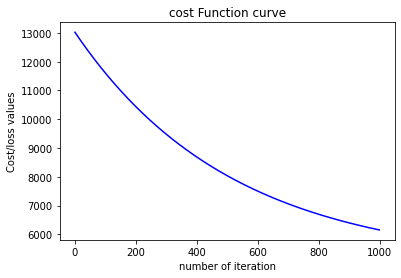

Iteration No.= 0
[array([1.1455435]), array([0.42446536]), array([-0.09513327]), array([-0.20038904]), array([-0.01240338]), array([-0.04645967]), array([0.13497995]), array([-0.05009473])]


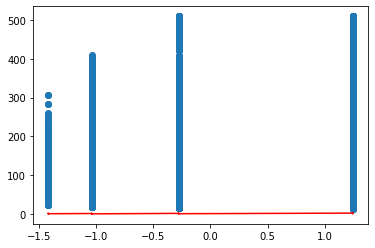

Iteration No.= 1
[array([2.27963156]), array([0.84516535]), array([-0.1890945]), array([-0.39941708]), array([-0.0250232]), array([-0.09246724]), array([0.26892108]), array([-0.09969705])]
Iteration No.= 2
[array([3.40237875]), array([1.26213472]), array([-0.28189685]), array([-0.59709191]), array([-0.03785323]), array([-0.13802714]), array([0.40183116]), array([-0.14881181])]
Iteration No.= 3
[array([4.51389846]), array([1.67540786]), array([-0.37355331]), array([-0.79342128]), array([-0.05088735]), array([-0.18314374]), array([0.53371792]), array([-0.19744381])]
Iteration No.= 4
[array([5.61430297]), array([2.08501885]), array([-0.46407675]), array([-0.98841296]), array([-0.06411953]), array([-0.22782137]), array([0.66458899]), array([-0.24559782])]
Iteration No.= 5
[array([6.70370344]), array([2.49100143]), array([-0.55347991]), array([-1.18207466]), array([-0.07754387]), array([-0.27206435]), array([0.794452]), array([-0.29327853])]
Iteration No.= 6
[array([7.78220991]), array([2.8

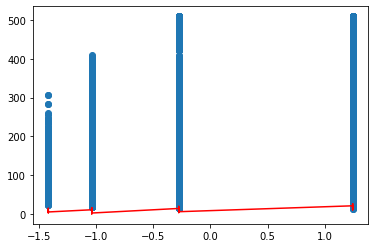

Iteration No.= 11
[array([13.01510716]), array([4.85254897]), array([-1.06706902]), array([-2.3165455]), array([-0.16180761]), array([-0.52862929]), array([1.55287959]), array([-0.56968147])]
Iteration No.= 12
[array([14.03049959]), array([5.23405037]), array([-1.14897551]), array([-2.50111195]), array([-0.17642037]), array([-0.56994629]), array([1.67589452]), array([-0.6141771])]
Iteration No.= 13
[array([15.03573809]), array([5.6121818]), array([-1.22985884]), array([-2.68440947]), array([-0.19118172]), array([-0.61086149]), array([1.79796029]), array([-0.65823546])]
Iteration No.= 14
[array([16.03092421]), array([5.98697417]), array([-1.30973057]), array([-2.86644557]), array([-0.20608664]), array([-0.65137881]), array([1.91908405]), array([-0.70186087])]
Iteration No.= 15
[array([17.01615847]), array([6.35845811]), array([-1.38860214]), array([-3.04722776]), array([-0.22113023]), array([-0.69150214]), array([2.03927287]), array([-0.74505758])]
Iteration No.= 16
[array([17.99154038]

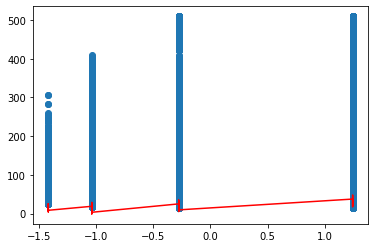

Iteration No.= 21
[array([22.72407886]), array([8.51956242]), array([-1.8414541]), array([-4.10600572]), array([-0.31403968]), array([-0.92418138]), array([2.74116223]), array([-0.99546877])]
Iteration No.= 22
[array([23.64238157]), array([8.86872024]), array([-1.91363499]), array([-4.27821848]), array([-0.32992373]), array([-0.96165252]), array([2.85500052]), array([-1.03578051])]
Iteration No.= 23
[array([24.55150125]), array([9.21480421]), array([-1.98490302]), array([-4.44923643]), array([-0.34591027]), array([-0.99875944]), array([2.96795873]), array([-1.07569619])]
Iteration No.= 24
[array([25.45152974]), array([9.5578424]), array([-2.05526858]), array([-4.61906686]), array([-0.36199516]), array([-1.03550571]), array([3.08004349]), array([-1.11521971])]
Iteration No.= 25
[array([26.34255794]), array([9.89786262]), array([-2.12474194]), array([-4.78771699]), array([-0.37817432]), array([-1.07189484]), array([3.19126139]), array([-1.15435492])]
Iteration No.= 26
[array([27.22467586

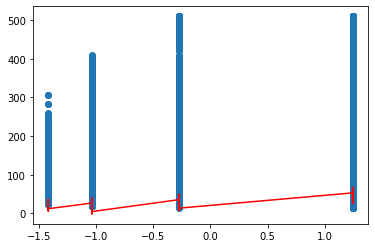

Iteration No.= 31
[array([31.50469883]), array([11.87613016]), array([-2.52340828]), array([-5.77523393]), array([-0.47701099]), array([-1.28292284]), array([3.8407278]), array([-1.38122324])]
Iteration No.= 32
[array([32.33519534]), array([12.195781]), array([-2.58691516]), array([-5.93582257]), array([-0.49374256]), array([-1.31690783]), array([3.94605825]), array([-1.41774528])]
Iteration No.= 33
[array([33.15738688]), array([12.51262691]), array([-2.64960824]), array([-6.09528787]), array([-0.51053857]), array([-1.35056268]), array([4.05057288]), array([-1.45390856])]
Iteration No.= 34
[array([33.97135651]), array([12.82669342]), array([-2.71149688]), array([-6.25363683]), array([-0.52739559]), array([-1.38389058]), array([4.15427786]), array([-1.48971663])]
Iteration No.= 35
[array([34.77718645]), array([13.13800577]), array([-2.77259029]), array([-6.41087642]), array([-0.54431028]), array([-1.41689475]), array([4.25717932]), array([-1.52517296])]
Iteration No.= 36
[array([35.5749

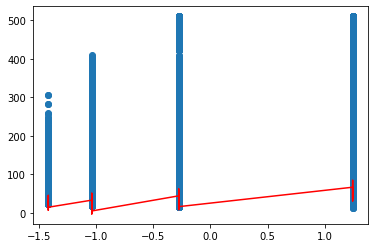

Iteration No.= 41
[array([39.44573414]), array([14.94942709]), array([-3.1229559]), array([-7.33140332]), array([-0.64683038]), array([-1.60829608]), array([4.8580519]), array([-1.73071627])]
Iteration No.= 42
[array([40.19682029]), array([15.2421477]), array([-3.17873312]), array([-7.4810698]), array([-0.66406053]), array([-1.63912087]), array([4.95549668]), array([-1.76380558])]
Iteration No.= 43
[array([40.94039559]), array([15.53230776]), array([-3.2337855]), array([-7.62968155]), array([-0.68132388]), array([-1.66964637]), array([5.0521854]), array([-1.79656994])]
Iteration No.= 44
[array([41.67653513]), array([15.81993047]), array([-3.28812143]), array([-7.77724528]), array([-0.69861764]), array([-1.69987548]), array([5.1481238]), array([-1.82901253])]
Iteration No.= 45
[array([42.40531328]), array([16.10503877]), array([-3.34174918]), array([-7.92376764]), array([-0.7159391]), array([-1.72981112]), array([5.24331759]), array([-1.86113652])]
Iteration No.= 46
[array([43.12680365]

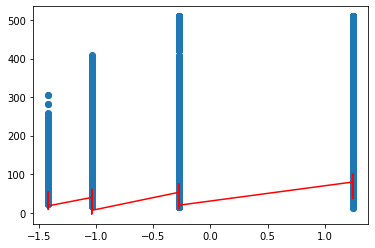

Iteration No.= 51
[array([46.62746413]), array([17.76414478]), array([-3.64909695]), array([-8.78140288]), array([-0.82030335]), array([-1.90342026]), array([5.79915741]), array([-2.04736341])]
Iteration No.= 52
[array([47.30673298]), array([18.03227716]), array([-3.69799211]), array([-8.92081988]), array([-0.83774679]), array([-1.93138018]), array([5.88929502]), array([-2.07734331])]
Iteration No.= 53
[array([47.97920915]), array([18.29807117]), array([-3.74624225]), array([-9.05924777]), array([-0.85519803]), array([-1.95906876]), array([5.97873214]), array([-2.10702886])]
Iteration No.= 54
[array([48.64496056]), array([18.5615479]), array([-3.79385486]), array([-9.19669294]), array([-0.87265481]), array([-1.98648866]), array([6.06747411]), array([-2.13642295])]
Iteration No.= 55
[array([49.30405445]), array([18.82272822]), array([-3.8408374]), array([-9.33316175]), array([-0.89011492]), array([-2.01364249]), array([6.15552621]), array([-2.16552844])]
Iteration No.= 56
[array([49.956

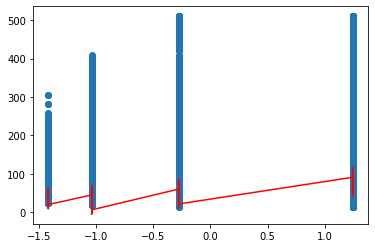

Iteration No.= 61
[array([53.122492]), array([20.34273047]), array([-4.10990699]), array([-10.13182355]), array([-0.99482795]), array([-2.17112173]), array([6.66964346]), array([-2.33425803])]
Iteration No.= 62
[array([53.73681057]), array([20.58840436]), array([-4.15268036]), array([-10.26163342]), array([-1.01225352]), array([-2.19648439]), array([6.7530116]), array([-2.36142134])]
Iteration No.= 63
[array([54.34498597]), array([20.83194198]), array([-4.19488026]), array([-10.39051671]), array([-1.02966641]), array([-2.22160105]), array([6.83573087]), array([-2.38831801])]
Iteration No.= 64
[array([54.94707961]), array([21.07336252]), array([-4.23651343]), array([-10.51847953]), array([-1.04706483]), array([-2.24647412]), array([6.91780623]), array([-2.41495066])]
Iteration No.= 65
[array([55.54315231]), array([21.31268496]), array([-4.27758653]), array([-10.64552791]), array([-1.06444701]), array([-2.27110597]), array([6.9992426]), array([-2.44132189])]
Iteration No.= 66
[array([56.

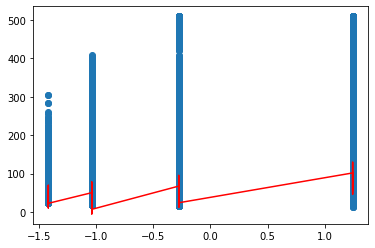

Iteration No.= 71
[array([58.99647878]), array([22.70560162]), array([-4.51262759]), array([-11.38895015]), array([-1.16830517]), array([-2.4139616]), array([7.47471297]), array([-2.59420173])]
Iteration No.= 72
[array([59.55205749]), array([22.93075474]), array([-4.54996068]), array([-11.50976438]), array([-1.18552755]), array([-2.43696951]), array([7.55181114]), array([-2.61881364])]
Iteration No.= 73
[array([60.10208041]), array([23.15395551]), array([-4.58678444]), array([-11.62971148]), array([-1.20272097]), array([-2.45975439]), array([7.6283084]), array([-2.64318401])]
Iteration No.= 74
[array([60.64660311]), array([23.3752214]), array([-4.62310489]), array([-11.74879723]), array([-1.21988399]), array([-2.48231841]), array([7.70420934]), array([-2.66731522])]
Iteration No.= 75
[array([61.18568058]), array([23.59456971]), array([-4.658928]), array([-11.86702737]), array([-1.23701524]), array([-2.50466373]), array([7.77951854]), array([-2.69120962])]
Iteration No.= 76
[array([61.7

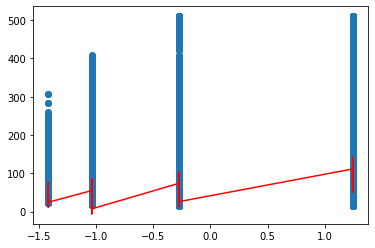

Iteration No.= 81
[array([64.30880713]), array([24.87133885]), array([-4.86374848]), array([-12.55875824]), array([-1.3390617]), array([-2.63426078]), array([8.21919864]), array([-2.82973187])]
Iteration No.= 82
[array([64.81126256]), array([25.07773507]), array([-4.89625185]), array([-12.67115736]), array([-1.35593433]), array([-2.65513371]), array([8.29049072]), array([-2.85203256])]
Iteration No.= 83
[array([65.30869343]), array([25.28234642]), array([-4.92830331]), array([-12.78274572]), array([-1.37276523]), array([-2.67580441]), array([8.3612264]), array([-2.87411444])]
Iteration No.= 84
[array([65.80115]), array([25.48518879]), array([-4.95990826]), array([-12.89352878]), array([-1.3895533]), array([-2.69627486]), array([8.43140995]), array([-2.89597968])]
Iteration No.= 85
[array([66.288682]), array([25.68627795]), array([-4.99107205]), array([-13.00351198]), array([-1.40629746]), array([-2.71654702]), array([8.50104562]), array([-2.9176304])]
Iteration No.= 86
[array([66.77133

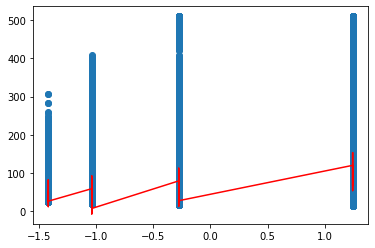

Iteration No.= 91
[array([69.11318167]), array([26.85685948]), array([-5.16908192]), array([-13.64691473]), array([-1.50578352]), array([-2.83412253]), array([8.90758758]), array([-3.04314651])]
Iteration No.= 92
[array([69.56759336]), array([27.0461052]), array([-5.19730218]), array([-13.75144859]), array([-1.5221925]), array([-2.85305964]), array([8.97350416]), array([-3.06335352])]
Iteration No.= 93
[array([70.01746092]), array([27.2337186]), array([-5.22512193]), array([-13.855225]), array([-1.53854994]), array([-2.87181338]), array([9.03890567]), array([-3.08336232])]
Iteration No.= 94
[array([70.46282981]), array([27.41971418]), array([-5.25254599]), array([-13.95824912]), array([-1.55485501]), array([-2.89038555]), array([9.10379606]), array([-3.10317485])]
Iteration No.= 95
[array([70.90374501]), array([27.60410629]), array([-5.27957915]), array([-14.06052609]), array([-1.5711069]), array([-2.90877791]), array([9.16817927]), array([-3.12279306])]
Iteration No.= 96
[array([71.34

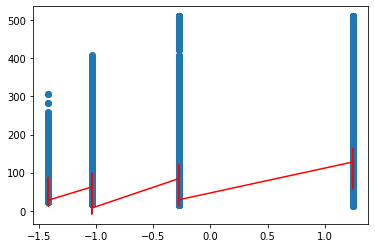

Iteration No.= 101
[array([73.45817189]), array([28.67757366]), array([-5.43383001]), array([-14.65878164]), array([-1.66745887]), array([-3.01545298]), array([9.54404444]), array([-3.23652705])]
Iteration No.= 102
[array([73.86913367]), array([28.85113255]), array([-5.45825622]), array([-14.75596988]), array([-1.68331769]), array([-3.03263477]), array([9.60498512]), array([-3.2548374])]
Iteration No.= 103
[array([74.27598583]), array([29.02319815]), array([-5.48232788]), array([-14.85245101]), array([-1.69911765]), array([-3.04965029]), array([9.66544906]), array([-3.2729682])]
Iteration No.= 104
[array([74.67876947]), array([29.1937837]), array([-5.50604931]), array([-14.94822989]), array([-1.71485815]), array([-3.06650116]), array([9.72543993]), array([-3.2909212])]
Iteration No.= 105
[array([75.07752528]), array([29.36290227]), array([-5.52942478]), array([-15.04331135]), array([-1.73053859]), array([-3.08318898]), array([9.78496139]), array([-3.30869815])]
Iteration No.= 106
[arra

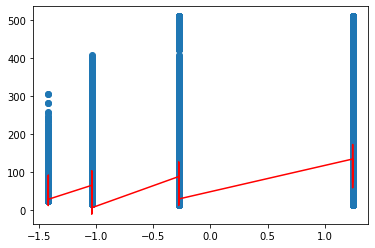

Iteration No.= 111
[array([77.38770316]), array([30.34752515]), array([-5.66264572]), array([-15.59942223]), array([-1.82332928]), array([-3.17997969]), array([10.13243335]), array([-3.41175865])]
Iteration No.= 112
[array([77.75936963]), array([30.50673141]), array([-5.68371512]), array([-15.68975505]), array([-1.83857435]), array([-3.19556975]), array([10.18876881]), array([-3.4283508])]
Iteration No.= 113
[array([78.12731943]), array([30.66457118]), array([-5.70447107]), array([-15.77942819]), array([-1.85375532]), array([-3.21100903]), array([10.24466308]), array([-3.44478028])]
Iteration No.= 114
[array([78.49158973]), array([30.82105649]), array([-5.7249174]), array([-15.86844622]), array([-1.86887176]), array([-3.22629901]), array([10.30011957]), array([-3.4610487])]
Iteration No.= 115
[array([78.85221733]), array([30.97619929]), array([-5.74505795]), array([-15.95681371]), array([-1.88392326]), array([-3.24144113]), array([10.35514168]), array([-3.47715763])]
Iteration No.= 116

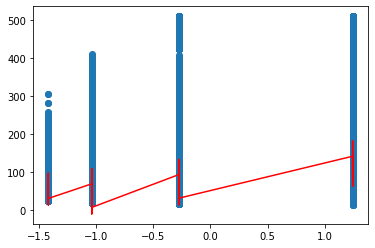

Iteration No.= 121
[array([80.9415008]), array([31.87951809]), array([-5.8596879]), array([-16.47360904]), array([-1.97284763]), array([-3.32926839]), array([10.67633837]), array([-3.57054875])]
Iteration No.= 122
[array([81.27762929]), array([32.02558848]), array([-5.87779119]), array([-16.55754806]), array([-1.98743444]), array([-3.343415]), array([10.72841237]), array([-3.58558432])]
Iteration No.= 123
[array([81.6103965]), array([32.17040801]), array([-5.8956177]), array([-16.64087201]), array([-2.00195362]), array([-3.35742488]), array([10.78007815]), array([-3.60047253])]
Iteration No.= 124
[array([81.93983603]), array([32.31398767]), array([-5.91317088]), array([-16.72358522]), array([-2.01640488]), array([-3.37129935]), array([10.83133887]), array([-3.61521483])]
Iteration No.= 125
[array([82.26598117]), array([32.45633835]), array([-5.93045414]), array([-16.80569196]), array([-2.03078798]), array([-3.38503973]), array([10.88219767]), array([-3.62981264])]
Iteration No.= 126
[a

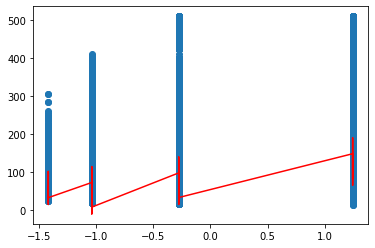

Iteration No.= 131
[array([84.15549168]), array([33.28523147]), array([-6.02867123]), array([-17.28583329]), array([-2.11564228]), array([-3.46473827]), array([11.17908286]), array([-3.71444386])]
Iteration No.= 132
[array([84.45948027]), array([33.41927607]), array([-6.0441572]), array([-17.36381255]), array([-2.1295421]), array([-3.47757583]), array([11.2272141]), array([-3.72806926])]
Iteration No.= 133
[array([84.76042896]), array([33.55217533]), array([-6.05939915]), array([-17.44121867]), array([-2.14337217]), array([-3.49028938]), array([11.27496768]), array([-3.74156116])]
Iteration No.= 134
[array([85.05836817]), array([33.68393928]), array([-6.07440013]), array([-17.5180557]), array([-2.15713233]), array([-3.50288013]), array([11.32234652]), array([-3.75492085])]
Iteration No.= 135
[array([85.35332799]), array([33.81457788]), array([-6.0891632]), array([-17.59432768]), array([-2.17082245]), array([-3.51534927]), array([11.36935355]), array([-3.76814965])]
Iteration No.= 136
[

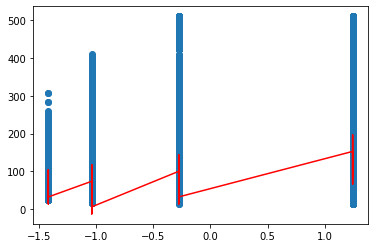

Iteration No.= 141
[array([87.06216743]), array([34.57532238]), array([-6.17291116]), array([-18.04031532]), array([-2.25148642]), array([-3.58767569]), array([11.64374752]), array([-3.84484475])]
Iteration No.= 142
[array([87.33708926]), array([34.69835436]), array([-6.18609101]), array([-18.11274237]), array([-2.2646835]), array([-3.59932602]), array([11.68823138]), array([-3.85719258])]
Iteration No.= 143
[array([87.60926186]), array([34.82033733]), array([-6.19905603]), array([-18.18463563]), array([-2.27780985]), array([-3.61086388]), array([11.73236591]), array([-3.86941946])]
Iteration No.= 144
[array([87.87871274]), array([34.94128047]), array([-6.21180896]), array([-18.2559989]), array([-2.29086546]), array([-3.62229036]), array([11.7761538]), array([-3.88152656])]
Iteration No.= 145
[array([88.14546911]), array([35.06119285]), array([-6.22435251]), array([-18.32683595]), array([-2.30385027]), array([-3.63360654]), array([11.81959777]), array([-3.89351508])]
Iteration No.= 146

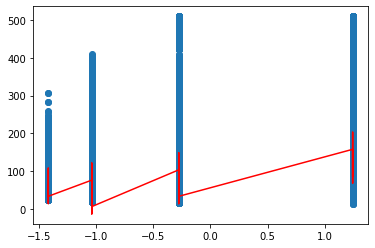

Iteration No.= 151
[array([89.69091287]), array([35.75951931]), array([-6.29536459]), array([-18.74101572]), array([-2.38027198]), array([-3.6992467]), array([12.07318737]), array([-3.96302021])]
Iteration No.= 152
[array([89.93954724]), array([35.87246377]), array([-6.30651573]), array([-18.80827279]), array([-2.39276113]), array([-3.70982023]), array([12.11429757]), array([-3.97421057])]
Iteration No.= 153
[array([90.18569527]), array([35.98444721]), array([-6.31747806]), array([-18.87503294]), array([-2.40517956]), array([-3.72029175]), array([12.15508467]), array([-3.98529135])]
Iteration No.= 154
[array([90.42938182]), array([36.09547799]), array([-6.32825403]), array([-18.94129973]), array([-2.4175273]), array([-3.73066224]), array([12.19555118]), array([-3.99626362])]
Iteration No.= 155
[array([90.6706315]), array([36.20556442]), array([-6.33884603]), array([-19.00707669]), array([-2.4298044]), array([-3.7409327]), array([12.2356996]), array([-4.00712845])]
Iteration No.= 156
[a

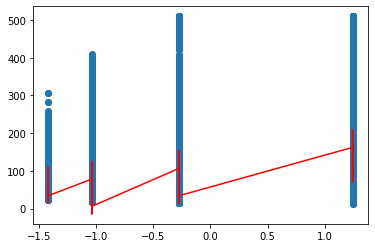

Iteration No.= 161
[array([92.06830313]), array([36.84670651]), array([-6.39866657]), array([-19.39164697]), array([-2.50198735]), array([-3.80050831]), array([12.47004763]), array([-4.07011946])]
Iteration No.= 162
[array([92.2931636]), array([36.95040844]), array([-6.40803611]), array([-19.4540921]), array([-2.51377199]), array([-3.81010515]), array([12.50803773]), array([-4.08026115])]
Iteration No.= 163
[array([92.51577546]), array([37.05322973]), array([-6.41724]), array([-19.51607484]), array([-2.52548664]), array([-3.81960946]), array([12.54572903]), array([-4.09030356])]
Iteration No.= 164
[array([92.73616121]), array([37.15517803]), array([-6.42628043]), array([-19.57759851]), array([-2.53713141]), array([-3.82902214]), array([12.58312386]), array([-4.10024765])]
Iteration No.= 165
[array([92.95434309]), array([37.2562609]), array([-6.43515952]), array([-19.63866642]), array([-2.54870642]), array([-3.83834407]), array([12.62022454]), array([-4.1100944])]
Iteration No.= 166
[ar

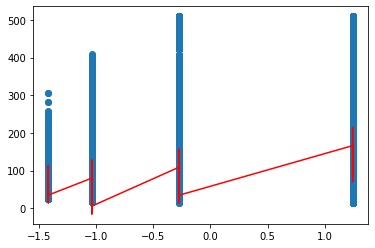

Iteration No.= 171
[array([94.21837227]), array([37.84500025]), array([-6.48516338]), array([-19.99568518]), array([-2.61669861]), array([-3.89241877]), array([12.83677855]), array([-4.16718349])]
Iteration No.= 172
[array([94.42173204]), array([37.94023176]), array([-6.49297123]), array([-20.05365346]), array([-2.62778897]), array([-3.90112967]), array([12.87188339]), array([-4.17637505])]
Iteration No.= 173
[array([94.62305822]), array([38.03465609]), array([-6.50063405]), array([-20.11119163]), array([-2.63881069]), array([-3.90975665]), array([12.90671194]), array([-4.18547666])]
Iteration No.= 174
[array([94.82237114]), array([38.12828022]), array([-6.50815376]), array([-20.1683028]), array([-2.64976392]), array([-3.9183005]), array([12.94126636]), array([-4.1944892])]
Iteration No.= 175
[array([95.01969093]), array([38.22111108]), array([-6.51553228]), array([-20.22499007]), array([-2.66064883]), array([-3.92676203]), array([12.97554878]), array([-4.20341353])]
Iteration No.= 176

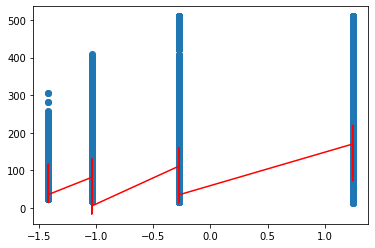

Iteration No.= 181
[array([96.16285625]), array([38.76181786]), array([-6.55694235]), array([-20.55638206]), array([-2.72453353]), array([-3.97584678]), array([13.1756493]), array([-4.25515523])]
Iteration No.= 182
[array([96.34677119]), array([38.8492847]), array([-6.56338407]), array([-20.61018676]), array([-2.73494525]), array([-3.98375404]), array([13.20808634]), array([-4.26348594])]
Iteration No.= 183
[array([96.52884698]), array([38.93601151]), array([-6.56969908]), array([-20.66359153]), array([-2.74529013]), array([-3.99158514]), array([13.24026794]), array([-4.27173514])]
Iteration No.= 184
[array([96.709102]), array([39.02200469]), array([-6.57588908]), array([-20.71659927]), array([-2.75556838]), array([-3.99934085]), array([13.27219608]), array([-4.27990363])]
Iteration No.= 185
[array([96.88755448]), array([39.10727056]), array([-6.58195577]), array([-20.76921287]), array([-2.7657802]), array([-4.00702188]), array([13.30387274]), array([-4.28799221])]
Iteration No.= 186
[

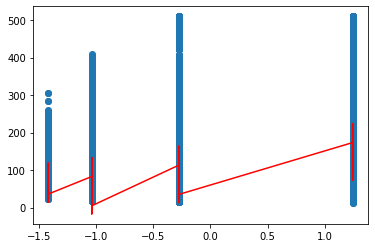

Iteration No.= 191
[array([97.92141271]), array([39.60394025]), array([-6.61585881]), array([-21.07677669]), array([-2.82566812]), array([-4.05157996]), array([13.48876089]), array([-4.33488885])]
Iteration No.= 192
[array([98.08774208]), array([39.68428773]), array([-6.62110812]), array([-21.12671047]), array([-2.835421]), array([-4.05875816]), array([13.51873146]), array([-4.34243955])]
Iteration No.= 193
[array([98.25240816]), array([39.76395661]), array([-6.62624698]), array([-21.1762725]), array([-2.8451092]), array([-4.06586727]), array([13.54846588]), array([-4.34991641])]
Iteration No.= 194
[array([98.41542758]), array([39.84295273]), array([-6.6312769]), array([-21.22546549]), array([-2.85473298]), array([-4.07290798]), array([13.57796598]), array([-4.35732013])]
Iteration No.= 195
[array([98.5768168]), array([39.92128188]), array([-6.6361994]), array([-21.27429213]), array([-2.86429255]), array([-4.07988094]), array([13.60723361]), array([-4.36465145])]
Iteration No.= 196
[ar

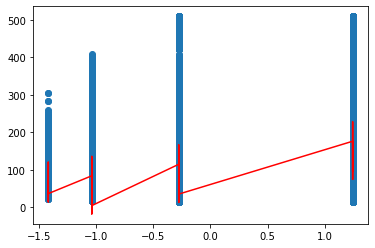

Iteration No.= 201
[array([99.51181965]), array([40.3775686]), array([-6.66356024]), array([-21.55970715]), array([-2.92031532]), array([-4.12033239]), array([13.77805827]), array([-4.40715804])]
Iteration No.= 202
[array([99.66224496]), array([40.45138698]), array([-6.66777132]), array([-21.60604321]), array([-2.92943229]), array([-4.12684917]), array([13.80574873]), array([-4.414002])]
Iteration No.= 203
[array([99.81116601]), array([40.52458295]), array([-6.67188638]), array([-21.65203382]), array([-2.93848703]), array([-4.13330327]), array([13.83322088]), array([-4.42077904])]
Iteration No.= 204
[array([99.95859785]), array([40.59716184]), array([-6.67590674]), array([-21.69768149]), array([-2.94747979]), array([-4.13969531]), array([13.86047644]), array([-4.42748981])]
Iteration No.= 205
[array([100.10455537]), array([40.66912897]), array([-6.67983376]), array([-21.74298874]), array([-2.95641083]), array([-4.14602588]), array([13.8875171]), array([-4.43413497])]
Iteration No.= 206

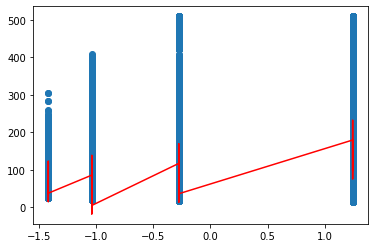

Iteration No.= 211
[array([100.95015518]), array([41.0883757]), array([-6.70150811]), array([-22.00782191]), array([-3.00871548]), array([-4.18275155]), array([14.04534161]), array([-4.47266372])]
Iteration No.= 212
[array([101.08619713]), array([41.15620504]), array([-6.70481765]), array([-22.0508151]), array([-3.01722179]), array([-4.18866823]), array([14.07092442]), array([-4.47886728])]
Iteration No.= 213
[array([101.22087866]), array([41.22346337]), array([-6.70804394]), array([-22.09348735]), array([-3.02566848]), array([-4.19452805]), array([14.09630544]), array([-4.4850102])]
Iteration No.= 214
[array([101.35421337]), array([41.2901556]), array([-6.71118818]), array([-22.13584101]), array([-3.03405583]), array([-4.20033156]), array([14.12148626]), array([-4.49109308])]
Iteration No.= 215
[array([101.48621474]), array([41.35628658]), array([-6.71425153]), array([-22.17787843]), array([-3.0423841]), array([-4.20607931]), array([14.14646845]), array([-4.4971165])]
Iteration No.= 2

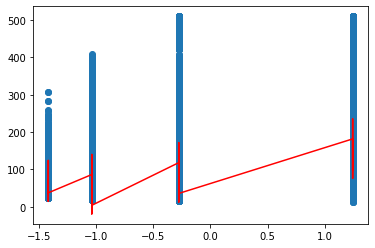

Iteration No.= 221
[array([102.25096006]), array([41.74155261]), array([-6.73099749]), array([-22.42359085]), array([-3.09112853]), array([-4.23942454]), array([14.29227677]), array([-4.5320408])]
Iteration No.= 222
[array([102.37399395]), array([41.80388717]), array([-6.73352654]), array([-22.46347875]), array([-3.09905097]), array([-4.24479674]), array([14.3159115]), array([-4.53766407])]
Iteration No.= 223
[array([102.49579751]), array([41.86569779]), array([-6.73598365]), array([-22.50306856]), array([-3.10691653]), array([-4.25011734]), array([14.33935974]), array([-4.54323239])]
Iteration No.= 224
[array([102.61638304]), array([41.92698897]), array([-6.73836988]), array([-22.54236246]), array([-3.11472551]), array([-4.25538686]), array([14.36262294]), array([-4.5487463])]
Iteration No.= 225
[array([102.73576271]), array([41.98776514]), array([-6.74068626]), array([-22.58136264]), array([-3.12247817]), array([-4.26060577]), array([14.38570257]), array([-4.55420634])]
Iteration No.

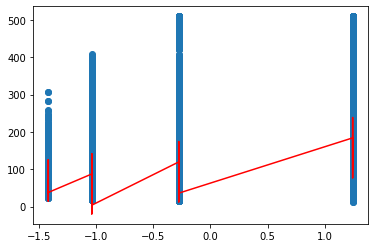

Iteration No.= 231
[array([103.42738466]), array([42.34185091]), array([-6.75317469]), array([-22.80931593]), array([-3.16782734]), array([-4.29088372]), array([14.52040506]), array([-4.58586446])]
Iteration No.= 232
[array([103.53865432]), array([42.3991432]), array([-6.75503033]), array([-22.84631989]), array([-3.17519369]), array([-4.29576187]), array([14.54223936]), array([-4.59096189])]
Iteration No.= 233
[array([103.64881127]), array([42.45595465]), array([-6.75682402]), array([-22.88304703]), array([-3.18250599]), array([-4.3005932]), array([14.56390131]), array([-4.59600953])]
Iteration No.= 234
[array([103.75786666]), array([42.51228937]), array([-6.75855671]), array([-22.91949941]), array([-3.18976451]), array([-4.30537818]), array([14.58539225]), array([-4.60100786])]
Iteration No.= 235
[array([103.86583149]), array([42.56815142]), array([-6.7602293]), array([-22.95567906]), array([-3.19696954]), array([-4.31011723]), array([14.60671354]), array([-4.60595738])]
Iteration No.

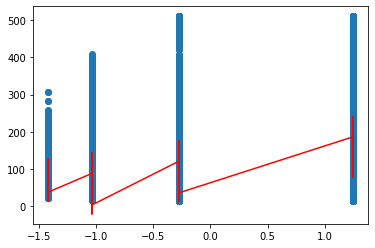

Iteration No.= 241
[array([104.49132199]), array([42.89362122]), array([-6.76905313]), array([-23.16714138]), array([-3.23909235]), array([-4.33761189]), array([14.73115238]), array([-4.63465576])]
Iteration No.= 242
[array([104.59195227]), array([42.94628561]), array([-6.77032995]), array([-23.20146754]), array([-3.24593091]), array([-4.34204172]), array([14.75132282]), array([-4.63927668])]
Iteration No.= 243
[array([104.69157625]), array([42.99850863]), array([-6.77155364]), array([-23.2355367]), array([-3.25271824]), array([-4.34642907]), array([14.77133399]), array([-4.64385248])]
Iteration No.= 244
[array([104.79020398]), array([43.05029405]), array([-6.77272505]), array([-23.26935076]), array([-3.25945465]), array([-4.35077435]), array([14.79118713]), array([-4.64838361])]
Iteration No.= 245
[array([104.88784544]), array([43.10164559]), array([-6.77384496]), array([-23.30291161]), array([-3.2661404]), array([-4.35507796]), array([14.81088349]), array([-4.65287049])]
Iteration No

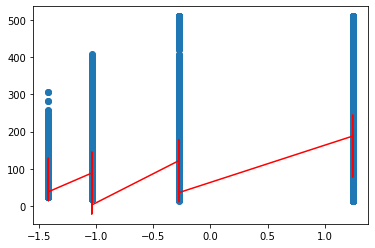

Iteration No.= 251
[array([105.45352784]), array([43.40084804]), array([-6.77952757]), array([-23.49906359]), array([-3.30520716]), array([-4.38004687]), array([14.92583765]), array([-4.67888674])]
Iteration No.= 252
[array([105.54453606]), array([43.4492641]), array([-6.78030902]), array([-23.53090381]), array([-3.3115463]), array([-4.38406986]), array([14.94447054]), array([-4.68307585])]
Iteration No.= 253
[array([105.6346342]), array([43.49727496]), array([-6.78104513]), array([-23.56250547]), array([-3.31783705]), array([-4.3880543]), array([14.96295625]), array([-4.68722407])]
Iteration No.= 254
[array([105.72383136]), array([43.54488405]), array([-6.78173663]), array([-23.59387033]), array([-3.3240797]), array([-4.39200055]), array([14.98129595]), array([-4.6913318])]
Iteration No.= 255
[array([105.81213654]), array([43.5920948]), array([-6.78238423]), array([-23.62500017]), array([-3.33027453]), array([-4.39590899]), array([14.99949077]), array([-4.69539944])]
Iteration No.= 25

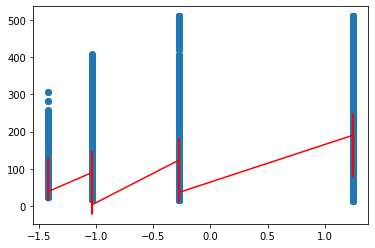

Iteration No.= 261
[array([106.32372956]), array([43.86718158]), array([-6.78538693]), array([-23.80694039]), array([-3.36645489]), array([-4.41858574]), array([15.10568064]), array([-4.71898507])]
Iteration No.= 262
[array([106.40603577]), array([43.91169708]), array([-6.78574653]), array([-23.83647318]), array([-3.37232279]), array([-4.42223951]), array([15.1228928]), array([-4.72278285])]
Iteration No.= 263
[array([106.48751891]), array([43.95584051]), array([-6.78606765]), array([-23.86578456]), array([-3.37814509]), array([-4.42585828]), array([15.13996897]), array([-4.72654358])]
Iteration No.= 264
[array([106.56818722]), array([43.99961502]), array([-6.78635091]), array([-23.89487618]), array([-3.38392209]), array([-4.42944241]), array([15.15691021]), array([-4.73026761])]
Iteration No.= 265
[array([106.64804885]), array([44.04302376]), array([-6.78659695]), array([-23.92374966]), array([-3.38965404]), array([-4.43299221]), array([15.1737176]), array([-4.73395531])]
Iteration No

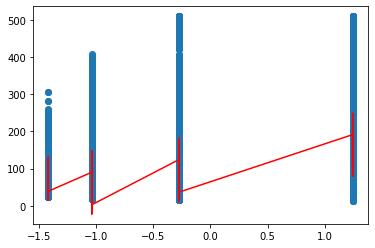

Iteration No.= 271
[array([107.1107244]), array([44.29596661]), array([-6.78732575]), array([-24.09249996]), array([-3.42311533]), array([-4.45358865]), array([15.27180935]), array([-4.75533819])]
Iteration No.= 272
[array([107.18516066]), array([44.33690026]), array([-6.78732818]), array([-24.11989135]), array([-3.42853969]), array([-4.45690731]), array([15.2877088]), array([-4.75878133])]
Iteration No.= 273
[array([107.25885255]), array([44.37749221]), array([-6.78729815]), array([-24.14707727]), array([-3.43392119]), array([-4.46019421]), array([15.30348259]), array([-4.76219088])]
Iteration No.= 274
[array([107.33180752]), array([44.41774536]), array([-6.7872362]), array([-24.17405926]), array([-3.43926011]), array([-4.46344966]), array([15.31913172]), array([-4.76556718])]
Iteration No.= 275
[array([107.40403295]), array([44.45766257]), array([-6.78714289]), array([-24.20083883]), array([-3.44455671]), array([-4.46667396]), array([15.33465718]), array([-4.76891055])]
Iteration No.

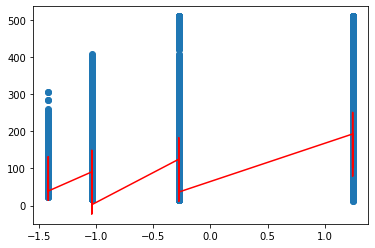

Iteration No.= 281
[array([107.82246843]), array([44.69026878]), array([-6.78595452]), array([-24.35734932]), array([-3.47546265]), array([-4.48538225]), array([15.42526676]), array([-4.78829712])]
Iteration No.= 282
[array([107.88978724]), array([44.72791273]), array([-6.78565657]), array([-24.38275365]), array([-3.4804705]), array([-4.48839675]), array([15.43995335]), array([-4.79141885])]
Iteration No.= 283
[array([107.95643287]), array([44.76524283]), array([-6.78533143]), array([-24.40796733]), array([-3.48543816]), array([-4.49138242]), array([15.45452385]), array([-4.79451014])]
Iteration No.= 284
[array([108.02241204]), array([44.80226172]), array([-6.78497959]), array([-24.43299179]), array([-3.49036588]), array([-4.49433955]), array([15.46897918]), array([-4.79757129])]
Iteration No.= 285
[array([108.08773142]), array([44.83897205]), array([-6.78460153]), array([-24.45782844]), array([-3.49525393]), array([-4.4972684]), array([15.48332025]), array([-4.8006026])]
Iteration No.

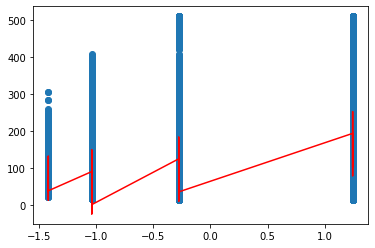

Iteration No.= 291
[array([108.46615697]), array([45.05289854]), array([-6.78180891]), array([-24.60298224]), array([-3.52376359]), array([-4.51426284]), array([15.5670171]), array([-4.8181799])]
Iteration No.= 292
[array([108.5270389]), array([45.08752067]), array([-6.78126035]), array([-24.62654295]), array([-3.52838115]), array([-4.51700125]), array([15.58058317]), array([-4.82101033])]
Iteration No.= 293
[array([108.58731201]), array([45.12185447]), array([-6.78068923]), array([-24.64992679]), array([-3.53296108]), array([-4.5197135]), array([15.59404198]), array([-4.82381317])]
Iteration No.= 294
[array([108.64698239]), array([45.15590238]), array([-6.78009596]), array([-24.67313508]), array([-3.53750365]), array([-4.52239984]), array([15.6073944]), array([-4.82658869])]
Iteration No.= 295
[array([108.70605606]), array([45.18966682]), array([-6.77948098]), array([-24.69616913]), array([-3.54200909]), array([-4.52506051]), array([15.62064125]), array([-4.82933717])]
Iteration No.= 

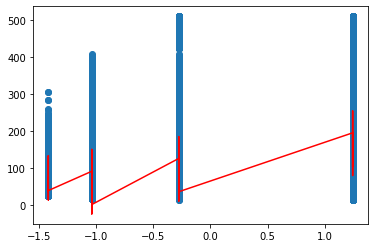

Iteration No.= 301
[array([109.04829734]), array([45.38643299]), array([-6.77535802]), array([-24.83078684]), array([-3.56827615]), array([-4.54049921]), array([15.69795177]), array([-4.84527467])]
Iteration No.= 302
[array([109.10335787]), array([45.41827894]), array([-6.7746024]), array([-24.85263721]), array([-3.57252869]), array([-4.542987]), array([15.71048265]), array([-4.84784107])]
Iteration No.= 303
[array([109.15786779]), array([45.44985998]), array([-6.77382826]), array([-24.8743235]), array([-3.57674608]), array([-4.54545104]), array([15.72291446]), array([-4.85038248])]
Iteration No.= 304
[array([109.21183261]), array([45.48117836]), array([-6.77303595]), array([-24.89584695]), array([-3.58092856]), array([-4.54789156]), array([15.73524797]), array([-4.85289913])]
Iteration No.= 305
[array([109.26525778]), array([45.51223628]), array([-6.77222586]), array([-24.91720876]), array([-3.58507637]), array([-4.55030877]), array([15.74748396]), array([-4.85539126])]
Iteration No.=

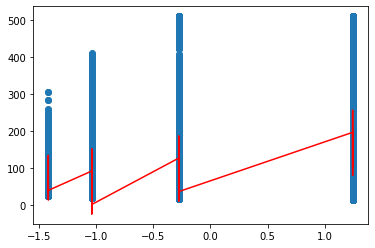

Iteration No.= 311
[array([109.57477467]), array([45.69323572]), array([-6.76701185]), array([-25.04205266]), array([-3.60924854]), array([-4.56433518]), array([15.81889471]), array([-4.8698425])]
Iteration No.= 312
[array([109.62457042]), array([45.72253083]), array([-6.76608718]), array([-25.06231648]), array([-3.61316031]), array([-4.56659546]), array([15.83046929]), array([-4.87216961])]
Iteration No.= 313
[array([109.67386821]), array([45.75158252]), array([-6.7651475]), array([-25.08242811]), array([-3.61703931]), array([-4.56883417]), array([15.84195235]), array([-4.87447406])]
Iteration No.= 314
[array([109.72267303]), array([45.78039283]), array([-6.76419313]), array([-25.10238869]), array([-3.62088575]), array([-4.57105153]), array([15.85334461]), array([-4.87675607])]
Iteration No.= 315
[array([109.7709898]), array([45.8089638]), array([-6.76322441]), array([-25.12219935]), array([-3.62469987]), array([-4.57324773]), array([15.86464678]), array([-4.87901585])]
Iteration No.=

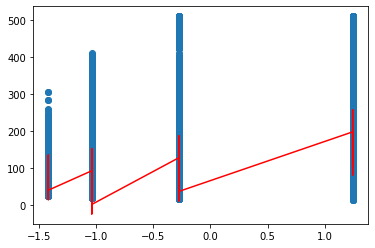

Iteration No.= 321
[array([110.05091132]), array([45.97547499]), array([-6.75712789]), array([-25.23797738]), array([-3.64691851]), array([-4.58599198]), array([15.93060746]), array([-4.89211997])]
Iteration No.= 322
[array([110.0959457]), array([46.00242599]), array([-6.75606726]), array([-25.25676962]), array([-3.65051271]), array([-4.58804569]), array([15.94129865]), array([-4.89423018])]
Iteration No.= 323
[array([110.14052975]), array([46.02915328]), array([-6.75499468]), array([-25.27542069]), array([-3.65407638]), array([-4.59007983]), array([15.95190529]), array([-4.89631984])]
Iteration No.= 324
[array([110.18466795]), array([46.05565873]), array([-6.75391044]), array([-25.29393167]), array([-3.65760974]), array([-4.59209458]), array([15.96242805]), array([-4.89838917])]
Iteration No.= 325
[array([110.22836477]), array([46.08194422]), array([-6.75281481]), array([-25.3123036]), array([-3.66111301]), array([-4.59409012]), array([15.9728676]), array([-4.90043836])]
Iteration No.

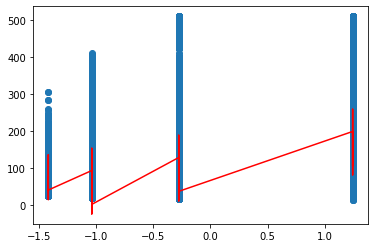

Iteration No.= 331
[array([110.48152077]), array([46.23514023]), array([-6.74601708]), array([-25.41967308]), array([-3.6815129]), array([-4.60567028]), array([16.03379383]), array([-4.9123214])]
Iteration No.= 332
[array([110.52224906]), array([46.25993681]), array([-6.74484924]), array([-25.43710046]), array([-3.68481158]), array([-4.60753645]), array([16.04366899]), array([-4.91423501])]
Iteration No.= 333
[array([110.56257007]), array([46.28452777]), array([-6.7436721]), array([-25.45439693]), array([-3.68808188]), array([-4.60938485]), array([16.05346606]), array([-4.91612999])]
Iteration No.= 334
[array([110.60248787]), array([46.30891484]), array([-6.74248592]), array([-25.47156346]), array([-3.691324]), array([-4.61121564]), array([16.06318565]), array([-4.91800654])]
Iteration No.= 335
[array([110.64200649]), array([46.33309972]), array([-6.74129093]), array([-25.48860104]), array([-3.69453817]), array([-4.61302899]), array([16.07282837]), array([-4.91986483])]
Iteration No.= 

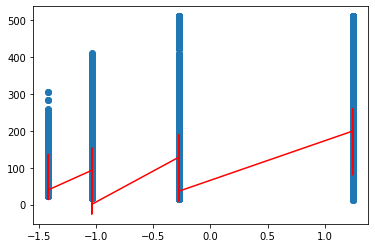

Iteration No.= 341
[array([110.87095624]), array([46.47405712]), array([-6.73394912]), array([-25.58817216]), array([-3.71324733]), array([-4.62355218]), array([16.1291042]), array([-4.93064104])]
Iteration No.= 342
[array([110.90779018]), array([46.49687339]), array([-6.73269895]), array([-25.60433376]), array([-3.71627144]), array([-4.62524807]), array([16.1382256]), array([-4.93237643])]
Iteration No.= 343
[array([110.94425578]), array([46.51950065]), array([-6.73144178]), array([-25.62037395]), array([-3.7192692]), array([-4.62692781]), array([16.14727487]), array([-4.93409494])]
Iteration No.= 344
[array([110.98035672]), array([46.54194048]), array([-6.73017783]), array([-25.63629365]), array([-3.72224081]), array([-4.62859157]), array([16.15625257]), array([-4.93579674])]
Iteration No.= 345
[array([111.01609665]), array([46.56419445]), array([-6.7289073]), array([-25.65209375]), array([-3.72518647]), array([-4.63023949]), array([16.16515926]), array([-4.93748199])]
Iteration No.=

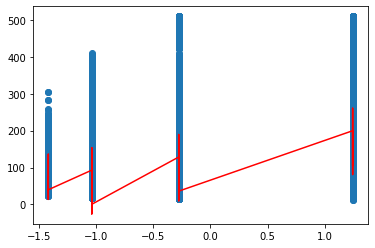

Iteration No.= 351
[array([111.2231547]), array([46.69390141]), array([-6.72115721]), array([-25.74443285]), array([-3.74232617]), array([-4.63980291]), array([16.21713957]), array([-4.94725487])]
Iteration No.= 352
[array([111.25646666]), array([46.7148972]), array([-6.7198462]), array([-25.75942061]), array([-3.74509553]), array([-4.64134417]), array([16.22556473]), array([-4.94882871])]
Iteration No.= 353
[array([111.28944549]), array([46.73571922]), array([-6.71853016]), array([-25.77429579]), array([-3.74784046]), array([-4.64287077]), array([16.23392327]), array([-4.95038725])]
Iteration No.= 354
[array([111.32209453]), array([46.75636892]), array([-6.71720928]), array([-25.78905923]), array([-3.75056115]), array([-4.64438285]), array([16.2422157]), array([-4.95193064])]
Iteration No.= 355
[array([111.35441709]), array([46.77684775]), array([-6.71588374]), array([-25.80371177]), array([-3.75325778]), array([-4.64588055]), array([16.25044255]), array([-4.95345902])]
Iteration No.=

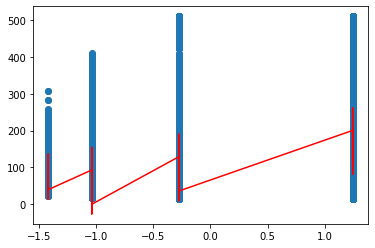

Iteration No.= 361
[array([111.54167668]), array([46.89621149]), array([-6.70784229]), array([-25.88934439]), array([-3.76894256]), array([-4.65457241]), array([16.29845523]), array([-4.96232238])]
Iteration No.= 362
[array([111.57180341]), array([46.91553353]), array([-6.7064889]), array([-25.90324364]), array([-3.77147587]), array([-4.65597324]), array([16.30623732]), array([-4.96374977])]
Iteration No.= 363
[array([111.60162887]), array([46.9346958]), array([-6.70513218]), array([-25.91703849]), array([-3.77398656]), array([-4.65736076]), array([16.31395786]), array([-4.96516329])]
Iteration No.= 364
[array([111.63115608]), array([46.95369962]), array([-6.70377229]), array([-25.93072972]), array([-3.7764748]), array([-4.6587351]), array([16.32161734]), array([-4.96656308])]
Iteration No.= 365
[array([111.66038802]), array([46.97254633]), array([-6.70240939]), array([-25.94431812]), array([-3.77894078]), array([-4.66009637]), array([16.32921625]), array([-4.96794926])]
Iteration No.=

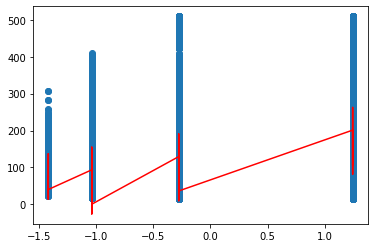

Iteration No.= 371
[array([111.82974224]), array([47.08239986]), array([-6.69417682]), array([-26.02373187]), array([-3.79327856]), array([-4.66799673]), array([16.37356426]), array([-4.9759881])]
Iteration No.= 372
[array([111.85698832]), array([47.10018289]), array([-6.69279686]), array([-26.03662176]), array([-3.79559342]), array([-4.66927003]), array([16.38075237]), array([-4.97728272])]
Iteration No.= 373
[array([111.88396193]), array([47.117819]), array([-6.69141503]), array([-26.04941485]), array([-3.79788737]), array([-4.67053124]), array([16.38788364]), array([-4.97856477])]
Iteration No.= 374
[array([111.91066581]), array([47.13530941]), array([-6.69003145]), array([-26.06211185]), array([-3.80016056]), array([-4.67178048]), array([16.39495851]), array([-4.97983437])]
Iteration No.= 375
[array([111.93710265]), array([47.15265535]), array([-6.68864625]), array([-26.0747135]), array([-3.80241316]), array([-4.67301786]), array([16.40197743]), array([-4.98109164])]
Iteration No.=

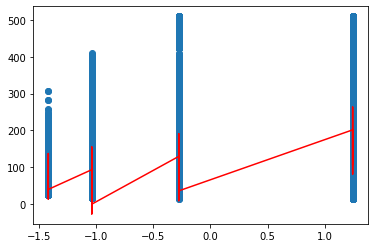

Iteration No.= 381
[array([112.09026357]), array([47.25376367]), array([-6.68030814]), array([-26.14836077]), array([-3.81550539]), array([-4.68019934]), array([16.44294065]), array([-4.98838298])]
Iteration No.= 382
[array([112.11490444]), array([47.27013143]), array([-6.6789151]), array([-26.16031473]), array([-3.81761834]), array([-4.68135682]), array([16.44958015]), array([-4.98955724])]
Iteration No.= 383
[array([112.13929889]), array([47.28636408]), array([-6.6775214]), array([-26.17217893]), array([-3.81971198]), array([-4.68250331]), array([16.45616715]), array([-4.9907201])]
Iteration No.= 384
[array([112.1634494]), array([47.30246274]), array([-6.67612717]), array([-26.18395404]), array([-3.82178644]), array([-4.68363893]), array([16.46270207]), array([-4.99187168])]
Iteration No.= 385
[array([112.18735841]), array([47.31842853]), array([-6.67473251]), array([-26.19564074]), array([-3.82384189]), array([-4.68476377]), array([16.46918531]), array([-4.99301207])]
Iteration No.=

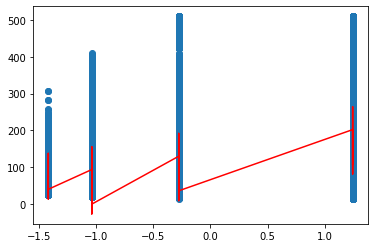

Iteration No.= 391
[array([112.3258744]), array([47.41149428]), array([-6.66636152]), array([-26.26394112]), array([-3.83578374]), array([-4.69129232]), array([16.5070223]), array([-4.99962572])]
Iteration No.= 392
[array([112.34815915]), array([47.42656045]), array([-6.6649668]), array([-26.27502727]), array([-3.83771028]), array([-4.69234459]), array([16.5131551]), array([-5.00069086])]
Iteration No.= 393
[array([112.37022106]), array([47.44150235]), array([-6.66357247]), array([-26.28603018]), array([-3.83961901]), array([-4.69338688]), array([16.51923941]), array([-5.00174567])]
Iteration No.= 394
[array([112.39206235]), array([47.45632101]), array([-6.66217862]), array([-26.2969505]), array([-3.84151005]), array([-4.69441929]), array([16.52527562]), array([-5.00279024])]
Iteration No.= 395
[array([112.41368522]), array([47.47101746]), array([-6.66078535]), array([-26.30778884]), array([-3.84338355]), array([-4.69544192]), array([16.5312641]), array([-5.00382467])]
Iteration No.= 3

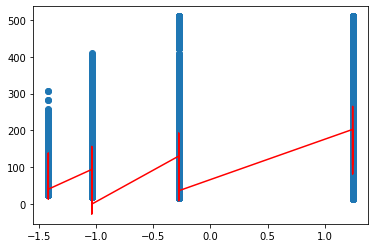

Iteration No.= 401
[array([112.5389566]), array([47.55668611]), array([-6.65244277]), array([-26.37113152]), array([-3.8542641]), array([-4.70137738]), array([16.56621371]), array([-5.0098239])]
Iteration No.= 402
[array([112.55911053]), array([47.5705551]), array([-6.65105598]), array([-26.38141302]), array([-3.85601875]), array([-4.70233408]), array([16.57187853]), array([-5.0107901])]
Iteration No.= 403
[array([112.57906293]), array([47.58430979]), array([-6.64967046]), array([-26.39161736]), array([-3.85775697]), array([-4.70328172]), array([16.57749857]), array([-5.01174693])]
Iteration No.= 404
[array([112.5988158]), array([47.59795111]), array([-6.64828626]), array([-26.4017451]), array([-3.85947889]), array([-4.70422038]), array([16.58307417]), array([-5.01269449])]
Iteration No.= 405
[array([112.61837114]), array([47.61148003]), array([-6.64690349]), array([-26.41179684]), array([-3.86118466]), array([-4.70515016]), array([16.5886057]), array([-5.01363285])]
Iteration No.= 406

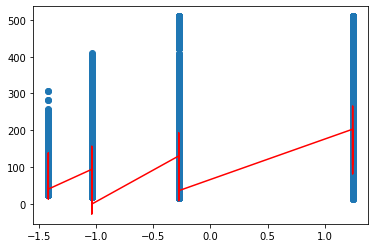

Iteration No.= 411
[array([112.73166433]), array([47.69034462]), array([-6.63864068]), array([-26.47054276]), array([-3.87108721]), array([-4.71054684]), array([16.62088857]), array([-5.019075])]
Iteration No.= 412
[array([112.74989118]), array([47.70311237]), array([-6.63726985]), array([-26.4800782]), array([-3.8726835]), array([-4.71141672]), array([16.62612117]), array([-5.0199515])]
Iteration No.= 413
[array([112.76793577]), array([47.71577498]), array([-6.635901]), array([-26.48954209]), array([-3.87426467]), array([-4.71227838]), array([16.6313124]), array([-5.02081949])]
Iteration No.= 414
[array([112.78579991]), array([47.7283333]), array([-6.6345342]), array([-26.49893497]), array([-3.87583085]), array([-4.71313188]), array([16.6364626]), array([-5.02167908])]
Iteration No.= 415
[array([112.80348541]), array([47.74078822]), array([-6.63316951]), array([-26.50825738]), array([-3.87738214]), array([-4.7139773]), array([16.64157209]), array([-5.02253033])]
Iteration No.= 416
[ar

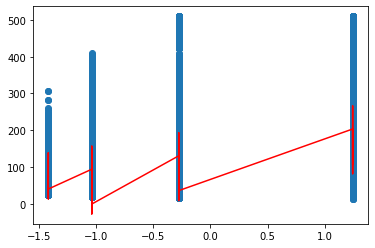

Iteration No.= 421
[array([112.90594574]), array([47.81339366]), array([-6.62502909]), array([-26.56274124]), array([-3.88638439]), array([-4.71888452]), array([16.67139201]), array([-5.02746737])]
Iteration No.= 422
[array([112.92242978]), array([47.82514835]), array([-6.62368086]), array([-26.57158495]), array([-3.88783497]), array([-4.71967553]), array([16.67622542]), array([-5.02826253])]
Iteration No.= 423
[array([112.93874898]), array([47.8368063]), array([-6.6223352]), array([-26.58036231]), array([-3.88927164]), array([-4.72045906]), array([16.68102063]), array([-5.02904998])]
Iteration No.= 424
[array([112.95490499]), array([47.84836831]), array([-6.62099217]), array([-26.58907384]), array([-3.89069451]), array([-4.72123519]), array([16.68577793]), array([-5.02982981])]
Iteration No.= 425
[array([112.97089944]), array([47.85983518]), array([-6.61965182]), array([-26.59772002]), array([-3.89210371]), array([-4.72200398]), array([16.69049764]), array([-5.03060208])]
Iteration No

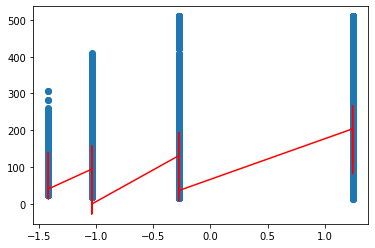

Iteration No.= 431
[array([113.06356273]), array([47.92668226]), array([-6.61166883]), array([-26.64825218]), array([-3.90027804]), array([-4.7264665]), array([16.71804285]), array([-5.03508111])]
Iteration No.= 432
[array([113.0784706]), array([47.93750491]), array([-6.61034862]), array([-26.65645453]), array([-3.90159467]), array([-4.72718585]), array([16.72250758]), array([-5.03580251])]
Iteration No.= 433
[array([113.09322939]), array([47.94823854]), array([-6.60903147]), array([-26.66459536]), array([-3.90289852]), array([-4.7278984]), array([16.72693702]), array([-5.03651693])]
Iteration No.= 434
[array([113.1078406]), array([47.95888391]), array([-6.60771742]), array([-26.67267515]), array([-3.9041897]), array([-4.72860423]), array([16.73133147]), array([-5.03722443])]
Iteration No.= 435
[array([113.12230569]), array([47.96944175]), array([-6.60640651]), array([-26.68069435]), array([-3.90546831]), array([-4.72930338]), array([16.73569119]), array([-5.03792508])]
Iteration No.= 

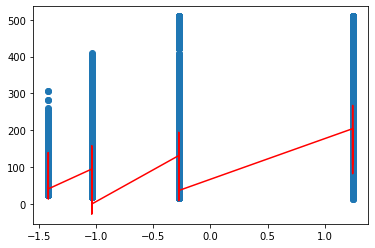

Iteration No.= 441
[array([113.2061087]), array([48.03099074]), array([-6.59860931]), array([-26.72756257]), array([-3.91288208]), array([-4.73336185]), array([16.76113554]), array([-5.04198879])]
Iteration No.= 442
[array([113.21959112]), array([48.04095581]), array([-6.5973215]), array([-26.73517026]), array([-3.91407569]), array([-4.73401608]), array([16.76525977]), array([-5.04264331])]
Iteration No.= 443
[array([113.2329387]), array([48.05083899]), array([-6.59603713]), array([-26.74272091]), array([-3.91525758]), array([-4.73466414]), array([16.76935141]), array([-5.0432915])]
Iteration No.= 444
[array([113.24615282]), array([48.06064094]), array([-6.59475625]), array([-26.75021496]), array([-3.91642783]), array([-4.73530609]), array([16.77341073]), array([-5.04393341])]
Iteration No.= 445
[array([113.25923479]), array([48.07036236]), array([-6.59347887]), array([-26.75765284]), array([-3.91758656]), array([-4.73594198]), array([16.77743798]), array([-5.04456912])]
Iteration No.=

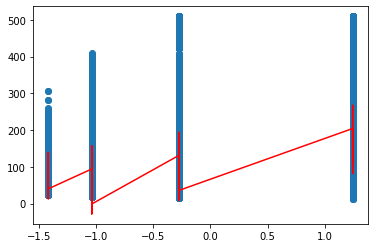

Iteration No.= 451
[array([113.33502473]), array([48.12703635]), array([-6.58589008]), array([-26.80112392]), array([-3.92430233]), array([-4.73963328]), array([16.80094205]), array([-5.04825621])]
Iteration No.= 452
[array([113.34721798]), array([48.13621231]), array([-6.58463813]), array([-26.80818025]), array([-3.92538309]), array([-4.74022835]), array([16.80475181]), array([-5.04885008])]
Iteration No.= 453
[array([113.3592893]), array([48.14531292]), array([-6.58338993]), array([-26.8151837]), array([-3.9264531]), array([-4.7408178]), array([16.80853147]), array([-5.04943821])]
Iteration No.= 454
[array([113.37123991]), array([48.15433878]), array([-6.5821455]), array([-26.82213467]), array([-3.92751244]), array([-4.7414017]), array([16.81228127]), array([-5.05002065])]
Iteration No.= 455
[array([113.38307101]), array([48.16329053]), array([-6.58090486]), array([-26.82903355]), array([-3.92856122]), array([-4.7419801]), array([16.81600145]), array([-5.05059746])]
Iteration No.= 45

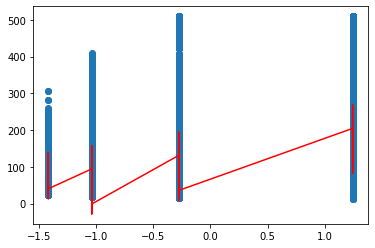

Iteration No.= 461
[array([113.45161408]), array([48.21547848]), array([-6.57354208]), array([-26.86935484]), array([-3.93463703]), array([-4.74533774]), array([16.83771356]), array([-5.05394301])]
Iteration No.= 462
[array([113.46264143]), array([48.22392828]), array([-6.57232867]), array([-26.87589996]), array([-3.93561436]), array([-4.74587904]), array([16.84123288]), array([-5.05448188])]
Iteration No.= 463
[array([113.47355852]), array([48.23230872]), array([-6.57111922]), array([-26.88239604]), array([-3.93658184]), array([-4.74641524]), array([16.8447244]), array([-5.05501554])]
Iteration No.= 464
[array([113.48436643]), array([48.24062039]), array([-6.56991377]), array([-26.88884346]), array([-3.93753955]), array([-4.74694638]), array([16.84818835]), array([-5.05554405])]
Iteration No.= 465
[array([113.49506627]), array([48.24886384]), array([-6.56871233]), array([-26.8952426]), array([-3.93848758]), array([-4.74747252]), array([16.85162494]), array([-5.05606744])]
Iteration No

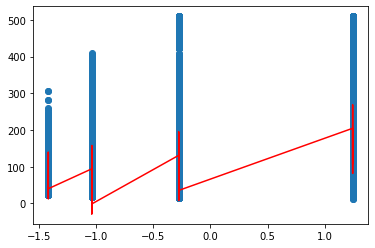

Iteration No.= 471
[array([113.55705539]), array([48.29692337]), array([-6.56158886]), array([-26.93264342]), array([-3.94397723]), array([-4.75052694]), array([16.87168205]), array([-5.05910325])]
Iteration No.= 472
[array([113.56702833]), array([48.30470488]), array([-6.56041596]), array([-26.93871453]), array([-3.94485986]), array([-4.75101937]), array([16.87493312]), array([-5.05959224])]
Iteration No.= 473
[array([113.57690155]), array([48.31242255]), array([-6.55924719]), array([-26.94474018]), array([-3.94573347]), array([-4.75150716]), array([16.87815853]), array([-5.0600765])]
Iteration No.= 474
[array([113.58667603]), array([48.32007692]), array([-6.55808258]), array([-26.95072072]), array([-3.94659814]), array([-4.75199036]), array([16.88135847]), array([-5.06055609])]
Iteration No.= 475
[array([113.59635277]), array([48.32766852]), array([-6.55692213]), array([-26.95665648]), array([-3.94745396]), array([-4.75246901]), array([16.88453315]), array([-5.06103104])]
Iteration N

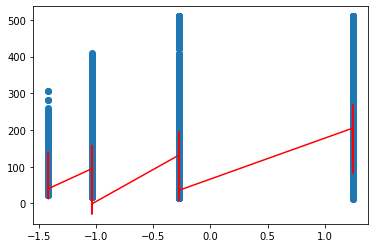

Iteration No.= 481
[array([113.65241462]), array([48.37192847]), array([-6.55004753]), array([-26.99134941]), array([-3.95240724]), array([-4.75524783]), array([16.90306174]), array([-5.06378593])]
Iteration No.= 482
[array([113.66143397]), array([48.37909489]), array([-6.54891654]), array([-26.99698102]), array([-3.95320323]), array([-4.75569584]), array([16.90606508]), array([-5.06422968])]
Iteration No.= 483
[array([113.67036313]), array([48.38620257]), array([-6.5477898]), array([-27.00257049]), array([-3.95399098]), array([-4.75613963]), array([16.90904471]), array([-5.06466915])]
Iteration No.= 484
[array([113.679203]), array([48.39325198]), array([-6.54666731]), array([-27.00811812]), array([-3.95477056]), array([-4.75657926]), array([16.91200083]), array([-5.06510437])]
Iteration No.= 485
[array([113.68795447]), array([48.40024361]), array([-6.54554909]), array([-27.01362423]), array([-3.95554205]), array([-4.75701474]), array([16.9149336]), array([-5.06553539])]
Iteration No.=

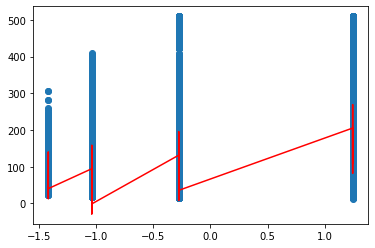

Iteration No.= 491
[array([113.7386558]), array([48.44100638]), array([-6.53892972]), array([-27.04580634]), array([-3.960005]), array([-4.75954305]), array([16.93205051]), array([-5.06803549])]
Iteration No.= 492
[array([113.74681274]), array([48.44760666]), array([-6.53784154]), array([-27.05103044]), array([-3.96072183]), array([-4.75995068]), array([16.93482505]), array([-5.06843821])]
Iteration No.= 493
[array([113.75488812]), array([48.45415287]), array([-6.53675767]), array([-27.05621546]), array([-3.96143112]), array([-4.76035449]), array([16.93757769]), array([-5.06883704])]
Iteration No.= 494
[array([113.76288273]), array([48.46064545]), array([-6.53567812]), array([-27.06136168]), array([-3.96213296]), array([-4.7607545]), array([16.9403086]), array([-5.06923202])]
Iteration No.= 495
[array([113.7707974]), array([48.46708484]), array([-6.53460289]), array([-27.06646941]), array([-3.9628274]), array([-4.76115075]), array([16.94301797]), array([-5.06962319])]
Iteration No.= 49

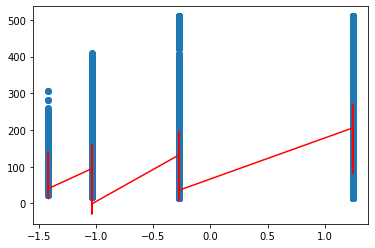

Iteration No.= 501
[array([113.81665078]), array([48.50462855]), array([-6.52824239]), array([-27.09632339]), array([-3.96684254]), array([-4.76345133]), array([16.95883107]), array([-5.0718922])]
Iteration No.= 502
[array([113.82402777]), array([48.51070771]), array([-6.52719748]), array([-27.10116962]), array([-3.96748709]), array([-4.76382226]), array([16.96139428]), array([-5.0722577])]
Iteration No.= 503
[array([113.83133099]), array([48.51673709]), array([-6.5261569]), array([-27.10597961]), array([-3.96812476]), array([-4.76418971]), array([16.96393728]), array([-5.07261967])]
Iteration No.= 504
[array([113.83856118]), array([48.5227171]), array([-6.52512066]), array([-27.11075363]), array([-3.96875563]), array([-4.76455371]), array([16.96646021]), array([-5.07297816])]
Iteration No.= 505
[array([113.84571907]), array([48.52864815]), array([-6.52408877]), array([-27.11549195]), array([-3.96937976]), array([-4.76491429]), array([16.96896323]), array([-5.07333318])]
Iteration No.=

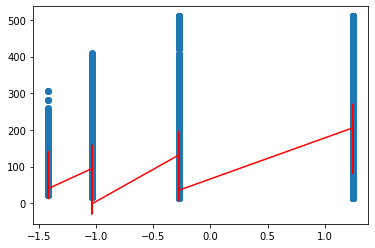

Iteration No.= 511
[array([113.88718804]), array([48.56322861]), array([-6.51798847]), array([-27.14318715]), array([-3.97298631]), array([-4.76700785]), array([16.98357215]), array([-5.07539257])]
Iteration No.= 512
[array([113.89385966]), array([48.56882805]), array([-6.51698692]), array([-27.14768299]), array([-3.97356493]), array([-4.76734541]), array([16.9859402]), array([-5.07572431])]
Iteration No.= 513
[array([113.90046456]), array([48.57438165]), array([-6.51598971]), array([-27.15214523]), array([-3.97413729]), array([-4.76767981]), array([16.98828956]), array([-5.07605285])]
Iteration No.= 514
[array([113.90700342]), array([48.57988981]), array([-6.51499682]), array([-27.15657412]), array([-3.97470345]), array([-4.76801107]), array([16.9906204]), array([-5.07637823])]
Iteration No.= 515
[array([113.91347688]), array([48.5853529]), array([-6.51400826]), array([-27.16096991]), array([-3.97526346]), array([-4.76833923]), array([16.99293285]), array([-5.07670047])]
Iteration No.

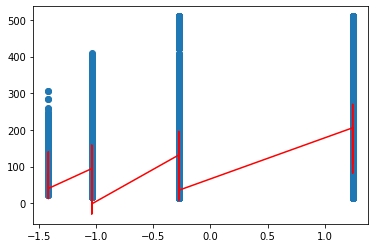

Iteration No.= 521
[array([113.95098067]), array([48.61720543]), array([-6.50816753]), array([-27.1866633]), array([-3.97849759]), array([-4.77024457]), array([17.0064296]), array([-5.07856971])]
Iteration No.= 522
[array([113.95701437]), array([48.62236323]), array([-6.50720914]), array([-27.19083423]), array([-3.97901614]), array([-4.77055179]), array([17.00861738]), array([-5.07887083])]
Iteration No.= 523
[array([113.96298772]), array([48.62747883]), array([-6.50625505]), array([-27.19497401]), array([-3.979529]), array([-4.77085613]), array([17.01078791]), array([-5.07916904])]
Iteration No.= 524
[array([113.96890134]), array([48.63255259]), array([-6.50530525]), array([-27.19908286]), array([-3.9800362]), array([-4.77115763]), array([17.01294133]), array([-5.07946438])]
Iteration No.= 525
[array([113.97475583]), array([48.63758486]), array([-6.50435974]), array([-27.20316101]), array([-3.9805378]), array([-4.7714563]), array([17.01507777]), array([-5.07975688])]
Iteration No.= 52

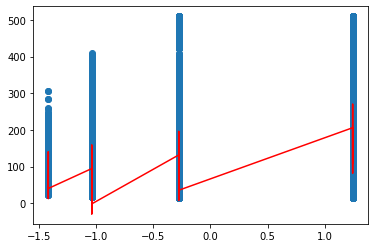

Iteration No.= 531
[array([114.00867359]), array([48.66692594]), array([-6.4987763]), array([-27.22699811]), array([-3.98343281]), array([-4.7731905]), array([17.0275473]), array([-5.08145363])]
Iteration No.= 532
[array([114.01413035]), array([48.67167714]), array([-6.49786061]), array([-27.23086776]), array([-3.98389668]), array([-4.77347014]), array([17.02956859]), array([-5.08172697])]
Iteration No.= 533
[array([114.01953255]), array([48.67638949]), array([-6.49694916]), array([-27.23470851]), array([-3.98435537]), array([-4.77374716]), array([17.03157395]), array([-5.08199767])]
Iteration No.= 534
[array([114.02488072]), array([48.68106331]), array([-6.49604194]), array([-27.23852058]), array([-3.98480891]), array([-4.77402159]), array([17.0335635]), array([-5.08226577])]
Iteration No.= 535
[array([114.03017541]), array([48.68569893]), array([-6.49513894]), array([-27.24230418]), array([-3.98525737]), array([-4.77429345]), array([17.03553737]), array([-5.08253129])]
Iteration No.=

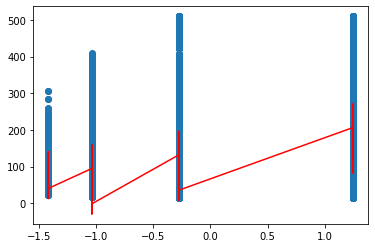

Iteration No.= 541
[array([114.06085003]), array([48.71272773]), array([-6.48980916]), array([-27.2644199]), array([-3.98784388]), array([-4.77587203]), array([17.04705815]), array([-5.08407156])]
Iteration No.= 542
[array([114.06578503]), array([48.71710456]), array([-6.48893549]), array([-27.26801014]), array([-3.98825803]), array([-4.77612658]), array([17.04892567]), array([-5.08431969])]
Iteration No.= 543
[array([114.07067068]), array([48.72144562]), array([-6.48806598]), array([-27.27157359]), array([-3.98866747]), array([-4.77637875]), array([17.05077847]), array([-5.08456544])]
Iteration No.= 544
[array([114.07550747]), array([48.72575121]), array([-6.48720062]), array([-27.27511044]), array([-3.98907223]), array([-4.77662857]), array([17.05261667]), array([-5.08480882])]
Iteration No.= 545
[array([114.08029589]), array([48.73002163]), array([-6.4863394]), array([-27.27862089]), array([-3.98947237]), array([-4.77687605]), array([17.05444039]), array([-5.08504985])]
Iteration No

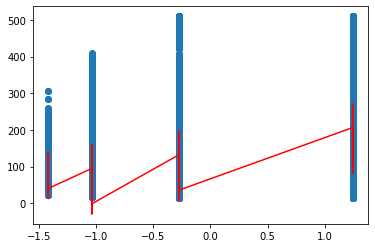

Iteration No.= 551
[array([114.10803746]), array([48.75492139]), array([-6.48125852]), array([-27.29914027]), array([-3.99177854]), array([-4.77831311]), array([17.06508487]), array([-5.08644816])]
Iteration No.= 552
[array([114.11250059]), array([48.75895352]), array([-6.48042603]), array([-27.30247141]), array([-3.99214753]), array([-4.77854485]), array([17.06681035]), array([-5.08667343])]
Iteration No.= 553
[array([114.11691908]), array([48.76295271]), array([-6.47959759]), array([-27.3057777]), array([-3.99251223]), array([-4.77877442]), array([17.06852225]), array([-5.08689653])]
Iteration No.= 554
[array([114.12129339]), array([48.76691925]), array([-6.47877322]), array([-27.30905932]), array([-3.99287269]), array([-4.77900185]), array([17.07022065]), array([-5.08711748])]
Iteration No.= 555
[array([114.12562395]), array([48.77085339]), array([-6.47795289]), array([-27.31231646]), array([-3.99322896]), array([-4.77922716]), array([17.07190568]), array([-5.08733632])]
Iteration N

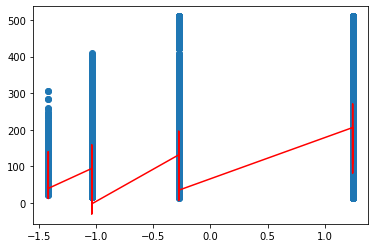

Iteration No.= 561
[array([114.15071293]), array([48.79379274]), array([-6.47311524]), array([-27.33135541]), array([-3.99528064]), array([-4.78053551]), array([17.08174078]), array([-5.08860582])]
Iteration No.= 562
[array([114.1547493]), array([48.79750746]), array([-6.47232292]), array([-27.33444626]), array([-3.99560863]), array([-4.7807465]), array([17.08333508]), array([-5.08881034])]
Iteration No.= 563
[array([114.15874531]), array([48.80119185]), array([-6.47153456]), array([-27.33751406]), array([-3.99593275]), array([-4.78095552]), array([17.08491682]), array([-5.0890129])]
Iteration No.= 564
[array([114.16270135]), array([48.80484617]), array([-6.47075015]), array([-27.34055898]), array([-3.99625302]), array([-4.78116259]), array([17.08648611]), array([-5.08921351])]
Iteration No.= 565
[array([114.16661784]), array([48.80847066]), array([-6.46996968]), array([-27.3435812]), array([-3.99656948]), array([-4.78136773]), array([17.08804304]), array([-5.08941219])]
Iteration No.=

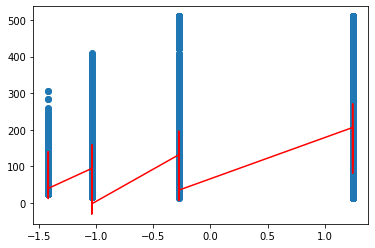

Iteration No.= 571
[array([114.18930786]), array([48.82960477]), array([-6.46536887]), array([-27.36124719]), array([-3.99839039]), array([-4.78255901]), array([17.09713054]), array([-5.09056482])]
Iteration No.= 572
[array([114.19295828]), array([48.8330272]), array([-6.46461563]), array([-27.36411518]), array([-3.99868123]), array([-4.78275113]), array([17.09860367]), array([-5.09075052])]
Iteration No.= 573
[array([114.1965722]), array([48.83642171]), array([-6.46386624]), array([-27.3669618]), array([-3.99896856]), array([-4.78294146]), array([17.10006519]), array([-5.09093444])]
Iteration No.= 574
[array([114.20014998]), array([48.83978852]), array([-6.46312067]), array([-27.3697872]), array([-3.99925241]), array([-4.78313001]), array([17.10151522]), array([-5.09111659])]
Iteration No.= 575
[array([114.20369198]), array([48.84312786]), array([-6.46237893]), array([-27.37259154]), array([-3.9995328]), array([-4.7833168]), array([17.10295382]), array([-5.09129698])]
Iteration No.= 5

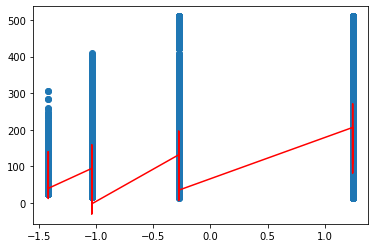

Iteration No.= 581
[array([114.22421243]), array([48.86259953]), array([-6.45800799]), array([-27.38898418]), array([-4.00114468]), array([-4.78440159]), array([17.11135079]), array([-5.09234358])]
Iteration No.= 582
[array([114.2275138]), array([48.8657528]), array([-6.45729264]), array([-27.39164548]), array([-4.00140189]), array([-4.78457654]), array([17.11271199]), array([-5.0925122])]
Iteration No.= 583
[array([114.23078216]), array([48.86888034]), array([-6.45658101]), array([-27.39428696]), array([-4.00165591]), array([-4.78474987]), array([17.11406247]), array([-5.0926792])]
Iteration No.= 584
[array([114.23401784]), array([48.87198238]), array([-6.45587309]), array([-27.39690876]), array([-4.00190679]), array([-4.78492157]), array([17.11540233]), array([-5.09284459])]
Iteration No.= 585
[array([114.23722116]), array([48.87505912]), array([-6.45516887]), array([-27.39951104]), array([-4.00215454]), array([-4.78509168]), array([17.11673165]), array([-5.0930084])]
Iteration No.= 

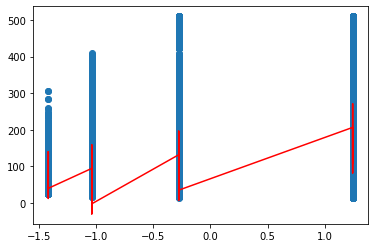

Iteration No.= 591
[array([114.25577949]), array([48.89299979]), array([-6.45102041]), array([-27.41472267]), array([-4.00357731]), array([-4.7860796]), array([17.12449077]), array([-5.09395877])]
Iteration No.= 592
[array([114.25876519]), array([48.89590516]), array([-6.4503417]), array([-27.41719228]), array([-4.00380409]), array([-4.78623893]), array([17.12574858]), array([-5.09411189])]
Iteration No.= 593
[array([114.26172104]), array([48.89878684]), array([-6.44966658]), array([-27.41964349]), array([-4.004028]), array([-4.78639678]), array([17.1269965]), array([-5.09426354])]
Iteration No.= 594
[array([114.26464733]), array([48.90164503]), array([-6.44899504]), array([-27.42207646]), array([-4.00424906]), array([-4.78655316]), array([17.1282346]), array([-5.09441374])]
Iteration No.= 595
[array([114.26754435]), array([48.90447992]), array([-6.44832706]), array([-27.42449131]), array([-4.00446731]), array([-4.78670809]), array([17.12946296]), array([-5.09456249])]
Iteration No.= 5

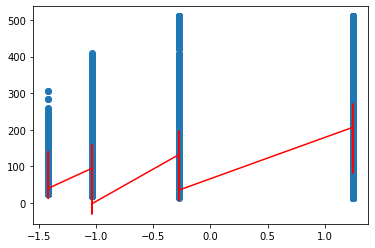

Iteration No.= 601
[array([114.28432817]), array([48.92101057]), array([-6.44439338]), array([-27.43860756]), array([-4.00571918]), array([-4.78760787]), array([17.1366329]), array([-5.09542554])]
Iteration No.= 602
[array([114.28702839]), array([48.92368763]), array([-6.44375]), array([-27.44089936]), array([-4.00591848]), array([-4.78775299]), array([17.13779521]), array([-5.0955646])]
Iteration No.= 603
[array([114.28970161]), array([48.92634287]), array([-6.44311009]), array([-27.4431741]), array([-4.0061152]), array([-4.78789677]), array([17.13894839]), array([-5.09570232])]
Iteration No.= 604
[array([114.29234809]), array([48.92897648]), array([-6.44247362]), array([-27.44543192]), array([-4.00630934]), array([-4.7880392]), array([17.14009249]), array([-5.09583872])]
Iteration No.= 605
[array([114.29496811]), array([48.93158863]), array([-6.44184059]), array([-27.44767293]), array([-4.00650093]), array([-4.78818032]), array([17.1412276]), array([-5.09597381])]
Iteration No.= 606


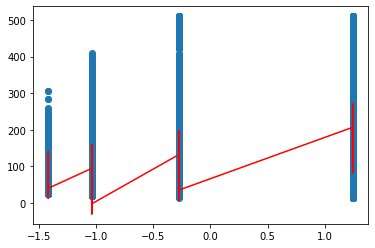

Iteration No.= 611
[array([114.31014709]), array([48.94682061]), array([-6.43811376]), array([-27.46077316]), array([-4.00759857]), array([-4.78899991]), array([17.14785329]), array([-5.09675761])]
Iteration No.= 612
[array([114.31258912]), array([48.94928739]), array([-6.4375044]), array([-27.46290004]), array([-4.00777309]), array([-4.7891321]), array([17.14892738]), array([-5.0968839])]
Iteration No.= 613
[array([114.31500673]), array([48.95173407]), array([-6.43689836]), array([-27.46501109]), array([-4.00794527]), array([-4.78926307]), array([17.14999304]), array([-5.09700898])]
Iteration No.= 614
[array([114.31740016]), array([48.95416083]), array([-6.43629563]), array([-27.46710645]), array([-4.00811513]), array([-4.78939282]), array([17.15105032]), array([-5.09713286])]
Iteration No.= 615
[array([114.31976966]), array([48.95656781]), array([-6.4356962]), array([-27.46918621]), array([-4.0082827]), array([-4.78952136]), array([17.15209928]), array([-5.09725556])]
Iteration No.= 

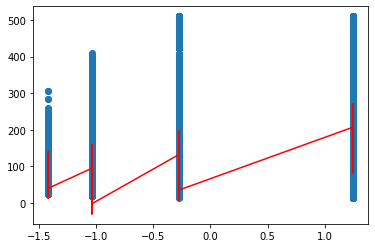

Iteration No.= 621
[array([114.33349726]), array([48.97060364]), array([-6.4321682]), array([-27.48134401]), array([-4.00924132]), array([-4.79026798]), array([17.15822222]), array([-5.09796744])]
Iteration No.= 622
[array([114.33570579]), array([48.97287673]), array([-6.4315915]), array([-27.48331791]), array([-4.00939351]), array([-4.79038841]), array([17.15921483]), array([-5.09808214])]
Iteration No.= 623
[array([114.33789223]), array([48.97513131]), array([-6.43101799]), array([-27.48527713]), array([-4.00954359]), array([-4.79050772]), array([17.16019963]), array([-5.09819575])]
Iteration No.= 624
[array([114.3400568]), array([48.97736754]), array([-6.43044765]), array([-27.48722178]), array([-4.00969158]), array([-4.79062592]), array([17.1611767]), array([-5.09830827])]
Iteration No.= 625
[array([114.34219973]), array([48.97958555]), array([-6.42988049]), array([-27.48915198]), array([-4.00983752]), array([-4.79074303]), array([17.16214609]), array([-5.09841971])]
Iteration No.=

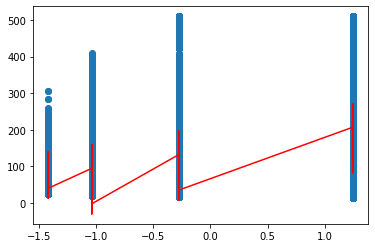

Iteration No.= 631
[array([114.35461473]), array([48.99251959]), array([-6.42654321]), array([-27.50043557]), array([-4.01067101]), array([-4.79142324]), array([17.1678046]), array([-5.09906631])]
Iteration No.= 632
[array([114.35661208]), array([48.99461427]), array([-6.42599782]), array([-27.50226755]), array([-4.0108031]), array([-4.79153296]), array([17.16872193]), array([-5.0991705])]
Iteration No.= 633
[array([114.35858946]), array([48.9966919]), array([-6.42545549]), array([-27.50408592]), array([-4.01093331]), array([-4.79164167]), array([17.16963205]), array([-5.09927369])]
Iteration No.= 634
[array([114.36054707]), array([48.99875263]), array([-6.42491621]), array([-27.50589078]), array([-4.01106163]), array([-4.79174937]), array([17.17053503]), array([-5.0993759])]
Iteration No.= 635
[array([114.36248509]), array([49.00079658]), array([-6.42437995]), array([-27.50768223]), array([-4.01118811]), array([-4.79185607]), array([17.17143091]), array([-5.09947712])]
Iteration No.= 

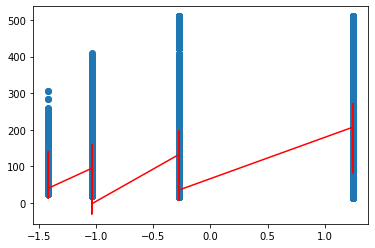

Iteration No.= 641
[array([114.37371299]), array([49.01271571]), array([-6.42122532]), array([-27.51815487]), array([-4.01190914]), array([-4.79247584]), array([17.17666038]), array([-5.10006448])]
Iteration No.= 642
[array([114.37551936]), array([49.01464605]), array([-6.4207099]), array([-27.51985521]), array([-4.01202319]), array([-4.79257582]), array([17.17750816]), array([-5.10015912])]
Iteration No.= 643
[array([114.37730767]), array([49.01656068]), array([-6.42019741]), array([-27.52154293]), array([-4.01213554]), array([-4.79267487]), array([17.17834929]), array([-5.10025286])]
Iteration No.= 644
[array([114.37907809]), array([49.01845973]), array([-6.41968783]), array([-27.5232181]), array([-4.0122462]), array([-4.792773]), array([17.17918382]), array([-5.1003457])]
Iteration No.= 645
[array([114.38083081]), array([49.02034334]), array([-6.41918115]), array([-27.52488084]), array([-4.01235521]), array([-4.79287023]), array([17.18001179]), array([-5.10043766])]
Iteration No.= 6

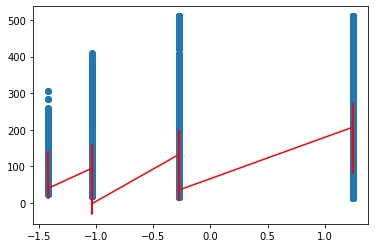

Iteration No.= 651
[array([114.39098512]), array([49.03132756]), array([-6.41620115]), array([-27.53460117]), array([-4.01297531]), array([-4.79343499]), array([17.18484491]), array([-5.10097123])]
Iteration No.= 652
[array([114.39261877]), array([49.0331065]), array([-6.41571438]), array([-27.53617939]), array([-4.01307317]), array([-4.7935261]), array([17.18562845]), array([-5.10105721])]
Iteration No.= 653
[array([114.39423608]), array([49.03487098]), array([-6.4152304]), array([-27.5377459]), array([-4.01316951]), array([-4.79361636]), array([17.18640584]), array([-5.10114237])]
Iteration No.= 654
[array([114.39583722]), array([49.03662111]), array([-6.41474919]), array([-27.53930077]), array([-4.01326434]), array([-4.79370579]), array([17.18717713]), array([-5.10122671])]
Iteration No.= 655
[array([114.39742235]), array([49.038357]), array([-6.41427076]), array([-27.5408441]), array([-4.01335768]), array([-4.79379439]), array([17.18794236]), array([-5.10131025])]
Iteration No.= 65

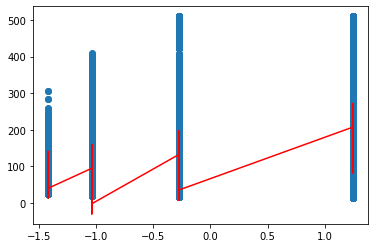

Iteration No.= 661
[array([114.40660572]), array([49.04847996]), array([-6.41145748]), array([-27.54986651]), array([-4.01388737]), array([-4.79430908]), array([17.19240932]), array([-5.101795])]
Iteration No.= 662
[array([114.40808317]), array([49.05011944]), array([-6.41099804]), array([-27.55133143]), array([-4.01397073]), array([-4.79439211]), array([17.19313351]), array([-5.10187311])]
Iteration No.= 663
[array([114.40954583]), array([49.05174559]), array([-6.41054126]), array([-27.55278548]), array([-4.01405274]), array([-4.79447437]), array([17.19385201]), array([-5.10195048])]
Iteration No.= 664
[array([114.41099387]), array([49.05335852]), array([-6.41008713]), array([-27.55422874]), array([-4.0141334]), array([-4.79455588]), array([17.19456488]), array([-5.10202711])]
Iteration No.= 665
[array([114.41242744]), array([49.05495833]), array([-6.40963564]), array([-27.5556613]), array([-4.01421272]), array([-4.79463663]), array([17.19527215]), array([-5.10210301])]
Iteration No.=

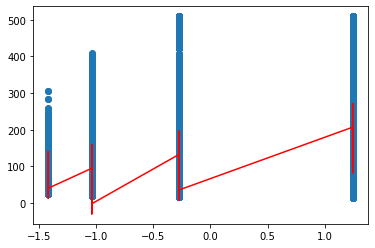

Iteration No.= 671
[array([114.42073272]), array([49.06428785]), array([-6.40698134]), array([-27.56403621]), array([-4.01466153]), array([-4.79510573]), array([17.19940082]), array([-5.10254343])]
Iteration No.= 672
[array([114.42206889]), array([49.06579884]), array([-6.40654794]), array([-27.56539601]), array([-4.01473194]), array([-4.79518141]), array([17.20007017]), array([-5.1026144])]
Iteration No.= 673
[array([114.4233917]), array([49.06729755]), array([-6.40611708]), array([-27.56674574]), array([-4.01480114]), array([-4.79525639]), array([17.20073427]), array([-5.1026847])]
Iteration No.= 674
[array([114.42470128]), array([49.06878408]), array([-6.40568875]), array([-27.56808545]), array([-4.01486913]), array([-4.79533068]), array([17.20139317]), array([-5.10275433])]
Iteration No.= 675
[array([114.42599777]), array([49.07025853]), array([-6.40526292]), array([-27.56941523]), array([-4.01493594]), array([-4.79540429]), array([17.20204689]), array([-5.10282329])]
Iteration No.

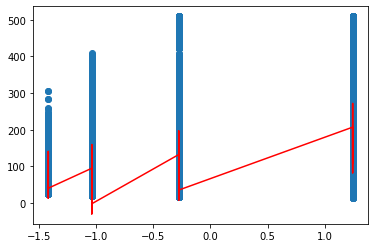

Iteration No.= 681
[array([114.43350892]), array([49.07885706]), array([-6.40276]), array([-27.5771894]), array([-4.01531255]), array([-4.79583188]), array([17.20586303]), array([-5.10322347])]
Iteration No.= 682
[array([114.43471733]), array([49.08024967]), array([-6.4023514]), array([-27.57845168]), array([-4.01537141]), array([-4.79590087]), array([17.20648171]), array([-5.10328796])]
Iteration No.= 683
[array([114.43591365]), array([49.08163097]), array([-6.40194521]), array([-27.57970461]), array([-4.01542918]), array([-4.79596922]), array([17.20709555]), array([-5.10335184])]
Iteration No.= 684
[array([114.43709801]), array([49.08300105]), array([-6.40154142]), array([-27.58094825]), array([-4.01548588]), array([-4.79603694]), array([17.20770458]), array([-5.1034151])]
Iteration No.= 685
[array([114.43827053]), array([49.08436001]), array([-6.40114002]), array([-27.58218267]), array([-4.01554152]), array([-4.79610404]), array([17.20830883]), array([-5.10347777])]
Iteration No.= 6

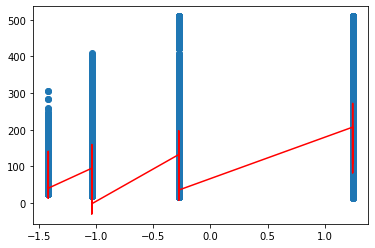

Iteration No.= 691
[array([114.44506348]), array([49.09228505]), array([-6.39878108]), array([-27.58939945]), array([-4.01585382]), array([-4.79649384]), array([17.2118362]), array([-5.10384141])]
Iteration No.= 692
[array([114.44615635]), array([49.0935686]), array([-6.39839605]), array([-27.59057125]), array([-4.01590238]), array([-4.79655674]), array([17.21240808]), array([-5.10390002])]
Iteration No.= 693
[array([114.44723828]), array([49.09484173]), array([-6.39801332]), array([-27.59173436]), array([-4.01594999]), array([-4.79661905]), array([17.21297548]), array([-5.10395806])]
Iteration No.= 694
[array([114.4483094]), array([49.09610452]), array([-6.39763286]), array([-27.59288886]), array([-4.01599664]), array([-4.79668079]), array([17.21353844]), array([-5.10401556])]
Iteration No.= 695
[array([114.4493698]), array([49.09735705]), array([-6.39725468]), array([-27.59403481]), array([-4.01604235]), array([-4.79674196]), array([17.21409698]), array([-5.1040725])]
Iteration No.= 

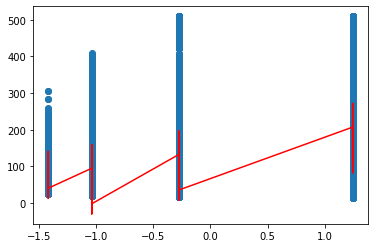

Iteration No.= 701
[array([114.45551322]), array([49.10466158]), array([-6.39503254]), array([-27.60073442]), array([-4.01629746]), array([-4.79709735]), array([17.21735755]), array([-5.10440297])]
Iteration No.= 702
[array([114.45650159]), array([49.10584464]), array([-6.3946699]), array([-27.60182225]), array([-4.01633689]), array([-4.79715469]), array([17.21788618]), array([-5.10445623])]
Iteration No.= 703
[array([114.45748007]), array([49.1070181]), array([-6.39430944]), array([-27.60290203]), array([-4.01637547]), array([-4.7972115]), array([17.21841067]), array([-5.10450898])]
Iteration No.= 704
[array([114.45844877]), array([49.10818204]), array([-6.39395115]), array([-27.60397382]), array([-4.01641319]), array([-4.7972678]), array([17.21893106]), array([-5.10456123])]
Iteration No.= 705
[array([114.45940778]), array([49.10933652]), array([-6.39359501]), array([-27.60503767]), array([-4.01645009]), array([-4.79732357]), array([17.21944737]), array([-5.10461298])]
Iteration No.=

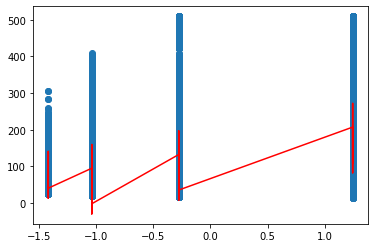

Iteration No.= 711
[array([114.46496378]), array([49.11606931]), array([-6.39150273]), array([-27.6112574]), array([-4.01665449]), array([-4.79764762]), array([17.22246143]), array([-5.10491333])]
Iteration No.= 712
[array([114.46585764]), array([49.11715979]), array([-6.39116134]), array([-27.61226733]), array([-4.01668582]), array([-4.79769991]), array([17.2229501]), array([-5.10496173])]
Iteration No.= 713
[array([114.46674257]), array([49.11824141]), array([-6.39082201]), array([-27.61326978]), array([-4.0167164]), array([-4.79775171]), array([17.22343494]), array([-5.10500968])]
Iteration No.= 714
[array([114.46761864]), array([49.11931426]), array([-6.39048474]), array([-27.61426482]), array([-4.01674623]), array([-4.79780304]), array([17.22391599]), array([-5.10505716])]
Iteration No.= 715
[array([114.46848595]), array([49.1203784]), array([-6.39014951]), array([-27.61525249]), array([-4.01677532]), array([-4.7978539]), array([17.22439328]), array([-5.1051042])]
Iteration No.= 7

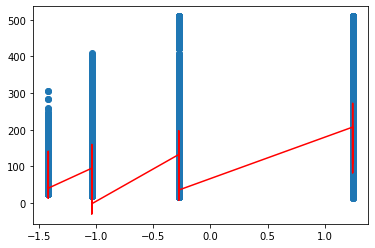

Iteration No.= 721
[array([114.4735107]), array([49.12658438]), array([-6.38818037]), array([-27.62102692]), array([-4.01693486]), array([-4.79814941]), array([17.22717956]), array([-5.10537719])]
Iteration No.= 722
[array([114.47431909]), array([49.12758954]), array([-6.38785913]), array([-27.62196455]), array([-4.01695904]), array([-4.79819709]), array([17.22763131]), array([-5.10542118])]
Iteration No.= 723
[array([114.4751194]), array([49.12858654]), array([-6.38753984]), array([-27.62289525]), array([-4.01698254]), array([-4.79824434]), array([17.22807952]), array([-5.10546476])]
Iteration No.= 724
[array([114.4759117]), array([49.12957546]), array([-6.38722249]), array([-27.62381907]), array([-4.01700539]), array([-4.79829115]), array([17.22852422]), array([-5.10550793])]
Iteration No.= 725
[array([114.47669609]), array([49.13055636]), array([-6.38690708]), array([-27.62473605]), array([-4.01702759]), array([-4.79833753]), array([17.22896545]), array([-5.10555068])]
Iteration No.

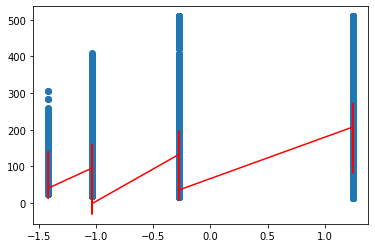

Iteration No.= 731
[array([114.48124038]), array([49.1362769]), array([-6.38505462]), array([-27.63009725]), array([-4.01714757]), array([-4.79860703]), array([17.23154126]), array([-5.10579882])]
Iteration No.= 732
[array([114.48197147]), array([49.13720344]), array([-6.38475246]), array([-27.6309678]), array([-4.01716544]), array([-4.79865052]), array([17.23195889]), array([-5.10583882])]
Iteration No.= 733
[array([114.48269526]), array([49.13812248]), array([-6.38445214]), array([-27.63183192]), array([-4.01718272]), array([-4.79869361]), array([17.23237325]), array([-5.10587843])]
Iteration No.= 734
[array([114.4834118]), array([49.13903405]), array([-6.38415366]), array([-27.63268964]), array([-4.01719942]), array([-4.7987363]), array([17.23278437]), array([-5.10591767])]
Iteration No.= 735
[array([114.48412118]), array([49.13993824]), array([-6.38385702]), array([-27.63354102]), array([-4.01721555]), array([-4.79877861]), array([17.23319227]), array([-5.10595653])]
Iteration No.=

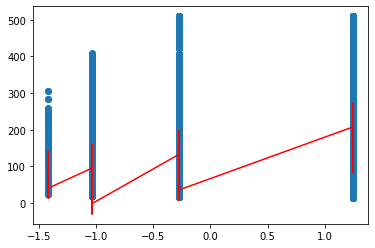

Iteration No.= 741
[array([114.48823096]), array([49.14521147]), array([-6.38211503]), array([-27.63851875]), array([-4.01730074]), array([-4.79902442]), array([17.2355736]), array([-5.10618211])]
Iteration No.= 742
[array([114.48889215]), array([49.14606557]), array([-6.38183092]), array([-27.63932704]), array([-4.01731307]), array([-4.79906409]), array([17.23595969]), array([-5.10621846])]
Iteration No.= 743
[array([114.48954673]), array([49.14691275]), array([-6.38154857]), array([-27.64012936]), array([-4.01732488]), array([-4.79910339]), array([17.23634277]), array([-5.10625448])]
Iteration No.= 744
[array([114.49019476]), array([49.14775306]), array([-6.38126795]), array([-27.64092575]), array([-4.01733619]), array([-4.79914234]), array([17.23672286]), array([-5.10629015])]
Iteration No.= 745
[array([114.49083631]), array([49.14858656]), array([-6.38098906]), array([-27.64171625]), array([-4.017347]), array([-4.79918093]), array([17.23709998]), array([-5.10632548])]
Iteration No.

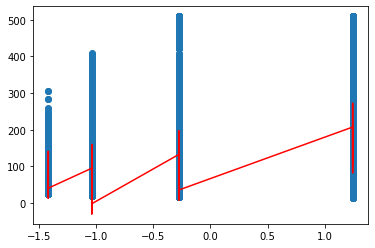

Iteration No.= 751
[array([114.49455312]), array([49.15344757]), array([-6.37935158]), array([-27.6463381]), array([-4.0174017]), array([-4.79940516]), array([17.23930158]), array([-5.10653055])]
Iteration No.= 752
[array([114.49515108]), array([49.15423492]), array([-6.37908455]), array([-27.64708861]), array([-4.01740918]), array([-4.79944135]), array([17.23965854]), array([-5.10656361])]
Iteration No.= 753
[array([114.49574307]), array([49.15501588]), array([-6.37881918]), array([-27.64783358]), array([-4.01741622]), array([-4.7994772]), array([17.24001272]), array([-5.10659635])]
Iteration No.= 754
[array([114.49632914]), array([49.15579052]), array([-6.37855545]), array([-27.64857305]), array([-4.01742281]), array([-4.79951273]), array([17.24036412]), array([-5.10662878])]
Iteration No.= 755
[array([114.49690935]), array([49.15655887]), array([-6.37829335]), array([-27.64930705]), array([-4.01742896]), array([-4.79954793]), array([17.24071278]), array([-5.10666091])]
Iteration No.

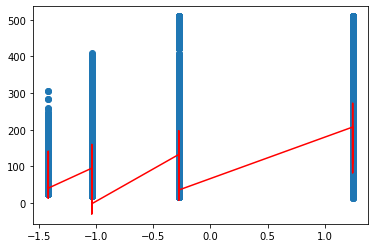

Iteration No.= 761
[array([114.50027076]), array([49.16104002]), array([-6.37675466]), array([-27.65359861]), array([-4.01745705]), array([-4.7997525]), array([17.2427483]), array([-5.10684736])]
Iteration No.= 762
[array([114.50081155]), array([49.16176585]), array([-6.37650377]), array([-27.6542955]), array([-4.01746031]), array([-4.79978552]), array([17.24307834]), array([-5.10687742])]
Iteration No.= 763
[array([114.50134694]), array([49.16248579]), array([-6.37625445]), array([-27.65498724]), array([-4.01746318]), array([-4.79981823]), array([17.2434058]), array([-5.10690719])]
Iteration No.= 764
[array([114.50187697]), array([49.1631999]), array([-6.37600668]), array([-27.65567388]), array([-4.01746567]), array([-4.79985064]), array([17.24373071]), array([-5.10693667])]
Iteration No.= 765
[array([114.5024017]), array([49.16390823]), array([-6.37576045]), array([-27.65635545]), array([-4.01746778]), array([-4.79988276]), array([17.24405307]), array([-5.10696588])]
Iteration No.= 7

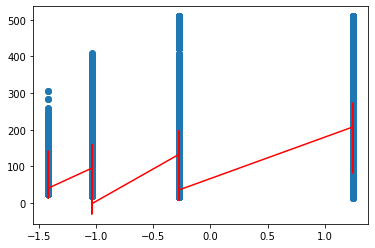

Iteration No.= 771
[array([114.5054417]), array([49.1680393]), array([-6.37431509]), array([-27.66034047]), array([-4.01747274]), array([-4.80006941]), array([17.24593511]), array([-5.10713542])]
Iteration No.= 772
[array([114.50593078]), array([49.16870843]), array([-6.37407945]), array([-27.66098759]), array([-4.01747234]), array([-4.80009953]), array([17.24624026]), array([-5.10716275])]
Iteration No.= 773
[array([114.50641497]), array([49.16937214]), array([-6.37384528]), array([-27.66162993]), array([-4.0174716]), array([-4.80012938]), array([17.24654304]), array([-5.10718982])]
Iteration No.= 774
[array([114.50689432]), array([49.17003047]), array([-6.37361258]), array([-27.66226753]), array([-4.01747053]), array([-4.80015896]), array([17.24684345]), array([-5.10721664])]
Iteration No.= 775
[array([114.50736888]), array([49.17068347]), array([-6.37338134]), array([-27.66290043]), array([-4.01746912]), array([-4.80018826]), array([17.24714152]), array([-5.1072432])]
Iteration No.=

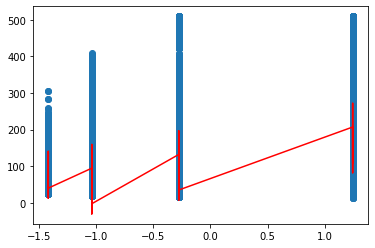

Iteration No.= 781
[array([114.5101182]), array([49.17449192]), array([-6.37202409]), array([-27.66660093]), array([-4.0174541]), array([-4.80035858]), array([17.2488817]), array([-5.10739737])]
Iteration No.= 782
[array([114.51056052]), array([49.1751088]), array([-6.37180284]), array([-27.66720186]), array([-4.01745053]), array([-4.80038607]), array([17.24916386]), array([-5.10742222])]
Iteration No.= 783
[array([114.51099841]), array([49.17572068]), array([-6.37158298]), array([-27.66779835]), array([-4.01744668]), array([-4.80041331]), array([17.24944382]), array([-5.10744684])]
Iteration No.= 784
[array([114.51143193]), array([49.17632761]), array([-6.3713645]), array([-27.66839044]), array([-4.01744254]), array([-4.8004403]), array([17.2497216]), array([-5.10747123])]
Iteration No.= 785
[array([114.51186111]), array([49.17692962]), array([-6.3711474]), array([-27.66897816]), array([-4.01743812]), array([-4.80046705]), array([17.2499972]), array([-5.10749538])]
Iteration No.= 786


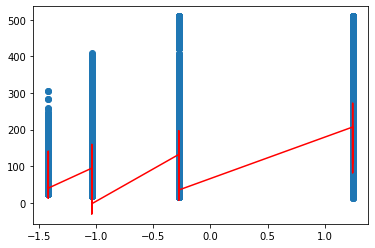

Iteration No.= 791
[array([114.51434755]), array([49.18044073]), array([-6.36987329]), array([-27.67241458]), array([-4.01740591]), array([-4.80062248]), array([17.25160629]), array([-5.10763559])]
Iteration No.= 792
[array([114.51474757]), array([49.18100945]), array([-6.36966561]), array([-27.67297263]), array([-4.01739963]), array([-4.80064757]), array([17.2518672]), array([-5.10765819])]
Iteration No.= 793
[array([114.51514359]), array([49.18157356]), array([-6.36945925]), array([-27.67352656]), array([-4.01739311]), array([-4.80067243]), array([17.25212607]), array([-5.10768058])]
Iteration No.= 794
[array([114.51553566]), array([49.18213311]), array([-6.36925419]), array([-27.6740764]), array([-4.01738634]), array([-4.80069706]), array([17.25238293]), array([-5.10770276])]
Iteration No.= 795
[array([114.5159238]), array([49.18268813]), array([-6.36905043]), array([-27.6746222]), array([-4.01737934]), array([-4.80072147]), array([17.25263778]), array([-5.10772473])]
Iteration No.=

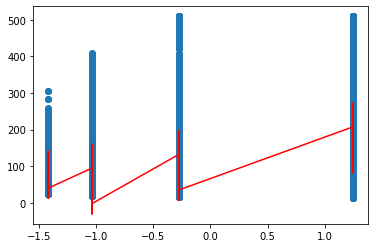

Iteration No.= 801
[array([114.51817249]), array([49.18592519]), array([-6.36785472]), array([-27.67781349]), array([-4.01733246]), array([-4.80086333]), array([17.2541257]), array([-5.10785226])]
Iteration No.= 802
[array([114.51853426]), array([49.18644953]), array([-6.36765984]), array([-27.67833173]), array([-4.01732387]), array([-4.80088623]), array([17.25436697]), array([-5.10787281])]
Iteration No.= 803
[array([114.51889242]), array([49.18696962]), array([-6.3674662]), array([-27.67884616]), array([-4.01731508]), array([-4.80090892]), array([17.25460635]), array([-5.10789318])]
Iteration No.= 804
[array([114.51924699]), array([49.1874855]), array([-6.36727379]), array([-27.67935679]), array([-4.01730608]), array([-4.80093141]), array([17.25484387]), array([-5.10791335])]
Iteration No.= 805
[array([114.51959802]), array([49.18799721]), array([-6.36708261]), array([-27.67986366]), array([-4.01729688]), array([-4.80095369]), array([17.25507954]), array([-5.10793333])]
Iteration No.

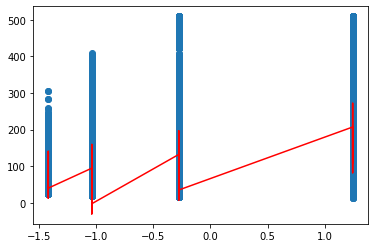

Iteration No.= 811
[array([114.5216317]), array([49.19098169]), array([-6.3659608]), array([-27.68282741]), array([-4.01723758]), array([-4.80108318]), array([17.25645547]), array([-5.10804933])]
Iteration No.= 812
[array([114.52195888]), array([49.19146512]), array([-6.36577798]), array([-27.68330871]), array([-4.01722704]), array([-4.80110409]), array([17.25667858]), array([-5.10806803])]
Iteration No.= 813
[array([114.52228279]), array([49.19194463]), array([-6.36559633]), array([-27.68378646]), array([-4.01721634]), array([-4.8011248]), array([17.25689995]), array([-5.10808655])]
Iteration No.= 814
[array([114.52260346]), array([49.19242027]), array([-6.36541584]), array([-27.68426069]), array([-4.01720545]), array([-4.80114533]), array([17.2571196]), array([-5.1081049])]
Iteration No.= 815
[array([114.52292093]), array([49.19289206]), array([-6.3652365]), array([-27.68473143]), array([-4.0171944]), array([-4.80116566]), array([17.25733753]), array([-5.10812308])]
Iteration No.= 81

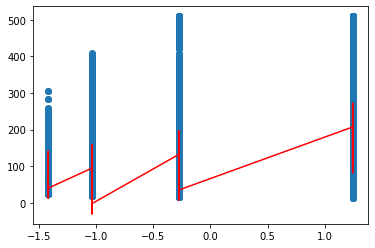

Iteration No.= 821
[array([114.52476015]), array([49.19564374]), array([-6.3641843]), array([-27.68748395]), array([-4.01712468]), array([-4.80128388]), array([17.25860996]), array([-5.1082286])]
Iteration No.= 822
[array([114.52505604]), array([49.19608946]), array([-6.36401284]), array([-27.68793096]), array([-4.01711252]), array([-4.80130297]), array([17.25881628]), array([-5.10824561])]
Iteration No.= 823
[array([114.52534898]), array([49.19653157]), array([-6.36384248]), array([-27.68837467]), array([-4.01710022]), array([-4.80132188]), array([17.259021]), array([-5.10826246])]
Iteration No.= 824
[array([114.52563899]), array([49.19697011]), array([-6.36367322]), array([-27.68881511]), array([-4.01708777]), array([-4.80134062]), array([17.25922413]), array([-5.10827916])]
Iteration No.= 825
[array([114.5259261]), array([49.1974051]), array([-6.36350504]), array([-27.68925231]), array([-4.01707518]), array([-4.80135919]), array([17.25942568]), array([-5.10829569])]
Iteration No.= 8

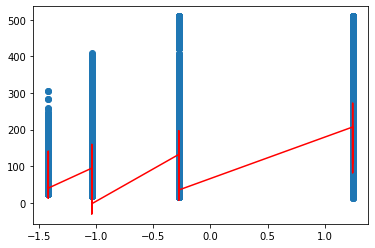

Iteration No.= 831
[array([114.52758946]), array([49.1999422]), array([-6.36251839]), array([-27.69180874]), array([-4.01699683]), array([-4.80146712]), array([17.26060242]), array([-5.10839169])]
Iteration No.= 832
[array([114.52785706]), array([49.20035316]), array([-6.36235763]), array([-27.6922239]), array([-4.01698332]), array([-4.80148455]), array([17.26079324]), array([-5.10840717])]
Iteration No.= 833
[array([114.52812199]), array([49.2007608]), array([-6.3621979]), array([-27.69263601]), array([-4.0169697]), array([-4.80150181]), array([17.26098257]), array([-5.1084225])]
Iteration No.= 834
[array([114.52838427]), array([49.20116515]), array([-6.3620392]), array([-27.69304508]), array([-4.01695596]), array([-4.80151892]), array([17.26117042]), array([-5.10843769])]
Iteration No.= 835
[array([114.52864393]), array([49.20156623]), array([-6.36188152]), array([-27.69345115]), array([-4.01694211]), array([-4.80153588]), array([17.26135682]), array([-5.10845273])]
Iteration No.= 83

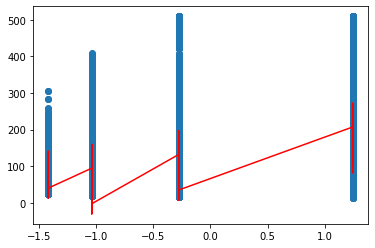

Iteration No.= 841
[array([114.53014824]), array([49.20390553]), array([-6.36095657]), array([-27.69582554]), array([-4.01685671]), array([-4.80163444]), array([17.26244512]), array([-5.10854008])]
Iteration No.= 842
[array([114.53039025]), array([49.20428446]), array([-6.36080587]), array([-27.69621114]), array([-4.01684212]), array([-4.80165035]), array([17.2626216]), array([-5.10855416])]
Iteration No.= 843
[array([114.53062985]), array([49.20466032]), array([-6.36065615]), array([-27.69659391]), array([-4.01682743]), array([-4.80166611]), array([17.2627967]), array([-5.10856811])]
Iteration No.= 844
[array([114.53086705]), array([49.20503315]), array([-6.36050739]), array([-27.69697386]), array([-4.01681265]), array([-4.80168174]), array([17.26297044]), array([-5.10858193])]
Iteration No.= 845
[array([114.53110188]), array([49.20540297]), array([-6.36035959]), array([-27.69735101]), array([-4.01679777]), array([-4.80169722]), array([17.26314283]), array([-5.10859562])]
Iteration No

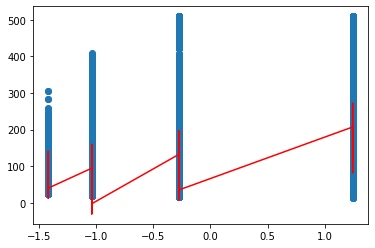

Iteration No.= 851
[array([114.53246235]), array([49.20755995]), array([-6.35949268]), array([-27.6995564]), array([-4.01670673]), array([-4.80178723]), array([17.26414938]), array([-5.1086751])]
Iteration No.= 852
[array([114.53268123]), array([49.20790934]), array([-6.35935145]), array([-27.69991456]), array([-4.01669127]), array([-4.80180176]), array([17.2643126]), array([-5.10868791])]
Iteration No.= 853
[array([114.53289791]), array([49.20825592]), array([-6.35921114]), array([-27.70027008]), array([-4.01667574]), array([-4.80181616]), array([17.26447455]), array([-5.10870061])]
Iteration No.= 854
[array([114.53311243]), array([49.2085997]), array([-6.35907173]), array([-27.700623]), array([-4.01666014]), array([-4.80183043]), array([17.26463525]), array([-5.10871318])]
Iteration No.= 855
[array([114.53332481]), array([49.20894069]), array([-6.35893323]), array([-27.70097331]), array([-4.01664446]), array([-4.80184457]), array([17.26479469]), array([-5.10872564])]
Iteration No.= 8

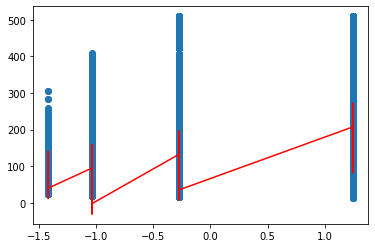

Iteration No.= 861
[array([114.5345552]), array([49.21092961]), array([-6.3581209]), array([-27.70302179]), array([-4.01654901]), array([-4.80192678]), array([17.26572566]), array([-5.10879797])]
Iteration No.= 862
[array([114.53475314]), array([49.21125178]), array([-6.35798857]), array([-27.70335447]), array([-4.01653289]), array([-4.80194005]), array([17.26587663]), array([-5.10880963])]
Iteration No.= 863
[array([114.53494911]), array([49.21157136]), array([-6.35785711]), array([-27.7036847]), array([-4.01651671]), array([-4.8019532]), array([17.26602642]), array([-5.10882118])]
Iteration No.= 864
[array([114.53514312]), array([49.21188835]), array([-6.35772649]), array([-27.70401251]), array([-4.01650048]), array([-4.80196623]), array([17.26617505]), array([-5.10883263])]
Iteration No.= 865
[array([114.53533519]), array([49.21220279]), array([-6.35759673]), array([-27.70433791]), array([-4.01648419]), array([-4.80197915]), array([17.26632253]), array([-5.10884396])]
Iteration No.=

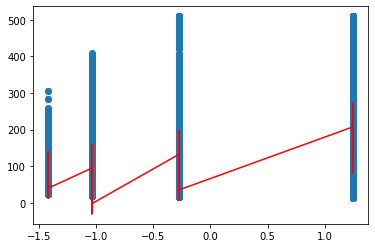

Iteration No.= 871
[array([114.53644793]), array([49.21403677]), array([-6.35683571]), array([-27.7062407]), array([-4.01638543]), array([-4.80205424]), array([17.26718363]), array([-5.10890979])]
Iteration No.= 872
[array([114.53662695]), array([49.21433386]), array([-6.35671175]), array([-27.70654972]), array([-4.01636882]), array([-4.80206636]), array([17.26732327]), array([-5.1089204])]
Iteration No.= 873
[array([114.53680417]), array([49.21462854]), array([-6.3565886]), array([-27.70685648]), array([-4.01635216]), array([-4.80207838]), array([17.26746182]), array([-5.10893092])]
Iteration No.= 874
[array([114.53697963]), array([49.21492085]), array([-6.35646625]), array([-27.70716098]), array([-4.01633547]), array([-4.80209029]), array([17.2675993]), array([-5.10894133])]
Iteration No.= 875
[array([114.53715333]), array([49.21521079]), array([-6.3563447]), array([-27.70746324]), array([-4.01631873]), array([-4.80210208]), array([17.26773571]), array([-5.10895165])]
Iteration No.= 

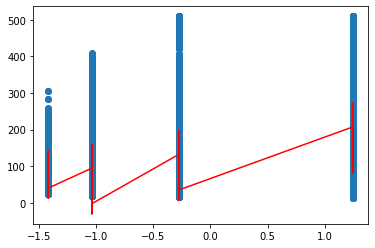

Iteration No.= 881
[array([114.53815968]), array([49.21690196]), array([-6.35563189]), array([-27.70923076]), array([-4.01621763]), array([-4.80217068]), array([17.26853221]), array([-5.10901157])]
Iteration No.= 882
[array([114.53832158]), array([49.21717591]), array([-6.3555158]), array([-27.70951782]), array([-4.01620068]), array([-4.80218176]), array([17.26866138]), array([-5.10902123])]
Iteration No.= 883
[array([114.53848186]), array([49.21744765]), array([-6.35540046]), array([-27.70980277]), array([-4.0161837]), array([-4.80219273]), array([17.26878954]), array([-5.1090308])]
Iteration No.= 884
[array([114.53864054]), array([49.21771719]), array([-6.35528587]), array([-27.71008562]), array([-4.01616669]), array([-4.80220361]), array([17.26891671]), array([-5.10904028])]
Iteration No.= 885
[array([114.53879764]), array([49.21798456]), array([-6.35517204]), array([-27.71036641]), array([-4.01614966]), array([-4.80221439]), array([17.26904289]), array([-5.10904967])]
Iteration No.

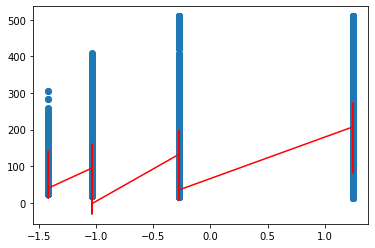

Iteration No.= 891
[array([114.53970775]), array([49.21954407]), array([-6.35450453]), array([-27.71200832]), array([-4.01604706]), array([-4.80227707]), array([17.26977968]), array([-5.10910421])]
Iteration No.= 892
[array([114.53985417]), array([49.21979669]), array([-6.35439581]), array([-27.71227498]), array([-4.01602989]), array([-4.80228719]), array([17.26989916]), array([-5.10911301])]
Iteration No.= 893
[array([114.53999913]), array([49.22004728]), array([-6.35428781]), array([-27.71253969]), array([-4.01601272]), array([-4.80229722]), array([17.27001772]), array([-5.10912172])]
Iteration No.= 894
[array([114.54014264]), array([49.22029585]), array([-6.35418052]), array([-27.71280245]), array([-4.01599553]), array([-4.80230715]), array([17.27013535]), array([-5.10913035])]
Iteration No.= 895
[array([114.54028471]), array([49.2205424]), array([-6.35407393]), array([-27.71306328]), array([-4.01597833]), array([-4.802317]), array([17.27025208]), array([-5.1091389])]
Iteration No.=

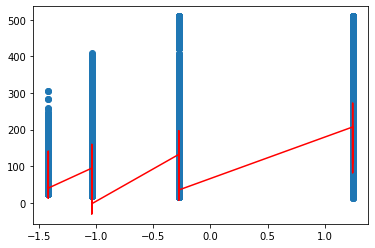

Iteration No.= 901
[array([114.54110781]), array([49.22198053]), array([-6.35344895]), array([-27.71458857]), array([-4.01587496]), array([-4.80237427]), array([17.27093365]), array([-5.10918855])]
Iteration No.= 902
[array([114.54124023]), array([49.2222135]), array([-6.35334717]), array([-27.71483629]), array([-4.01585771]), array([-4.80238352]), array([17.27104418]), array([-5.10919656])]
Iteration No.= 903
[array([114.54137132]), array([49.22244458]), array([-6.35324606]), array([-27.7150822]), array([-4.01584046]), array([-4.80239269]), array([17.27115385]), array([-5.10920449])]
Iteration No.= 904
[array([114.54150111]), array([49.2226738]), array([-6.35314562]), array([-27.7153263]), array([-4.0158232]), array([-4.80240177]), array([17.27126267]), array([-5.10921235])]
Iteration No.= 905
[array([114.5416296]), array([49.22290117]), array([-6.35304583]), array([-27.71556861]), array([-4.01580595]), array([-4.80241077]), array([17.27137065]), array([-5.10922013])]
Iteration No.= 9

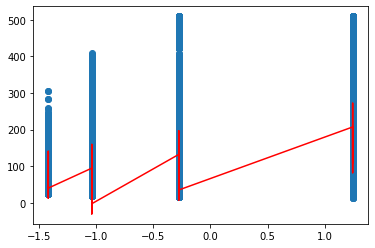

Iteration No.= 911
[array([114.54237399]), array([49.2242274]), array([-6.35246078]), array([-27.71698559]), array([-4.01570244]), array([-4.80246311]), array([17.27200117]), array([-5.10926534])]
Iteration No.= 912
[array([114.54249375]), array([49.22444224]), array([-6.35236551]), array([-27.71721573]), array([-4.01568521]), array([-4.80247156]), array([17.27210342]), array([-5.10927263])]
Iteration No.= 913
[array([114.54261231]), array([49.22465535]), array([-6.35227087]), array([-27.71744418]), array([-4.01566798]), array([-4.80247993]), array([17.27220488]), array([-5.10927985])]
Iteration No.= 914
[array([114.54272969]), array([49.22486673]), array([-6.35217685]), array([-27.71767095]), array([-4.01565075]), array([-4.80248823]), array([17.27230556]), array([-5.10928701])]
Iteration No.= 915
[array([114.54284589]), array([49.22507642]), array([-6.35208345]), array([-27.71789606]), array([-4.01563354]), array([-4.80249646]), array([17.27240545]), array([-5.1092941])]
Iteration No

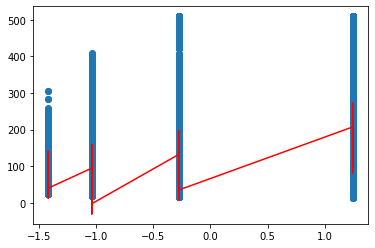

Iteration No.= 921
[array([114.5435191]), array([49.22629948]), array([-6.35153587]), array([-27.71921247]), array([-4.01553045]), array([-4.80254429]), array([17.27298876]), array([-5.10933526])]
Iteration No.= 922
[array([114.54362741]), array([49.22649761]), array([-6.35144671]), array([-27.71942627]), array([-4.01551331]), array([-4.80255202]), array([17.27308336]), array([-5.1093419])]
Iteration No.= 923
[array([114.54373464]), array([49.22669414]), array([-6.35135813]), array([-27.71963851]), array([-4.01549619]), array([-4.80255967]), array([17.27317722]), array([-5.10934847])]
Iteration No.= 924
[array([114.54384079]), array([49.22688908]), array([-6.35127015]), array([-27.71984919]), array([-4.01547908]), array([-4.80256726]), array([17.27327036]), array([-5.10935499])]
Iteration No.= 925
[array([114.54394588]), array([49.22708246]), array([-6.35118274]), array([-27.72005833]), array([-4.01546199]), array([-4.80257478]), array([17.27336278]), array([-5.10936144])]
Iteration No

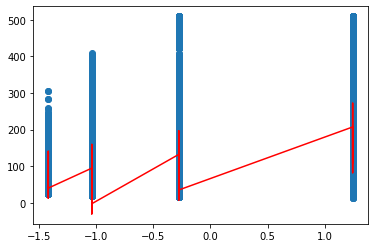

Iteration No.= 931
[array([114.54455472]), array([49.2282104]), array([-6.35067032]), array([-27.72128134]), array([-4.0153598]), array([-4.8026185]), array([17.27390244]), array([-5.10939893])]
Iteration No.= 932
[array([114.54465267]), array([49.22839313]), array([-6.35058689]), array([-27.72147998]), array([-4.01534283]), array([-4.80262556]), array([17.27398996]), array([-5.10940498])]
Iteration No.= 933
[array([114.54474965]), array([49.22857438]), array([-6.350504]), array([-27.72167716]), array([-4.01532589]), array([-4.80263256]), array([17.2740768]), array([-5.10941096])]
Iteration No.= 934
[array([114.54484565]), array([49.22875416]), array([-6.35042167]), array([-27.72187289]), array([-4.01530897]), array([-4.8026395]), array([17.27416298]), array([-5.1094169])]
Iteration No.= 935
[array([114.54494069]), array([49.2289325]), array([-6.35033989]), array([-27.7220672]), array([-4.01529207]), array([-4.80264637]), array([17.27424848]), array([-5.10942278])]
Iteration No.= 936
[

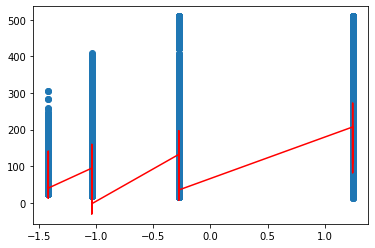

Iteration No.= 941
[array([114.54549132]), array([49.22997275]), array([-6.34986044]), array([-27.72320347]), array([-4.01519117]), array([-4.80268634]), array([17.27474778]), array([-5.10945692])]
Iteration No.= 942
[array([114.5455799]), array([49.23014127]), array([-6.34978238]), array([-27.72338802]), array([-4.01517445]), array([-4.8026928]), array([17.27482875]), array([-5.10946242])]
Iteration No.= 943
[array([114.5456676]), array([49.23030843]), array([-6.34970484]), array([-27.72357122]), array([-4.01515775]), array([-4.8026992]), array([17.2749091]), array([-5.10946788])]
Iteration No.= 944
[array([114.54575443]), array([49.23047424]), array([-6.34962782]), array([-27.72375308]), array([-4.01514107]), array([-4.80270554]), array([17.27498883]), array([-5.10947328])]
Iteration No.= 945
[array([114.54584038]), array([49.23063872]), array([-6.3495513]), array([-27.7239336]), array([-4.01512443]), array([-4.80271182]), array([17.27506794]), array([-5.10947864])]
Iteration No.= 94

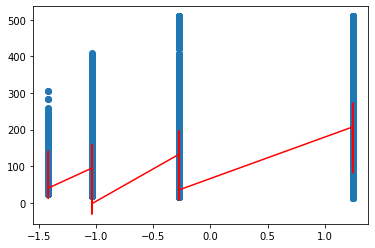

Iteration No.= 951
[array([114.54633836]), array([49.23159811]), array([-6.34910278]), array([-27.72498932]), array([-4.01502518]), array([-4.80274837]), array([17.27552991]), array([-5.10950973])]
Iteration No.= 952
[array([114.54641847]), array([49.23175353]), array([-6.34902976]), array([-27.72516079]), array([-4.01500874]), array([-4.80275427]), array([17.27560484]), array([-5.10951475])]
Iteration No.= 953
[array([114.54649779]), array([49.2319077]), array([-6.34895723]), array([-27.725331]), array([-4.01499234]), array([-4.80276012]), array([17.27567918]), array([-5.10951972])]
Iteration No.= 954
[array([114.54657631]), array([49.23206062]), array([-6.34888517]), array([-27.72549997]), array([-4.01497596]), array([-4.80276592]), array([17.27575295]), array([-5.10952464])]
Iteration No.= 955
[array([114.54665405]), array([49.23221232]), array([-6.3488136]), array([-27.7256677]), array([-4.01495962]), array([-4.80277166]), array([17.27582615]), array([-5.10952952])]
Iteration No.= 

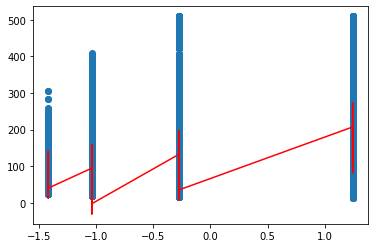

Iteration No.= 961
[array([114.54710441]), array([49.23309716]), array([-6.34839407]), array([-27.7266486]), array([-4.0148623]), array([-4.80280508]), array([17.2762536]), array([-5.10955784])]
Iteration No.= 962
[array([114.54717686]), array([49.2332405]), array([-6.34832577]), array([-27.72680792]), array([-4.0148462]), array([-4.80281048]), array([17.27632293]), array([-5.10956241])]
Iteration No.= 963
[array([114.54724859]), array([49.23338269]), array([-6.34825793]), array([-27.72696607]), array([-4.01483013]), array([-4.80281583]), array([17.27639172]), array([-5.10956694])]
Iteration No.= 964
[array([114.54731961]), array([49.23352374]), array([-6.34819054]), array([-27.72712307]), array([-4.0148141]), array([-4.80282113]), array([17.27645997]), array([-5.10957143])]
Iteration No.= 965
[array([114.54738991]), array([49.23366364]), array([-6.3481236]), array([-27.72727891]), array([-4.01479811]), array([-4.80282638]), array([17.2765277]), array([-5.10957587])]
Iteration No.= 966

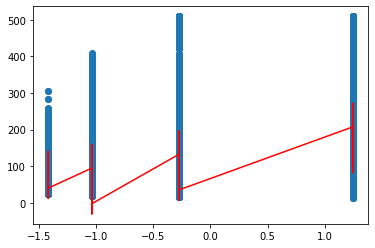

Iteration No.= 971
[array([114.54779721]), array([49.23447975]), array([-6.34773125]), array([-27.72819032]), array([-4.01470294]), array([-4.80285694]), array([17.27692323]), array([-5.10960168])]
Iteration No.= 972
[array([114.54786273]), array([49.23461195]), array([-6.34766738]), array([-27.72833836]), array([-4.01468722]), array([-4.80286188]), array([17.27698738]), array([-5.10960584])]
Iteration No.= 973
[array([114.54792761]), array([49.2347431]), array([-6.34760393]), array([-27.72848531]), array([-4.01467153]), array([-4.80286677]), array([17.27705104]), array([-5.10960996])]
Iteration No.= 974
[array([114.54799183]), array([49.23487319]), array([-6.34754091]), array([-27.72863118]), array([-4.01465588]), array([-4.80287162]), array([17.2771142]), array([-5.10961405])]
Iteration No.= 975
[array([114.54805541]), array([49.23500223]), array([-6.34747831]), array([-27.72877599]), array([-4.01464027]), array([-4.80287643]), array([17.27717687]), array([-5.1096181])]
Iteration No.

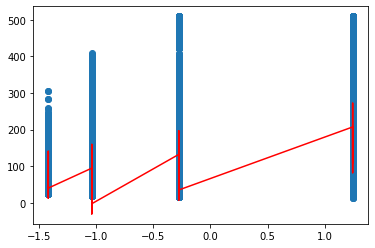

Iteration No.= 981
[array([114.54842376]), array([49.23575495]), array([-6.34711142]), array([-27.72962286]), array([-4.01454746]), array([-4.80290438]), array([17.27754288]), array([-5.10964161])]
Iteration No.= 982
[array([114.54848302]), array([49.23587689]), array([-6.34705169]), array([-27.72976041]), array([-4.01453213]), array([-4.80290889]), array([17.27760224]), array([-5.1096454])]
Iteration No.= 983
[array([114.54854169]), array([49.23599785]), array([-6.34699237]), array([-27.72989696]), array([-4.01451685]), array([-4.80291337]), array([17.27766114]), array([-5.10964916])]
Iteration No.= 984
[array([114.54859978]), array([49.23611783]), array([-6.34693344]), array([-27.73003251]), array([-4.01450161]), array([-4.8029178]), array([17.27771959]), array([-5.10965288])]
Iteration No.= 985
[array([114.54865728]), array([49.23623685]), array([-6.34687491]), array([-27.73016706]), array([-4.01448641]), array([-4.8029222]), array([17.27777759]), array([-5.10965657])]
Iteration No.

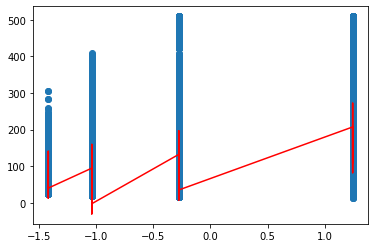

Iteration No.= 991
[array([114.54899041]), array([49.23693113]), array([-6.34653188]), array([-27.73095398]), array([-4.01439611]), array([-4.80294777]), array([17.27811629]), array([-5.109678])]
Iteration No.= 992
[array([114.549044]), array([49.2370436]), array([-6.34647604]), array([-27.7310818]), array([-4.01438121]), array([-4.8029519]), array([17.27817122]), array([-5.10968146])]
Iteration No.= 993
[array([114.54909706]), array([49.23715517]), array([-6.34642057]), array([-27.73120868]), array([-4.01436636]), array([-4.80295599]), array([17.27822573]), array([-5.10968488])]
Iteration No.= 994
[array([114.54914959]), array([49.23726584]), array([-6.34636548]), array([-27.73133463]), array([-4.01435154]), array([-4.80296005]), array([17.27827982]), array([-5.10968827])]
Iteration No.= 995
[array([114.5492016]), array([49.23737562]), array([-6.34631076]), array([-27.73145966]), array([-4.01433678]), array([-4.80296407]), array([17.27833349]), array([-5.10969164])]
Iteration No.= 996

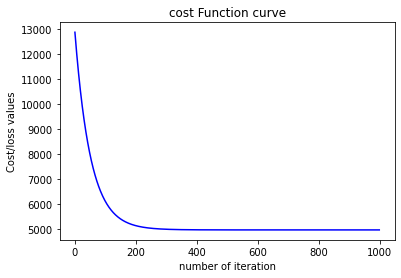

In [ ]:
alpha = 0.01
iters = 1000
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

Iteration No.= 0
[array([11.45543499]), array([4.24465362]), array([-0.95133265]), array([-2.00389041]), array([-0.12403375]), array([-0.46459668]), array([1.34979946]), array([-0.50094727])]


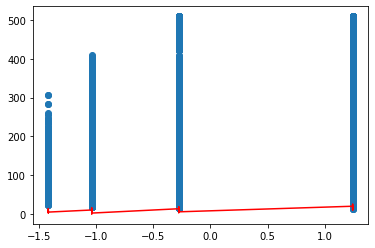

Iteration No.= 1
[array([21.76532648]), array([8.11277028]), array([-1.78546221]), array([-3.87168066]), array([-0.26971224]), array([-0.88398366]), array([2.59571758]), array([-0.95265374])]
Iteration No.= 2
[array([31.04422883]), array([11.63909174]), array([-2.51553142]), array([-5.61115756]), array([-0.430798]), array([-1.26258293]), array([3.74552163]), array([-1.35996931])]
Iteration No.= 3
[array([39.39524094]), array([14.85498841]), array([-3.15329686]), array([-7.22991324]), array([-0.60216808]), array([-1.60438212]), array([4.80643048]), array([-1.72726552])]
Iteration No.= 4
[array([46.91115183]), array([17.78880661]), array([-3.70926762]), array([-8.73529963]), array([-0.77964206]), array([-1.91297725]), array([5.7851487]), array([-2.05848279])]
Iteration No.= 5
[array([53.67547164]), array([20.46617761]), array([-4.19283088]), array([-10.13439545]), array([-0.95983503]), array([-2.19161137]), array([6.68789925]), array([-2.35717292])]
Iteration No.= 6
[array([59.76335947])

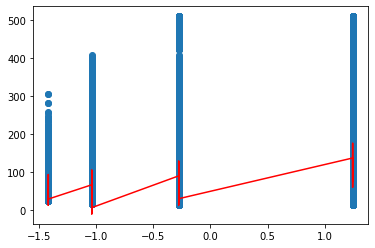

Iteration No.= 11
[array([82.20081797]), array([32.30182568]), array([-5.98444861]), array([-16.65463566]), array([-1.98065295]), array([-3.37945204]), array([10.8044231]), array([-3.62509899])]
Iteration No.= 12
[array([85.43617116]), array([33.72469516]), array([-6.15108299]), array([-17.48192166]), array([-2.12965128]), array([-3.51601917]), array([11.31535366]), array([-3.77008433])]
Iteration No.= 13
[array([88.34798904]), array([35.02601184]), array([-6.29160135]), array([-18.24834974]), array([-2.27111805]), array([-3.63939316]), array([11.78618682]), array([-3.9008626])]
Iteration No.= 14
[array([90.96862512]), array([36.21641979]), array([-6.40928714]), array([-18.95822607]), array([-2.4049131]), array([-3.75085648]), array([12.22003431]), array([-4.01882986])]
Iteration No.= 15
[array([93.3271976]), array([37.30559855]), array([-6.50704978]), array([-19.61558195]), array([-2.53101514]), array([-3.85156626]), array([12.61977178]), array([-4.12524475])]
Iteration No.= 16
[array

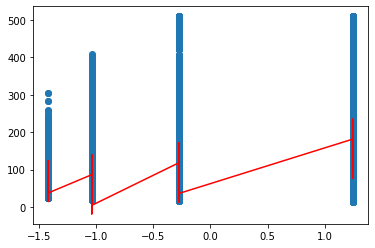

Iteration No.= 21
[array([103.27337086]), array([42.15661119]), array([-6.80033585]), array([-22.65110295]), array([-3.13450314]), array([-4.28186932]), array([14.43726259]), array([-4.57744412])]
Iteration No.= 22
[array([104.40146877]), array([42.74427731]), array([-6.81615344]), array([-23.03327276]), array([-3.21192443]), array([-4.33147884]), array([14.66224201]), array([-4.62922106])]
Iteration No.= 23
[array([105.41675688]), array([43.28270032]), array([-6.82590453]), array([-23.38680263]), array([-3.28354419]), array([-4.3763298]), array([14.86945049]), array([-4.67594182])]
Iteration No.= 24
[array([106.33051619]), array([43.77607405]), array([-6.83052058]), array([-23.7138177]), array([-3.34968675]), array([-4.41688194]), array([15.06028617]), array([-4.71810193])]
Iteration No.= 25
[array([107.15289956]), array([44.22822685]), array([-6.83081663]), array([-24.01629024]), array([-3.41067441]), array([-4.45355032]), array([15.2360383]), array([-4.75614822])]
Iteration No.= 26


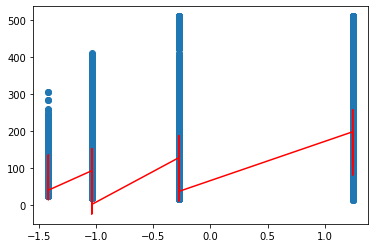

Iteration No.= 31
[array([110.62091574]), array([46.25151523]), array([-6.77589653]), array([-25.4093577]), array([-3.68544499]), array([-4.61062896]), array([16.03424532]), array([-4.91803661])]
Iteration No.= 32
[array([111.01425915]), array([46.49780333]), array([-6.76144364]), array([-25.58440935]), array([-3.71866842]), array([-4.62879591]), array([16.13296462]), array([-4.93660381])]
Iteration No.= 33
[array([111.36826823]), array([46.72370855]), array([-6.74632387]), array([-25.74629965]), array([-3.74897263]), array([-4.64523448]), array([16.22387337]), array([-4.95336567])]
Iteration No.= 34
[array([111.6868764]), array([46.93093603]), array([-6.73075707]), array([-25.89601938]), array([-3.77657979]), array([-4.66011049]), array([16.30758966]), array([-4.96849852])]
Iteration No.= 35
[array([111.97362375]), array([47.1210461]), array([-6.71492998]), array([-26.03448521]), array([-3.80169874]), array([-4.67357372]), array([16.38468283]), array([-4.9821614])]
Iteration No.= 36
[

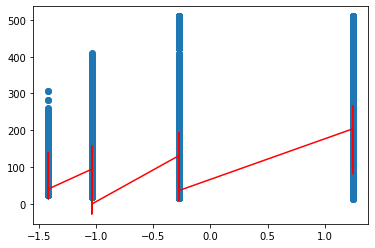

Iteration No.= 41
[array([113.18284622]), array([47.97431489]), array([-6.62172881]), array([-26.67223516]), array([-3.91026946]), array([-4.73141656]), array([16.73479966]), array([-5.04039294])]
Iteration No.= 42
[array([113.31999659]), array([48.07850399]), array([-6.6072819]), array([-26.75241427]), array([-3.9227809]), array([-4.73813036]), array([16.77810904]), array([-5.04708532])]
Iteration No.= 43
[array([113.44343192]), array([48.17414112]), array([-6.59328339]), array([-26.82658225]), array([-3.93404487]), array([-4.74421134]), array([16.8179962]), array([-5.05313043])]
Iteration No.= 44
[array([113.55452372]), array([48.26193347]), array([-6.57976035]), array([-26.89519226]), array([-3.94417047]), array([-4.74971973]), array([16.85473231]), array([-5.05859121])]
Iteration No.= 45
[array([113.65450634]), array([48.34252917]), array([-6.56673194]), array([-26.95866317]), array([-3.95325839]), array([-4.75470995]), array([16.88856705]), array([-5.06352448])]
Iteration No.= 46


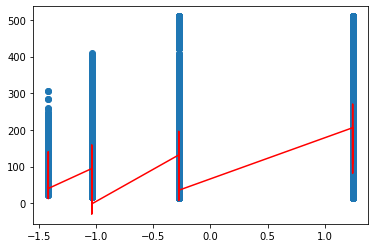

Iteration No.= 51
[array([114.07613615]), array([48.70499984]), array([-6.49928824]), array([-27.2513211]), array([-3.99070436]), array([-4.77622048]), array([17.04232126]), array([-5.08459223])]
Iteration No.= 52
[array([114.12395752]), array([48.74935378]), array([-6.48980506]), array([-27.28816632]), array([-3.99474859]), array([-4.77872719]), array([17.06135685]), array([-5.08701951])]
Iteration No.= 53
[array([114.16699676]), array([48.79008809]), array([-6.4807983]), array([-27.32226312]), array([-3.99831766]), array([-4.78100008]), array([17.07889291]), array([-5.08921354])]
Iteration No.= 54
[array([114.20573208]), array([48.82749977]), array([-6.4722542]), array([-27.35381791]), array([-4.00145806]), array([-4.78306122]), array([17.09504811]), array([-5.09119688])]
Iteration No.= 55
[array([114.24059386]), array([48.8618613]), array([-6.4641579]), array([-27.38302151]), array([-4.00421222]), array([-4.78493053]), array([17.10993167]), array([-5.09298992])]
Iteration No.= 56
[a

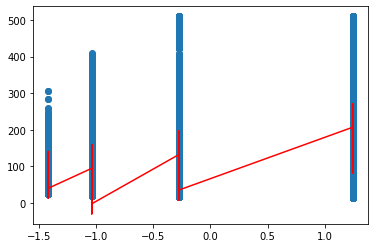

Iteration No.= 61
[array([114.38760708]), array([49.01662431]), array([-6.42408172]), array([-27.5178681]), array([-4.01456786]), array([-4.79301769]), array([17.1776358]), array([-5.10066553])]
Iteration No.= 62
[array([114.40428137]), array([49.03559154]), array([-6.41866498]), array([-27.53487303]), array([-4.01552771]), array([-4.79396427]), array([17.18602852]), array([-5.10155249])]
Iteration No.= 63
[array([114.41928822]), array([49.05301763]), array([-6.41356545]), array([-27.55061649]), array([-4.01632877]), array([-4.79482357]), array([17.1937629]), array([-5.10235488])]
Iteration No.= 64
[array([114.43279439]), array([49.06902834]), array([-6.40876743]), array([-27.56519269]), array([-4.01698892]), array([-4.79560375]), array([17.20089086]), array([-5.10308082])]
Iteration No.= 65
[array([114.44494994]), array([49.08373914]), array([-6.40425565]), array([-27.57868877]), array([-4.01752432]), array([-4.79631217]), array([17.2074602]), array([-5.10373766])]
Iteration No.= 66
[

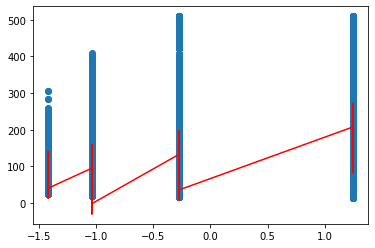

Iteration No.= 71
[array([114.49621028]), array([49.15007127]), array([-6.38240184]), array([-27.64109582]), array([-4.01884027]), array([-4.79938919]), array([17.2373817]), array([-5.10655745])]
Iteration No.= 72
[array([114.50202425]), array([49.15821078]), array([-6.37950762]), array([-27.64897833]), array([-4.01883887]), array([-4.79975105]), array([17.24109644]), array([-5.10688443])]
Iteration No.= 73
[array([114.50725681]), array([49.16569129]), array([-6.37679567]), array([-27.65627918]), array([-4.01879567]), array([-4.80007998]), array([17.24452121]), array([-5.10718052])]
Iteration No.= 74
[array([114.51196612]), array([49.17256635]), array([-6.37425538]), array([-27.66304155]), array([-4.01871683]), array([-4.800379]), array([17.24767879]), array([-5.10744867])]
Iteration No.= 75
[array([114.5162045]), array([49.17888513]), array([-6.37187667]), array([-27.66930541]), array([-4.0186078]), array([-4.80065087]), array([17.25059015]), array([-5.10769153])]
Iteration No.= 76
[a

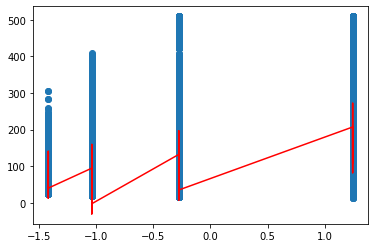

Iteration No.= 81
[array([114.53407788]), array([49.20740424]), array([-6.36049404]), array([-27.69830839]), array([-4.01755696]), array([-4.80183675]), array([17.26386942]), array([-5.10873757])]
Iteration No.= 82
[array([114.53610508]), array([49.21090749]), array([-6.35900425]), array([-27.70197706]), array([-4.01734578]), array([-4.80197691]), array([17.26552076]), array([-5.10885936])]
Iteration No.= 83
[array([114.53792956]), array([49.21412799]), array([-6.35761216]), array([-27.70537629]), array([-4.0171307]), array([-4.80210449]), array([17.26704389]), array([-5.10896976])]
Iteration No.= 84
[array([114.5395716]), array([49.21708864]), array([-6.35631162]), array([-27.708526]), array([-4.01691346]), array([-4.80222063]), array([17.26844882]), array([-5.10906986])]
Iteration No.= 85
[array([114.54104943]), array([49.21981047]), array([-6.35509687]), array([-27.71144459]), array([-4.01669558]), array([-4.80232637]), array([17.26974479]), array([-5.10916063])]
Iteration No.= 86
[

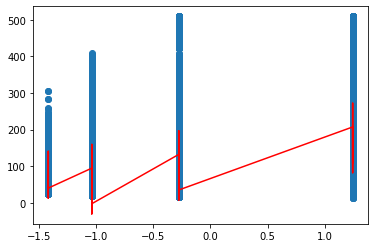

Iteration No.= 91
[array([114.54728149]), array([49.23210568]), array([-6.34932675]), array([-27.72497423]), array([-4.01543509]), array([-4.80278963]), array([17.27566478]), array([-5.10955305])]
Iteration No.= 92
[array([114.54798833]), array([49.23361748]), array([-6.34857703]), array([-27.72668785]), array([-4.01523974]), array([-4.80284467]), array([17.27640223]), array([-5.10959895])]
Iteration No.= 93
[array([114.54862449]), array([49.23500761]), array([-6.34787769]), array([-27.72827614]), array([-4.01504988]), array([-4.80289485]), array([17.27708273]), array([-5.10964061])]
Iteration No.= 94
[array([114.54919703]), array([49.2362859]), array([-6.34722543]), array([-27.72974834]), array([-4.01486576]), array([-4.80294058]), array([17.27771072]), array([-5.10967843])]
Iteration No.= 95
[array([114.54971232]), array([49.23746137]), array([-6.34661717]), array([-27.73111295]), array([-4.0146876]), array([-4.80298228]), array([17.27829028]), array([-5.10971277])]
Iteration No.= 96

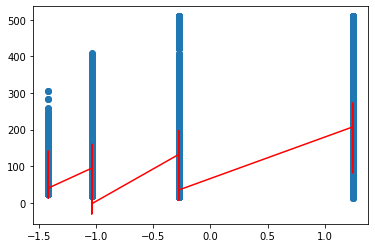

Iteration No.= 101
[array([114.55188531]), array([49.24277563]), array([-6.34374142]), array([-27.7374454]), array([-4.01374795]), array([-4.80316581]), array([17.28094172]), array([-5.10986187])]
Iteration No.= 102
[array([114.55213177]), array([49.24342967]), array([-6.34336953]), array([-27.73824835]), array([-4.01361277]), array([-4.80318773]), array([17.28127259]), array([-5.1098794])]
Iteration No.= 103
[array([114.55235358]), array([49.24403122]), array([-6.34302301]), array([-27.7389928]), array([-4.0134835]), array([-4.80320774]), array([17.28157804]), array([-5.10989533])]
Iteration No.= 104
[array([114.55255322]), array([49.24458452]), array([-6.34270018]), array([-27.73968304]), array([-4.01336002]), array([-4.80322601]), array([17.28186006]), array([-5.10990982])]
Iteration No.= 105
[array([114.55273289]), array([49.24509343]), array([-6.34239943]), array([-27.74032301]), array([-4.01324218]), array([-4.80324268]), array([17.28212045]), array([-5.10992299])]
Iteration No.=

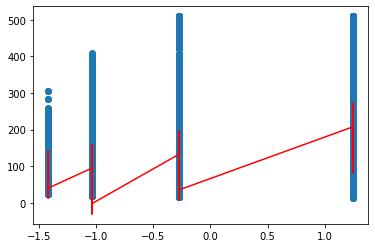

Iteration No.= 111
[array([114.55349056]), array([49.24739607]), array([-6.34098196]), array([-27.74329551]), array([-4.01264456]), array([-4.80331643]), array([17.28331352]), array([-5.10998044])]
Iteration No.= 112
[array([114.55357649]), array([49.24767973]), array([-6.34079922]), array([-27.74367279]), array([-4.01256159]), array([-4.80332529]), array([17.28346266]), array([-5.10998723])]
Iteration No.= 113
[array([114.55365384]), array([49.24794068]), array([-6.34062908]), array([-27.74402268]), array([-4.01248289]), array([-4.80333338]), array([17.2836004]), array([-5.10999341])]
Iteration No.= 114
[array([114.55372344]), array([49.24818076]), array([-6.34047069]), array([-27.74434717]), array([-4.01240831]), array([-4.80334078]), array([17.28372764]), array([-5.10999904])]
Iteration No.= 115
[array([114.55378609]), array([49.24840164]), array([-6.34032323]), array([-27.74464811]), array([-4.01233766]), array([-4.80334755]), array([17.28384517]), array([-5.11000417])]
Iteration N

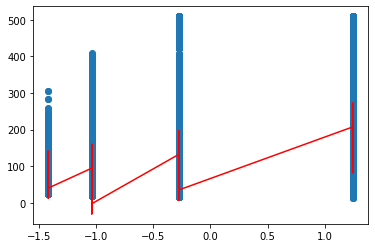

Iteration No.= 121
[array([114.55405028]), array([49.24940185]), array([-6.33962969]), array([-27.74604698]), array([-4.01198704]), array([-4.8033776]), array([17.28438449]), array([-5.11002664])]
Iteration No.= 122
[array([114.55408024]), array([49.24952518]), array([-6.33954047]), array([-27.74622469]), array([-4.01193936]), array([-4.80338123]), array([17.28445202]), array([-5.11002932])]
Iteration No.= 123
[array([114.55410721]), array([49.24963867]), array([-6.33945744]), array([-27.74638953]), array([-4.01189437]), array([-4.80338455]), array([17.28451442]), array([-5.11003175])]
Iteration No.= 124
[array([114.55413148]), array([49.24974311]), array([-6.33938018]), array([-27.74654243]), array([-4.01185193]), array([-4.80338759]), array([17.28457208]), array([-5.11003398])]
Iteration No.= 125
[array([114.55415332]), array([49.24983922]), array([-6.33930829]), array([-27.74668428]), array([-4.01181191]), array([-4.80339037]), array([17.28462537]), array([-5.110036])]
Iteration No.

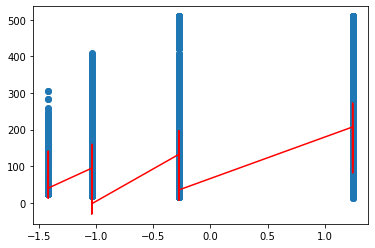

Iteration No.= 131
[array([114.55424544]), array([49.25027479]), array([-6.33897066]), array([-27.74734407]), array([-4.01161602]), array([-4.80340279]), array([17.28487025]), array([-5.11004494])]
Iteration No.= 132
[array([114.55425588]), array([49.25032855]), array([-6.33892729]), array([-27.74742796]), array([-4.01158974]), array([-4.80340429]), array([17.28490097]), array([-5.11004601])]
Iteration No.= 133
[array([114.55426529]), array([49.25037803]), array([-6.33888694]), array([-27.74750578]), array([-4.01156502]), array([-4.80340567]), array([17.28492936]), array([-5.11004699])]
Iteration No.= 134
[array([114.55427375]), array([49.25042358]), array([-6.33884941]), array([-27.74757799]), array([-4.01154178]), array([-4.80340694]), array([17.28495561]), array([-5.11004788])]
Iteration No.= 135
[array([114.55428137]), array([49.25046551]), array([-6.3388145]), array([-27.74764498]), array([-4.01151994]), array([-4.8034081]), array([17.28497988]), array([-5.11004869])]
Iteration No

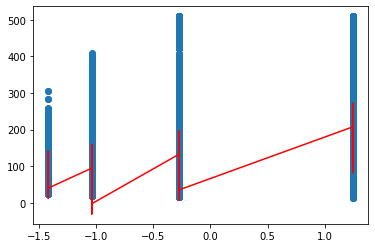

Iteration No.= 141
[array([114.55431348]), array([49.2506557]), array([-6.33865071]), array([-27.7479568]), array([-4.01141401]), array([-4.8034133]), array([17.28509155]), array([-5.11005231])]
Iteration No.= 142
[array([114.55431713]), array([49.2506792]), array([-6.33862969]), array([-27.74799647]), array([-4.01139994]), array([-4.80341393]), array([17.28510558]), array([-5.11005274])]
Iteration No.= 143
[array([114.55432041]), array([49.25070083]), array([-6.33861014]), array([-27.74803328]), array([-4.01138673]), array([-4.80341451]), array([17.28511855]), array([-5.11005314])]
Iteration No.= 144
[array([114.55432336]), array([49.25072075]), array([-6.33859196]), array([-27.74806744]), array([-4.01137434]), array([-4.80341505]), array([17.28513055]), array([-5.1100535])]
Iteration No.= 145
[array([114.55432601]), array([49.25073909]), array([-6.33857505]), array([-27.74809914]), array([-4.01136272]), array([-4.80341554]), array([17.28514165]), array([-5.11005384])]
Iteration No.= 

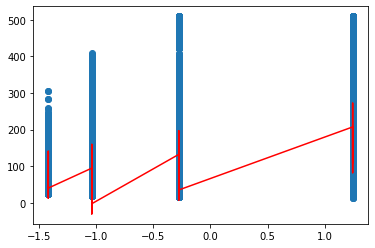

Iteration No.= 151
[array([114.55433721]), array([49.25082237]), array([-6.33849578]), array([-27.74824677]), array([-4.01130676]), array([-4.80341774]), array([17.28519278]), array([-5.11005532])]
Iteration No.= 152
[array([114.55433848]), array([49.25083267]), array([-6.33848562]), array([-27.74826556]), array([-4.01129937]), array([-4.80341801]), array([17.28519922]), array([-5.1100555])]
Iteration No.= 153
[array([114.55433963]), array([49.25084215]), array([-6.33847617]), array([-27.748283]), array([-4.01129246]), array([-4.80341826]), array([17.28520517]), array([-5.11005566])]
Iteration No.= 154
[array([114.55434065]), array([49.25085089]), array([-6.33846738]), array([-27.74829919]), array([-4.01128598]), array([-4.80341848]), array([17.28521067]), array([-5.11005582])]
Iteration No.= 155
[array([114.55434158]), array([49.25085894]), array([-6.33845921]), array([-27.74831421]), array([-4.01127992]), array([-4.80341869]), array([17.28521577]), array([-5.11005595])]
Iteration No.

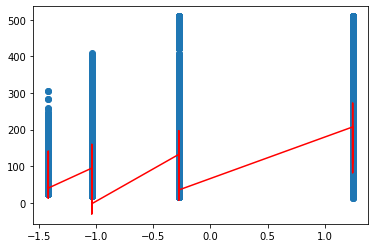

Iteration No.= 161
[array([114.55434548]), array([49.2508955]), array([-6.33842091]), array([-27.74838421]), array([-4.01125086]), array([-4.80341964]), array([17.28523928]), array([-5.11005657])]
Iteration No.= 162
[array([114.55434593]), array([49.25090003]), array([-6.33841601]), array([-27.74839313]), array([-4.01124704]), array([-4.80341975]), array([17.28524224]), array([-5.11005665])]
Iteration No.= 163
[array([114.55434633]), array([49.2509042]), array([-6.33841144]), array([-27.74840141]), array([-4.01124348]), array([-4.80341986]), array([17.28524498]), array([-5.11005672])]
Iteration No.= 164
[array([114.55434668]), array([49.25090804]), array([-6.3384072]), array([-27.74840909]), array([-4.01124014]), array([-4.80341996]), array([17.28524752]), array([-5.11005678])]
Iteration No.= 165
[array([114.55434701]), array([49.25091158]), array([-6.33840326]), array([-27.74841622]), array([-4.01123702]), array([-4.80342005]), array([17.28524986]), array([-5.11005684])]
Iteration No.

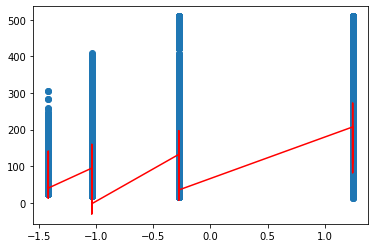

Iteration No.= 171
[array([114.55434837]), array([49.25092769]), array([-6.33838478]), array([-27.74844946]), array([-4.01122213]), array([-4.80342046]), array([17.28526071]), array([-5.1100571])]
Iteration No.= 172
[array([114.55434852]), array([49.25092969]), array([-6.33838241]), array([-27.74845369]), array([-4.01122019]), array([-4.80342051]), array([17.28526208]), array([-5.11005714])]
Iteration No.= 173
[array([114.55434866]), array([49.25093153]), array([-6.33838021]), array([-27.74845763]), array([-4.01121837]), array([-4.80342056]), array([17.28526335]), array([-5.11005717])]
Iteration No.= 174
[array([114.55434879]), array([49.25093322]), array([-6.33837817]), array([-27.74846128]), array([-4.01121667]), array([-4.8034206]), array([17.28526452]), array([-5.11005719])]
Iteration No.= 175
[array([114.5543489]), array([49.25093479]), array([-6.33837626]), array([-27.74846466]), array([-4.01121508]), array([-4.80342064]), array([17.28526561]), array([-5.11005722])]
Iteration No.

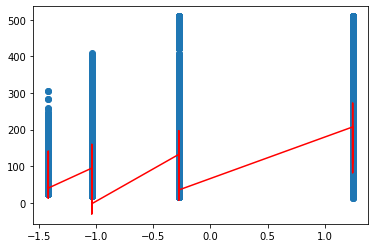

Iteration No.= 181
[array([114.55434938]), array([49.2509419]), array([-6.33836736]), array([-27.74848047]), array([-4.01120753]), array([-4.80342082]), array([17.28527063]), array([-5.11005733])]
Iteration No.= 182
[array([114.55434943]), array([49.25094279]), array([-6.33836622]), array([-27.74848248]), array([-4.01120655]), array([-4.80342084]), array([17.28527126]), array([-5.11005735])]
Iteration No.= 183
[array([114.55434948]), array([49.2509436]), array([-6.33836516]), array([-27.74848435]), array([-4.01120563]), array([-4.80342086]), array([17.28527185]), array([-5.11005736])]
Iteration No.= 184
[array([114.55434952]), array([49.25094435]), array([-6.33836417]), array([-27.74848609]), array([-4.01120477]), array([-4.80342088]), array([17.28527239]), array([-5.11005737])]
Iteration No.= 185
[array([114.55434956]), array([49.25094504]), array([-6.33836325]), array([-27.7484877]), array([-4.01120397]), array([-4.8034209]), array([17.2852729]), array([-5.11005738])]
Iteration No.= 

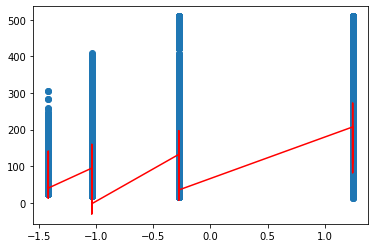

Iteration No.= 191
[array([114.55434973]), array([49.2509482]), array([-6.33835896]), array([-27.74849522]), array([-4.01120018]), array([-4.80342098]), array([17.28527523]), array([-5.11005743])]
Iteration No.= 192
[array([114.55434974]), array([49.25094859]), array([-6.33835841]), array([-27.74849618]), array([-4.01119968]), array([-4.80342099]), array([17.28527553]), array([-5.11005744])]
Iteration No.= 193
[array([114.55434976]), array([49.25094895]), array([-6.3383579]), array([-27.74849707]), array([-4.01119922]), array([-4.80342099]), array([17.2852758]), array([-5.11005744])]
Iteration No.= 194
[array([114.55434978]), array([49.25094928]), array([-6.33835743]), array([-27.7484979]), array([-4.01119879]), array([-4.803421]), array([17.28527605]), array([-5.11005745])]
Iteration No.= 195
[array([114.55434979]), array([49.25094959]), array([-6.33835699]), array([-27.74849867]), array([-4.01119839]), array([-4.80342101]), array([17.28527629]), array([-5.11005745])]
Iteration No.= 1

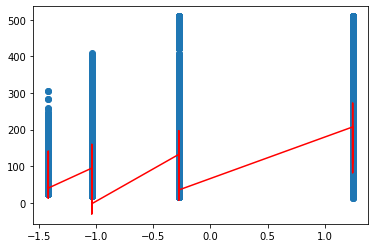

Iteration No.= 201
[array([114.55434985]), array([49.25095099]), array([-6.33835492]), array([-27.74850225]), array([-4.0111965]), array([-4.80342105]), array([17.28527737]), array([-5.11005747])]
Iteration No.= 202
[array([114.55434985]), array([49.25095117]), array([-6.33835466]), array([-27.74850271]), array([-4.01119625]), array([-4.80342105]), array([17.28527751]), array([-5.11005748])]
Iteration No.= 203
[array([114.55434986]), array([49.25095133]), array([-6.33835441]), array([-27.74850313]), array([-4.01119602]), array([-4.80342105]), array([17.28527764]), array([-5.11005748])]
Iteration No.= 204
[array([114.55434987]), array([49.25095148]), array([-6.33835418]), array([-27.74850353]), array([-4.01119581]), array([-4.80342106]), array([17.28527776]), array([-5.11005748])]
Iteration No.= 205
[array([114.55434987]), array([49.25095162]), array([-6.33835397]), array([-27.74850389]), array([-4.01119561]), array([-4.80342106]), array([17.28527787]), array([-5.11005748])]
Iteration N

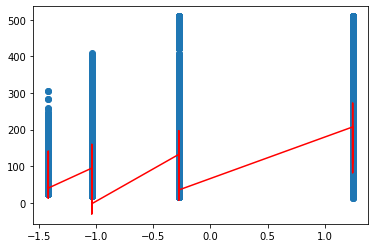

Iteration No.= 211
[array([114.55434989]), array([49.25095224]), array([-6.33835298]), array([-27.7485056]), array([-4.01119467]), array([-4.80342108]), array([17.28527837]), array([-5.11005749])]
Iteration No.= 212
[array([114.55434989]), array([49.25095232]), array([-6.33835285]), array([-27.74850582]), array([-4.01119454]), array([-4.80342108]), array([17.28527844]), array([-5.11005749])]
Iteration No.= 213
[array([114.5543499]), array([49.25095239]), array([-6.33835273]), array([-27.74850602]), array([-4.01119443]), array([-4.80342108]), array([17.2852785]), array([-5.1100575])]
Iteration No.= 214
[array([114.5543499]), array([49.25095246]), array([-6.33835262]), array([-27.74850621]), array([-4.01119433]), array([-4.80342108]), array([17.28527855]), array([-5.1100575])]
Iteration No.= 215
[array([114.5543499]), array([49.25095252]), array([-6.33835252]), array([-27.74850639]), array([-4.01119423]), array([-4.80342108]), array([17.28527861]), array([-5.1100575])]
Iteration No.= 216

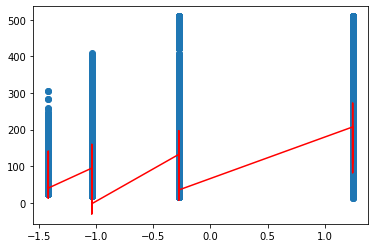

Iteration No.= 221
[array([114.55434991]), array([49.2509528]), array([-6.33835204]), array([-27.7485072]), array([-4.01119376]), array([-4.80342109]), array([17.28527884]), array([-5.1100575])]
Iteration No.= 222
[array([114.55434991]), array([49.25095284]), array([-6.33835198]), array([-27.74850731]), array([-4.0111937]), array([-4.80342109]), array([17.28527887]), array([-5.1100575])]
Iteration No.= 223
[array([114.55434991]), array([49.25095287]), array([-6.33835192]), array([-27.7485074]), array([-4.01119365]), array([-4.80342109]), array([17.2852789]), array([-5.1100575])]
Iteration No.= 224
[array([114.55434991]), array([49.2509529]), array([-6.33835187]), array([-27.74850749]), array([-4.01119359]), array([-4.80342109]), array([17.28527893]), array([-5.1100575])]
Iteration No.= 225
[array([114.55434991]), array([49.25095293]), array([-6.33835182]), array([-27.74850758]), array([-4.01119354]), array([-4.80342109]), array([17.28527895]), array([-5.1100575])]
Iteration No.= 226
[a

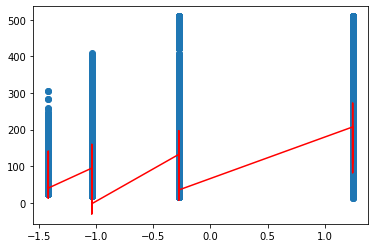

Iteration No.= 231
[array([114.55434991]), array([49.25095305]), array([-6.33835159]), array([-27.74850797]), array([-4.01119331]), array([-4.8034211]), array([17.28527906]), array([-5.11005751])]
Iteration No.= 232
[array([114.55434991]), array([49.25095307]), array([-6.33835156]), array([-27.74850802]), array([-4.01119329]), array([-4.8034211]), array([17.28527908]), array([-5.11005751])]
Iteration No.= 233
[array([114.55434991]), array([49.25095308]), array([-6.33835153]), array([-27.74850806]), array([-4.01119326]), array([-4.8034211]), array([17.28527909]), array([-5.11005751])]
Iteration No.= 234
[array([114.55434991]), array([49.2509531]), array([-6.33835151]), array([-27.74850811]), array([-4.01119323]), array([-4.8034211]), array([17.2852791]), array([-5.11005751])]
Iteration No.= 235
[array([114.55434991]), array([49.25095311]), array([-6.33835148]), array([-27.74850815]), array([-4.01119321]), array([-4.8034211]), array([17.28527911]), array([-5.11005751])]
Iteration No.= 23

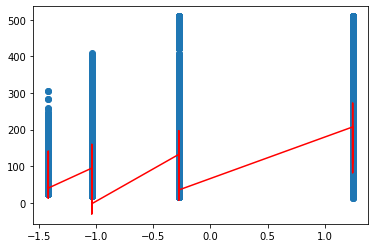

Iteration No.= 241
[array([114.55434991]), array([49.25095317]), array([-6.33835137]), array([-27.74850833]), array([-4.0111931]), array([-4.8034211]), array([17.28527917]), array([-5.11005751])]
Iteration No.= 242
[array([114.55434991]), array([49.25095317]), array([-6.33835136]), array([-27.74850835]), array([-4.01119308]), array([-4.8034211]), array([17.28527917]), array([-5.11005751])]
Iteration No.= 243
[array([114.55434991]), array([49.25095318]), array([-6.33835135]), array([-27.74850838]), array([-4.01119307]), array([-4.8034211]), array([17.28527918]), array([-5.11005751])]
Iteration No.= 244
[array([114.55434991]), array([49.25095318]), array([-6.33835133]), array([-27.7485084]), array([-4.01119306]), array([-4.8034211]), array([17.28527919]), array([-5.11005751])]
Iteration No.= 245
[array([114.55434991]), array([49.25095319]), array([-6.33835132]), array([-27.74850842]), array([-4.01119304]), array([-4.8034211]), array([17.28527919]), array([-5.11005751])]
Iteration No.= 24

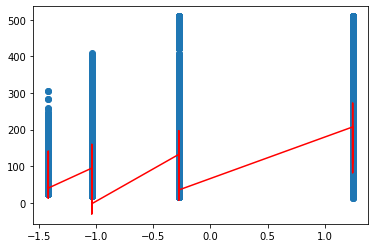

Iteration No.= 251
[array([114.55434991]), array([49.25095322]), array([-6.33835127]), array([-27.74850851]), array([-4.01119299]), array([-4.8034211]), array([17.28527922]), array([-5.11005751])]
Iteration No.= 252
[array([114.55434991]), array([49.25095322]), array([-6.33835126]), array([-27.74850852]), array([-4.01119298]), array([-4.8034211]), array([17.28527922]), array([-5.11005751])]
Iteration No.= 253
[array([114.55434991]), array([49.25095322]), array([-6.33835126]), array([-27.74850853]), array([-4.01119297]), array([-4.8034211]), array([17.28527922]), array([-5.11005751])]
Iteration No.= 254
[array([114.55434991]), array([49.25095323]), array([-6.33835125]), array([-27.74850854]), array([-4.01119297]), array([-4.8034211]), array([17.28527922]), array([-5.11005751])]
Iteration No.= 255
[array([114.55434991]), array([49.25095323]), array([-6.33835125]), array([-27.74850855]), array([-4.01119296]), array([-4.8034211]), array([17.28527923]), array([-5.11005751])]
Iteration No.= 

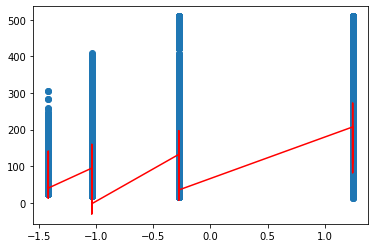

Iteration No.= 261
[array([114.55434991]), array([49.25095324]), array([-6.33835122]), array([-27.74850859]), array([-4.01119294]), array([-4.8034211]), array([17.28527924]), array([-5.11005751])]
Iteration No.= 262
[array([114.55434991]), array([49.25095324]), array([-6.33835122]), array([-27.74850859]), array([-4.01119293]), array([-4.8034211]), array([17.28527924]), array([-5.11005751])]
Iteration No.= 263
[array([114.55434991]), array([49.25095324]), array([-6.33835121]), array([-27.7485086]), array([-4.01119293]), array([-4.8034211]), array([17.28527924]), array([-5.11005751])]
Iteration No.= 264
[array([114.55434991]), array([49.25095324]), array([-6.33835121]), array([-27.7485086]), array([-4.01119293]), array([-4.8034211]), array([17.28527924]), array([-5.11005751])]
Iteration No.= 265
[array([114.55434991]), array([49.25095324]), array([-6.33835121]), array([-27.74850861]), array([-4.01119292]), array([-4.8034211]), array([17.28527924]), array([-5.11005751])]
Iteration No.= 26

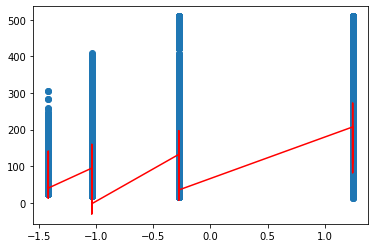

Iteration No.= 271
[array([114.55434991]), array([49.25095325]), array([-6.3383512]), array([-27.74850863]), array([-4.01119291]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 272
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850863]), array([-4.01119291]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 273
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850863]), array([-4.01119291]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 274
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850864]), array([-4.01119291]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 275
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850864]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 27

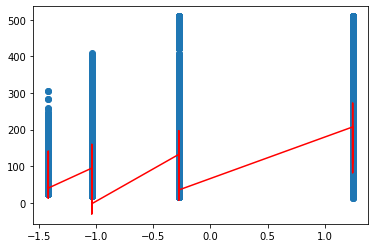

Iteration No.= 281
[array([114.55434991]), array([49.25095325]), array([-6.33835118]), array([-27.74850865]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 282
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850865]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 283
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850865]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 284
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850865]), array([-4.0111929]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 285
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850865]), array([-4.0111929]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 286
[

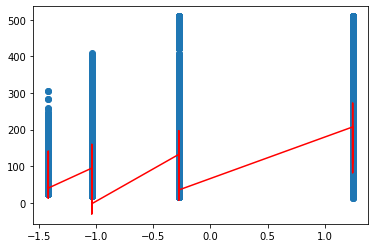

Iteration No.= 291
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 292
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 293
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 294
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 295
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

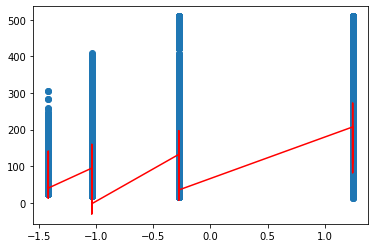

Iteration No.= 301
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 302
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 303
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 304
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 305
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

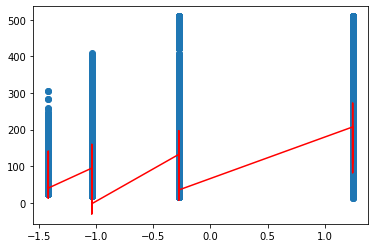

Iteration No.= 311
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 312
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 313
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 314
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 315
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

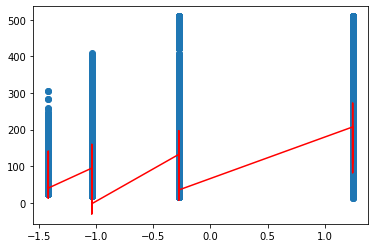

Iteration No.= 321
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 322
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 323
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 324
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 325
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

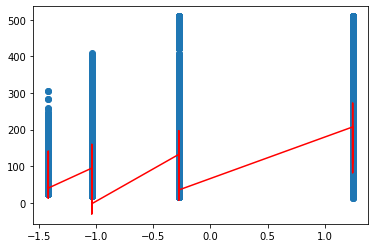

Iteration No.= 331
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 332
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 333
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 334
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 335
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

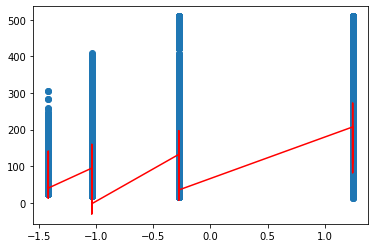

Iteration No.= 341
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 342
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 343
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 344
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 345
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

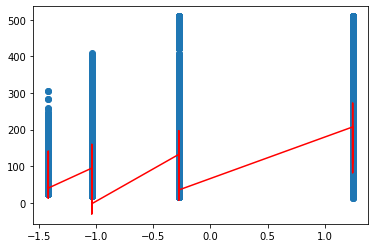

Iteration No.= 351
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 352
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 353
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 354
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 355
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

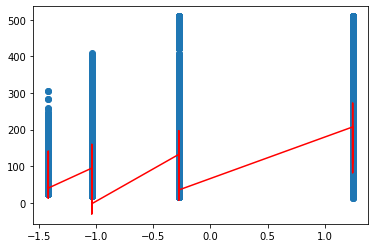

Iteration No.= 361
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 362
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 363
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 364
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 365
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

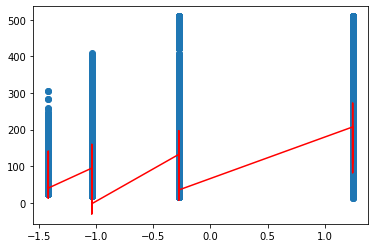

Iteration No.= 371
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 372
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 373
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 374
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 375
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

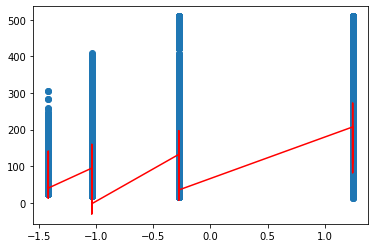

Iteration No.= 381
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 382
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 383
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 384
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 385
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

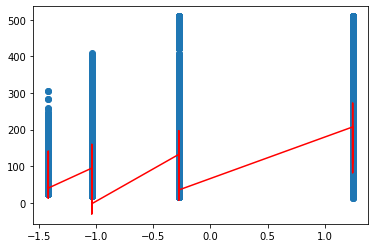

Iteration No.= 391
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 392
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 393
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 394
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 395
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

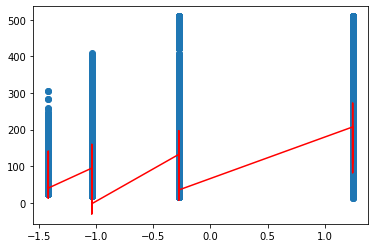

Iteration No.= 401
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 402
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 403
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 404
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 405
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

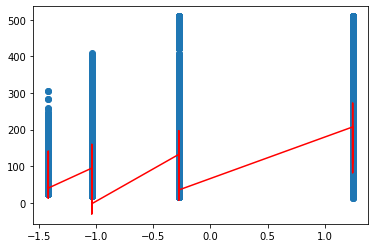

Iteration No.= 411
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 412
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 413
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 414
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 415
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

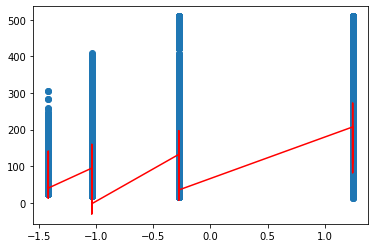

Iteration No.= 421
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 422
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 423
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 424
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 425
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

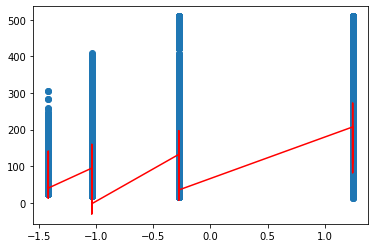

Iteration No.= 431
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 432
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 433
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 434
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 435
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

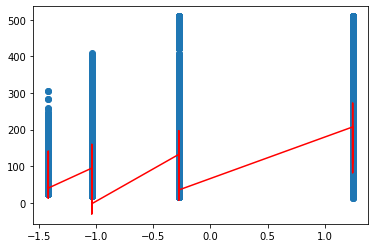

Iteration No.= 441
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 442
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 443
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 444
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 445
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

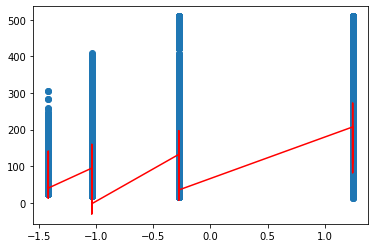

Iteration No.= 451
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 452
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 453
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 454
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 455
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

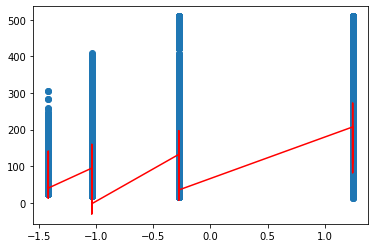

Iteration No.= 461
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 462
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 463
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 464
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 465
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

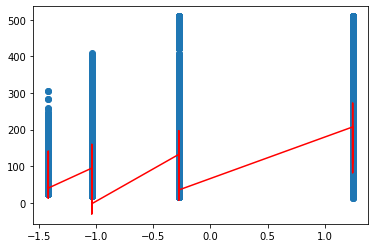

Iteration No.= 471
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 472
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 473
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 474
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 475
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

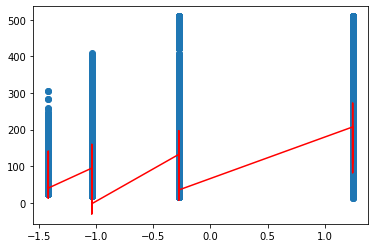

Iteration No.= 481
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 482
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 483
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 484
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 485
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

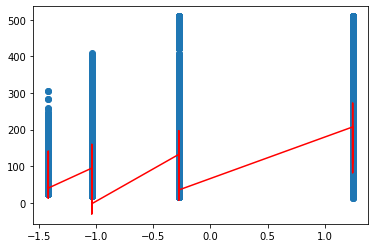

Iteration No.= 491
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 492
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 493
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 494
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 495
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

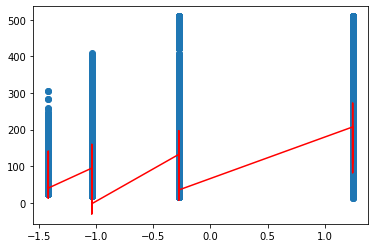

Iteration No.= 501
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 502
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 503
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 504
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 505
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

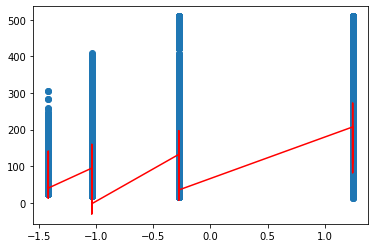

Iteration No.= 511
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 512
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 513
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 514
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 515
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

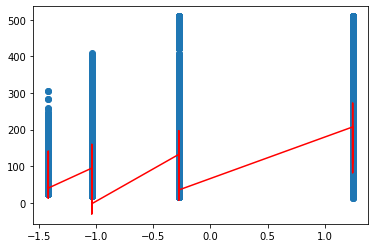

Iteration No.= 521
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 522
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 523
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 524
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 525
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

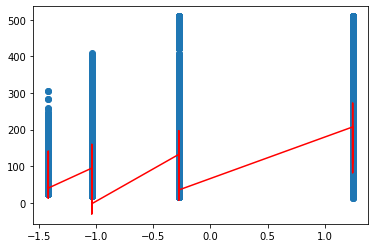

Iteration No.= 531
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 532
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 533
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 534
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 535
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

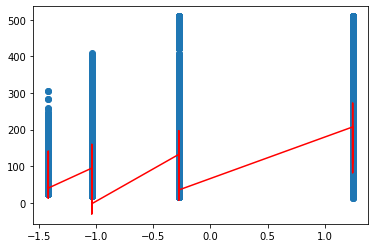

Iteration No.= 541
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 542
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 543
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 544
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 545
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

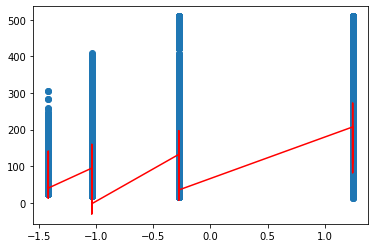

Iteration No.= 551
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 552
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 553
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 554
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 555
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

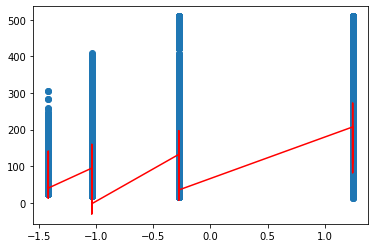

Iteration No.= 561
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 562
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 563
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 564
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 565
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

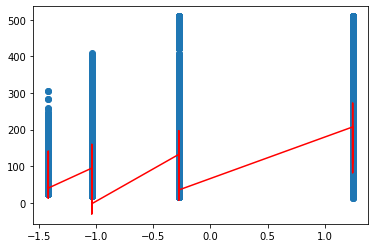

Iteration No.= 571
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 572
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 573
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 574
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 575
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

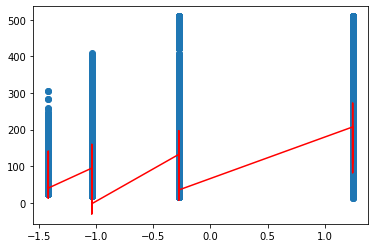

Iteration No.= 581
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 582
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 583
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 584
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 585
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

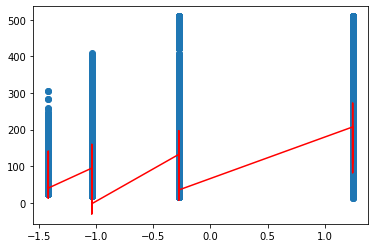

Iteration No.= 591
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 592
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 593
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 594
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 595
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

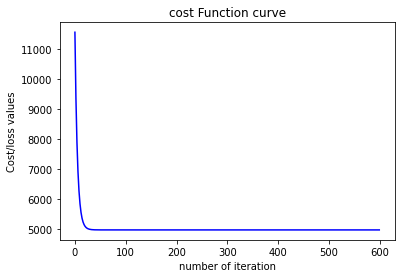

In [ ]:
alpha = 0.1
iters = 600
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

Iteration No.= 0
[array([22.91086998]), array([8.48930723]), array([-1.90266531]), array([-4.00778083]), array([-0.2480675]), array([-0.92919337]), array([2.69959892]), array([-1.00189455])]


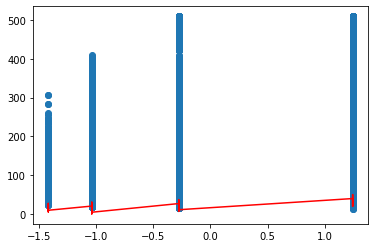

Iteration No.= 1
[array([41.23956597]), array([15.47246667]), array([-3.33651822]), array([-7.47116098]), array([-0.58271394]), array([-1.67754788]), array([4.98367249]), array([-1.80682587])]
Iteration No.= 2
[array([55.90252276]), array([21.22741219]), array([-4.40670075]), array([-10.45243504]), array([-0.95403968]), array([-2.28043969]), array([6.91435883]), array([-2.45359323])]
Iteration No.= 3
[array([67.63288819]), array([25.97813685]), array([-5.19617622]), array([-13.01078243]), array([-1.32997689]), array([-2.76629437]), array([8.54502172]), array([-2.97334207])]
Iteration No.= 4
[array([77.01718053]), array([29.90580246]), array([-5.77016651]), array([-15.20081183]), array([-1.69078785]), array([-3.15795756]), array([9.92134194]), array([-3.39107516])]
Iteration No.= 5
[array([84.52461441]), array([33.157412]), array([-6.17975381]), array([-17.07190093]), array([-2.02515382]), array([-3.47379454]), array([11.08231704]), array([-3.72686533])]
Iteration No.= 6
[array([90.5305

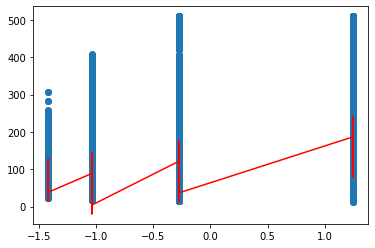

Iteration No.= 11
[array([106.68223493]), array([43.84545774]), array([-6.88940613]), array([-23.7190557]), array([-3.3533436]), array([-4.42994774]), array([15.07446091]), array([-4.73281436])]
Iteration No.= 12
[array([108.25665793]), array([44.73664581]), array([-6.87838302]), array([-24.32357023]), array([-3.47724998]), array([-4.50069951]), array([15.42382956]), array([-4.80599086])]
Iteration No.= 13
[array([109.51619632]), array([45.47953077]), array([-6.8552215]), array([-24.83710951]), array([-3.58088487]), array([-4.5579277]), array([15.71790817]), array([-4.86490195])]
Iteration No.= 14
[array([110.52382704]), array([46.09911373]), array([-6.82443416]), array([-25.2733323]), array([-3.66701919]), array([-4.60423724]), array([15.96543293]), array([-4.91233975])]
Iteration No.= 15
[array([111.32993162]), array([46.61610313]), array([-6.78932782]), array([-25.6438763]), array([-3.73817958]), array([-4.64172798]), array([16.1737683]), array([-4.95054813])]
Iteration No.= 16
[arr

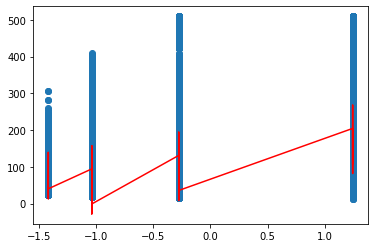

Iteration No.= 21
[array([113.709088]), array([48.34691056]), array([-6.58125977]), array([-26.94996012]), array([-3.95930646]), array([-4.75661688]), array([16.88770473]), array([-5.06575483])]
Iteration No.= 22
[array([113.87814039]), array([48.49398517]), array([-6.55365148]), array([-27.06857773]), array([-3.97502942]), array([-4.76527727]), array([16.9501273]), array([-5.0742235])]
Iteration No.= 23
[array([114.01338229]), array([48.61702077]), array([-6.52856539]), array([-27.16945571]), array([-3.98732383]), array([-4.77231645]), array([17.00269802]), array([-5.08106091])]
Iteration No.= 24
[array([114.12157582]), array([48.71996917]), array([-6.50592868]), array([-27.25526556]), array([-3.99683428]), array([-4.77804104]), array([17.04697814]), array([-5.08658326])]
Iteration No.= 25
[array([114.20813064]), array([48.80612763]), array([-6.48562047]), array([-27.32827396]), array([-4.00409657]), array([-4.78269916]), array([17.08428087]), array([-5.09104514])]
Iteration No.= 26
[

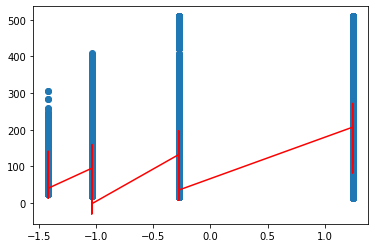

Iteration No.= 31
[array([114.46359061]), array([49.09672374]), array([-6.40364149]), array([-27.58713335]), array([-4.0204636]), array([-4.79719902]), array([17.21259225]), array([-5.10463391])]
Iteration No.= 32
[array([114.48174247]), array([49.12162254]), array([-6.39509474]), array([-27.61083947]), array([-4.02080371]), array([-4.79831766]), array([17.22388073]), array([-5.10564866])]
Iteration No.= 33
[array([114.49626396]), array([49.14248794]), array([-6.38761726]), array([-27.63104333]), array([-4.02083938]), array([-4.79923235]), array([17.23340473]), array([-5.10647144])]
Iteration No.= 34
[array([114.50788115]), array([49.15997569]), array([-6.38108628]), array([-27.6482657]), array([-4.02065259]), array([-4.79998075]), array([17.24144173]), array([-5.1071389])]
Iteration No.= 35
[array([114.5171749]), array([49.17463452]), array([-6.37539059]), array([-27.66294935]), array([-4.02030803]), array([-4.80059348]), array([17.24822536]), array([-5.10768066])]
Iteration No.= 36
[

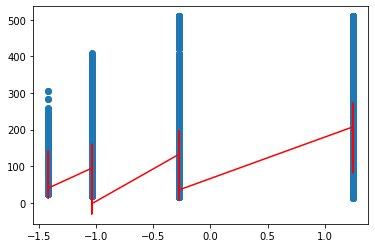

Iteration No.= 41
[array([114.54460471]), array([49.22429017]), array([-6.35384166]), array([-27.71532738]), array([-4.01707838]), array([-4.80253669]), array([17.27170277]), array([-5.10935447])]
Iteration No.= 42
[array([114.54655375]), array([49.22856753]), array([-6.35172328]), array([-27.72015964]), array([-4.01654366]), array([-4.80269067]), array([17.27378581]), array([-5.10948224])]
Iteration No.= 43
[array([114.54811298]), array([49.23215647]), array([-6.34989005]), array([-27.72428512]), array([-4.01603709]), array([-4.80281741]), array([17.27554711]), array([-5.10958644])]
Iteration No.= 44
[array([114.54936037]), array([49.23516814]), array([-6.34830457]), array([-27.7278077]), array([-4.01556219]), array([-4.80292182]), array([17.27703669]), array([-5.10967148])]
Iteration No.= 45
[array([114.55035828]), array([49.2376957]), array([-6.3469341]), array([-27.73081593]), array([-4.01512081]), array([-4.80300789]), array([17.27829675]), array([-5.10974094])]
Iteration No.= 46


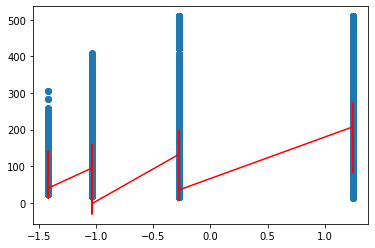

Iteration No.= 51
[array([114.55330353]), array([49.24628814]), array([-6.34186028]), array([-27.74159627]), array([-4.01315865]), array([-4.80328642]), array([17.28268709]), array([-5.10995962])]
Iteration No.= 52
[array([114.55351281]), array([49.24703178]), array([-6.34137205]), array([-27.74259637]), array([-4.01293238]), array([-4.80330911]), array([17.28308009]), array([-5.10997679])]
Iteration No.= 53
[array([114.55368023]), array([49.24765646]), array([-6.3409513]), array([-27.74345129]), array([-4.01272975]), array([-4.80332792]), array([17.28341312]), array([-5.10999089])]
Iteration No.= 54
[array([114.55381417]), array([49.24818129]), array([-6.3405888]), array([-27.74418218]), array([-4.01254877]), array([-4.80334353]), array([17.28369539]), array([-5.11000248])]
Iteration No.= 55
[array([114.55392131]), array([49.24862226]), array([-6.34027656]), array([-27.74480711]), array([-4.01238751]), array([-4.80335647]), array([17.2839347]), array([-5.11001202])]
Iteration No.= 56


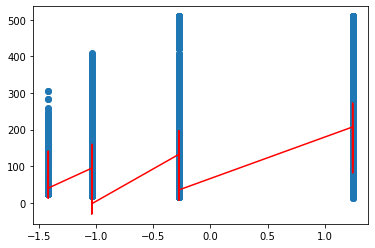

Iteration No.= 61
[array([114.55423756]), array([49.25012674]), array([-6.33913067]), array([-27.7470544]), array([-4.01173877]), array([-4.80339922]), array([17.28477396]), array([-5.11004275])]
Iteration No.= 62
[array([114.55426003]), array([49.25025758]), array([-6.33902139]), array([-27.74726375]), array([-4.01167041]), array([-4.8034028]), array([17.28484972]), array([-5.11004524])]
Iteration No.= 63
[array([114.55427801]), array([49.25036762]), array([-6.33892738]), array([-27.74744288]), array([-4.01161027]), array([-4.80340578]), array([17.28491406]), array([-5.1100473])]
Iteration No.= 64
[array([114.55429239]), array([49.25046019]), array([-6.33884653]), array([-27.74759617]), array([-4.01155744]), array([-4.80340827]), array([17.2849687]), array([-5.11004901])]
Iteration No.= 65
[array([114.55430389]), array([49.25053807]), array([-6.33877699]), array([-27.74772736]), array([-4.01151108]), array([-4.80341035]), array([17.28501512]), array([-5.11005043])]
Iteration No.= 66
[

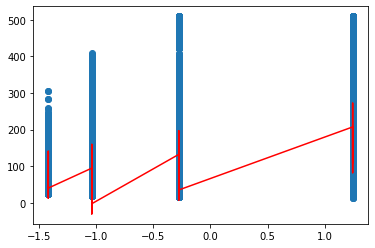

Iteration No.= 71
[array([114.55433785]), array([49.2508048]), array([-6.33852278]), array([-27.74820038]), array([-4.01133177]), array([-4.80341734]), array([17.2851789]), array([-5.1100551])]
Iteration No.= 72
[array([114.55434026]), array([49.25082812]), array([-6.33849863]), array([-27.74824458]), array([-4.01131363]), array([-4.80341794]), array([17.28519379]), array([-5.11005549])]
Iteration No.= 73
[array([114.55434219]), array([49.25084776]), array([-6.33847788]), array([-27.74828244]), array([-4.0112978]), array([-4.80341844]), array([17.28520647]), array([-5.11005582])]
Iteration No.= 74
[array([114.55434374]), array([49.25086431]), array([-6.33846004]), array([-27.74831486]), array([-4.01128401]), array([-4.80341886]), array([17.28521725]), array([-5.11005609])]
Iteration No.= 75
[array([114.55434497]), array([49.25087824]), array([-6.33844472]), array([-27.74834262]), array([-4.011272]), array([-4.80341922]), array([17.28522643]), array([-5.11005632])]
Iteration No.= 76
[ar

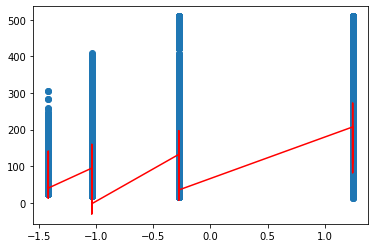

Iteration No.= 81
[array([114.55434862]), array([49.25092619]), array([-6.33838878]), array([-27.74844293]), array([-4.01122651]), array([-4.80342043]), array([17.28525899]), array([-5.11005709])]
Iteration No.= 82
[array([114.55434888]), array([49.2509304]), array([-6.33838348]), array([-27.74845232]), array([-4.011222]), array([-4.80342053]), array([17.28526198]), array([-5.11005715])]
Iteration No.= 83
[array([114.55434908]), array([49.25093396]), array([-6.33837893]), array([-27.74846037]), array([-4.0112181]), array([-4.80342062]), array([17.28526452]), array([-5.11005721])]
Iteration No.= 84
[array([114.55434925]), array([49.25093696]), array([-6.33837501]), array([-27.74846727]), array([-4.01121471]), array([-4.8034207]), array([17.28526668]), array([-5.11005726])]
Iteration No.= 85
[array([114.55434938]), array([49.25093949]), array([-6.33837165]), array([-27.74847319]), array([-4.01121177]), array([-4.80342076]), array([17.28526853]), array([-5.1100573])]
Iteration No.= 86
[ar

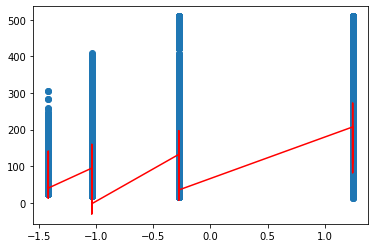

Iteration No.= 91
[array([114.55434977]), array([49.25094824]), array([-6.3383594]), array([-27.74849458]), array([-4.01120077]), array([-4.80342098]), array([17.28527511]), array([-5.11005743])]
Iteration No.= 92
[array([114.5543498]), array([49.25094902]), array([-6.33835824]), array([-27.74849659]), array([-4.0111997]), array([-4.803421]), array([17.28527571]), array([-5.11005744])]
Iteration No.= 93
[array([114.55434982]), array([49.25094967]), array([-6.33835724]), array([-27.74849831]), array([-4.01119877]), array([-4.80342101]), array([17.28527623]), array([-5.11005745])]
Iteration No.= 94
[array([114.55434984]), array([49.25095022]), array([-6.33835638]), array([-27.74849979]), array([-4.01119797]), array([-4.80342103]), array([17.28527667]), array([-5.11005746])]
Iteration No.= 95
[array([114.55434986]), array([49.25095069]), array([-6.33835565]), array([-27.74850105]), array([-4.01119728]), array([-4.80342104]), array([17.28527705]), array([-5.11005747])]
Iteration No.= 96
[a

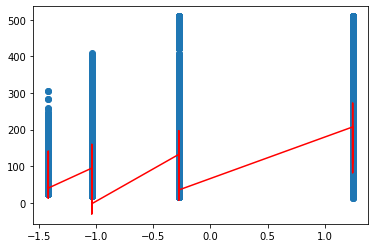

Iteration No.= 101
[array([114.5543499]), array([49.25095231]), array([-6.33835297]), array([-27.74850564]), array([-4.0111947]), array([-4.80342108]), array([17.2852784]), array([-5.11005749])]
Iteration No.= 102
[array([114.5543499]), array([49.25095246]), array([-6.33835272]), array([-27.74850607]), array([-4.01119445]), array([-4.80342108]), array([17.28527852]), array([-5.1100575])]
Iteration No.= 103
[array([114.5543499]), array([49.25095258]), array([-6.3383525]), array([-27.74850644]), array([-4.01119423]), array([-4.80342109]), array([17.28527863]), array([-5.1100575])]
Iteration No.= 104
[array([114.55434991]), array([49.25095268]), array([-6.33835231]), array([-27.74850676]), array([-4.01119405]), array([-4.80342109]), array([17.28527872]), array([-5.1100575])]
Iteration No.= 105
[array([114.55434991]), array([49.25095277]), array([-6.33835215]), array([-27.74850703]), array([-4.01119389]), array([-4.80342109]), array([17.2852788]), array([-5.1100575])]
Iteration No.= 106
[a

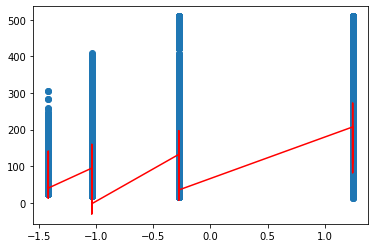

Iteration No.= 111
[array([114.55434991]), array([49.25095308]), array([-6.33835157]), array([-27.74850801]), array([-4.0111933]), array([-4.8034211]), array([17.28527908]), array([-5.11005751])]
Iteration No.= 112
[array([114.55434991]), array([49.25095311]), array([-6.33835151]), array([-27.74850811]), array([-4.01119324]), array([-4.8034211]), array([17.2852791]), array([-5.11005751])]
Iteration No.= 113
[array([114.55434991]), array([49.25095313]), array([-6.33835146]), array([-27.74850819]), array([-4.01119319]), array([-4.8034211]), array([17.28527913]), array([-5.11005751])]
Iteration No.= 114
[array([114.55434991]), array([49.25095315]), array([-6.33835142]), array([-27.74850825]), array([-4.01119315]), array([-4.8034211]), array([17.28527915]), array([-5.11005751])]
Iteration No.= 115
[array([114.55434991]), array([49.25095316]), array([-6.33835139]), array([-27.74850831]), array([-4.01119311]), array([-4.8034211]), array([17.28527916]), array([-5.11005751])]
Iteration No.= 11

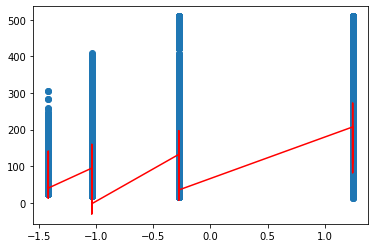

Iteration No.= 121
[array([114.55434991]), array([49.25095322]), array([-6.33835126]), array([-27.74850852]), array([-4.01119298]), array([-4.8034211]), array([17.28527922]), array([-5.11005751])]
Iteration No.= 122
[array([114.55434991]), array([49.25095323]), array([-6.33835125]), array([-27.74850854]), array([-4.01119297]), array([-4.8034211]), array([17.28527923]), array([-5.11005751])]
Iteration No.= 123
[array([114.55434991]), array([49.25095323]), array([-6.33835124]), array([-27.74850856]), array([-4.01119295]), array([-4.8034211]), array([17.28527923]), array([-5.11005751])]
Iteration No.= 124
[array([114.55434991]), array([49.25095324]), array([-6.33835123]), array([-27.74850858]), array([-4.01119295]), array([-4.8034211]), array([17.28527924]), array([-5.11005751])]
Iteration No.= 125
[array([114.55434991]), array([49.25095324]), array([-6.33835122]), array([-27.74850859]), array([-4.01119294]), array([-4.8034211]), array([17.28527924]), array([-5.11005751])]
Iteration No.= 

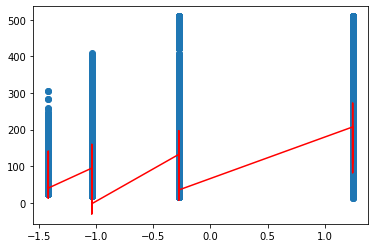

Iteration No.= 131
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850864]), array([-4.01119291]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 132
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850864]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 133
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850864]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 134
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850865]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 135
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850865]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 136


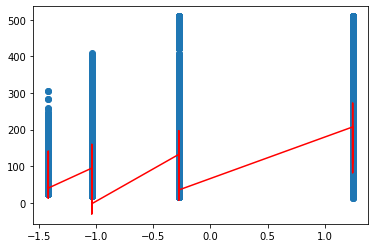

Iteration No.= 141
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 142
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 143
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 144
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 145
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

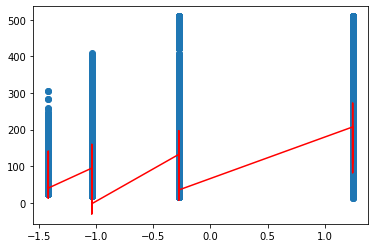

Iteration No.= 151
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 152
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 153
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 154
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 155
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

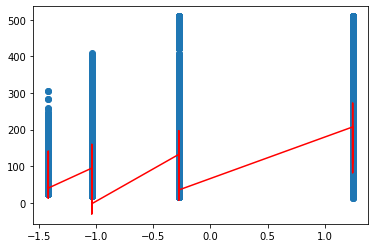

Iteration No.= 161
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 162
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 163
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 164
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 165
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

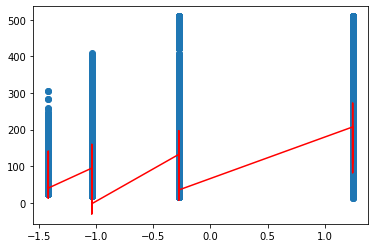

Iteration No.= 171
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 172
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 173
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 174
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 175
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

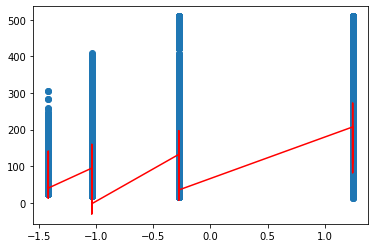

Iteration No.= 181
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 182
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 183
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 184
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 185
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

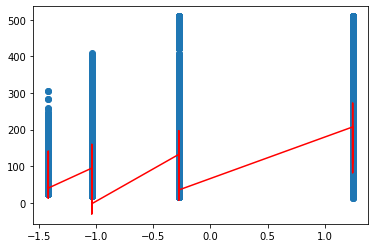

Iteration No.= 191
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 192
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 193
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 194
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 195
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

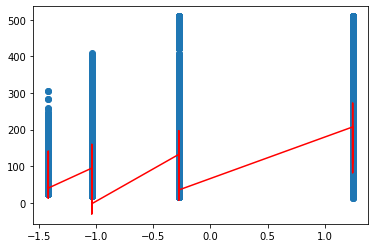

Iteration No.= 201
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 202
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 203
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 204
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 205
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

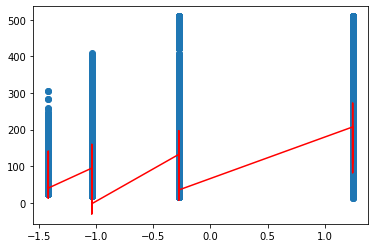

Iteration No.= 211
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 212
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 213
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 214
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 215
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

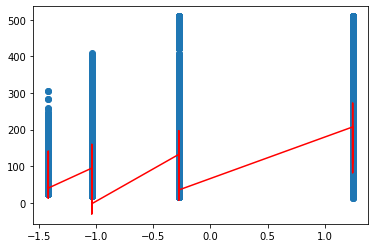

Iteration No.= 221
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 222
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 223
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 224
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 225
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

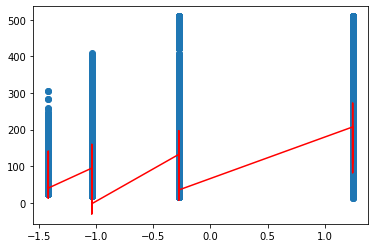

Iteration No.= 231
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 232
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 233
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 234
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 235
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

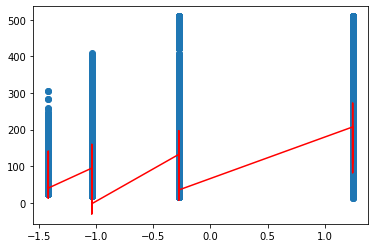

Iteration No.= 241
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 242
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 243
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 244
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 245
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

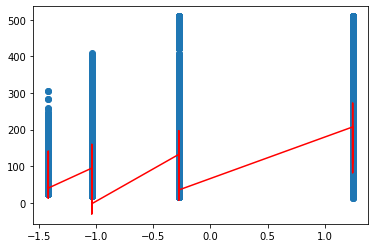

Iteration No.= 251
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 252
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 253
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 254
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 255
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

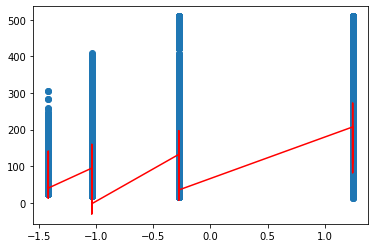

Iteration No.= 261
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 262
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 263
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 264
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 265
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

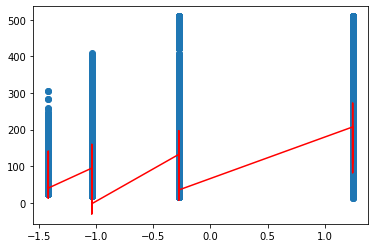

Iteration No.= 271
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 272
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 273
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 274
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 275
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

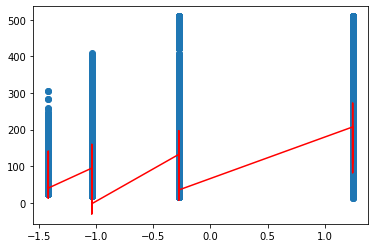

Iteration No.= 281
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 282
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 283
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 284
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 285
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

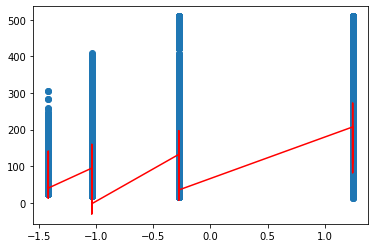

Iteration No.= 291
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 292
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 293
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 294
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 295
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

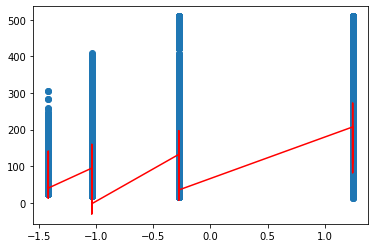

Iteration No.= 301
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 302
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 303
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 304
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 305
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

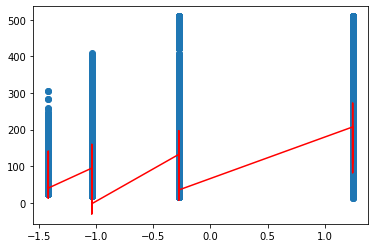

Iteration No.= 311
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 312
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 313
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 314
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 315
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

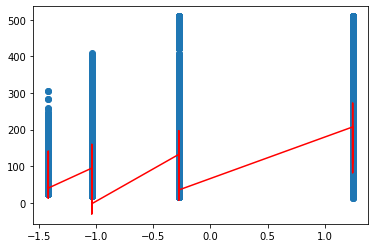

Iteration No.= 321
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 322
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 323
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 324
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 325
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

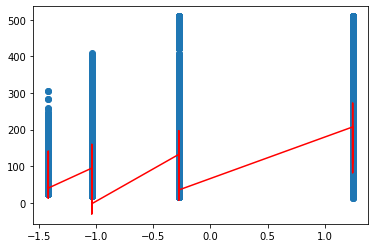

Iteration No.= 331
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 332
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 333
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 334
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 335
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

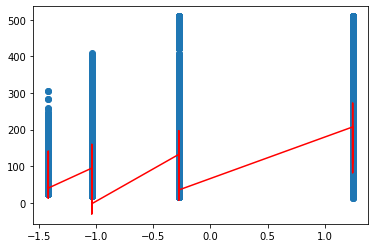

Iteration No.= 341
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 342
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 343
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 344
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 345
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

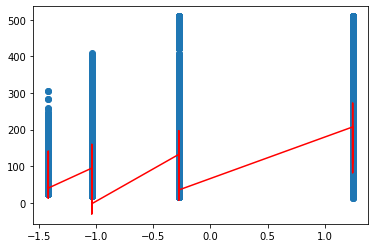

Iteration No.= 351
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 352
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 353
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 354
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 355
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

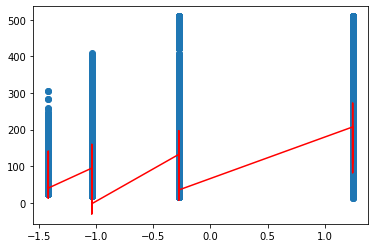

Iteration No.= 361
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 362
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 363
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 364
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 365
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

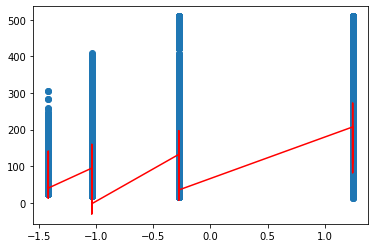

Iteration No.= 371
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 372
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 373
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 374
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 375
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

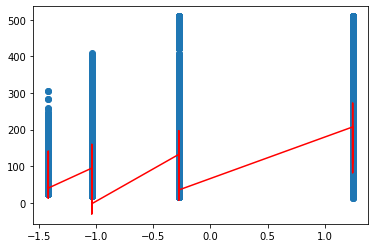

Iteration No.= 381
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 382
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 383
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 384
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 385
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

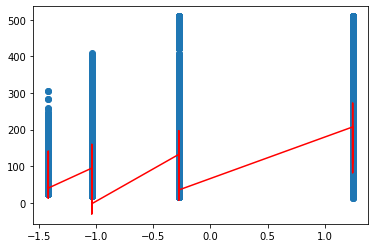

Iteration No.= 391
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 392
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 393
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 394
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 395
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

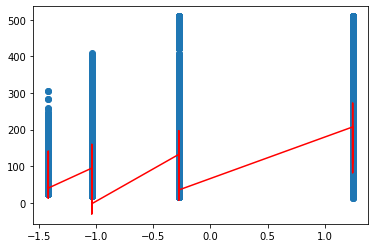

Iteration No.= 401
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 402
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 403
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 404
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 405
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

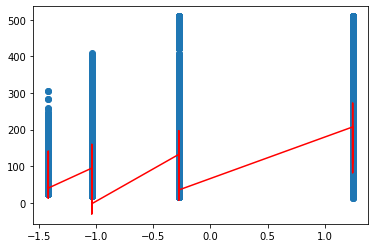

Iteration No.= 411
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 412
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 413
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 414
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 415
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

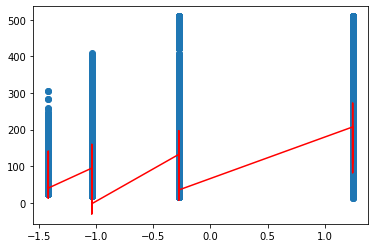

Iteration No.= 421
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 422
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 423
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 424
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 425
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

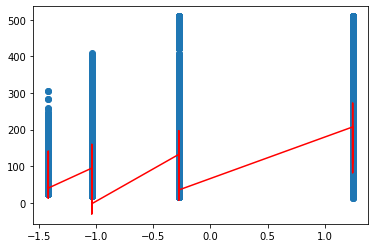

Iteration No.= 431
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 432
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 433
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 434
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 435
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

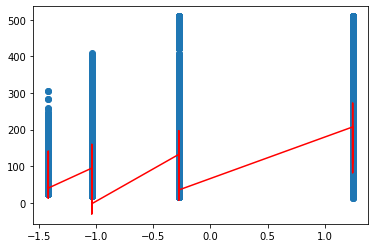

Iteration No.= 441
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 442
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 443
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 444
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 445
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

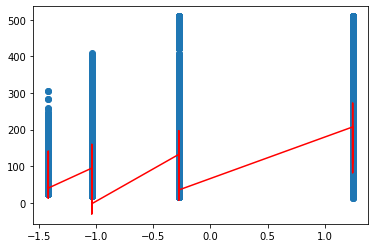

Iteration No.= 451
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 452
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 453
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 454
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 455
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

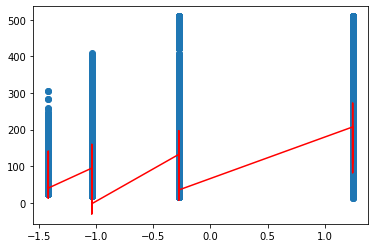

Iteration No.= 461
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 462
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 463
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 464
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 465
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

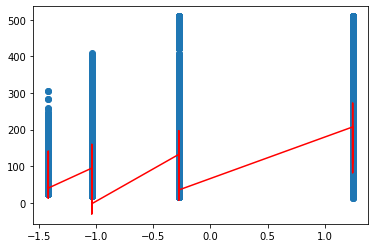

Iteration No.= 471
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 472
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 473
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 474
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 475
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

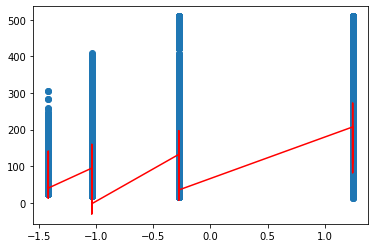

Iteration No.= 481
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 482
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 483
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 484
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 485
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

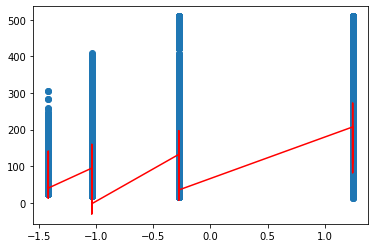

Iteration No.= 491
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 492
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 493
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 494
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 495
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

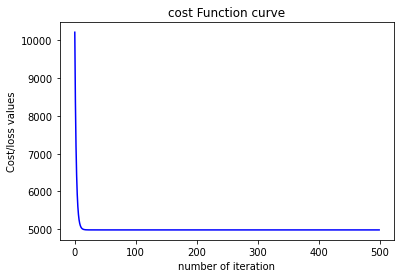

In [ ]:
alpha = 0.2
iters = 500
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

Iteration No.= 0
[array([34.36630497]), array([12.73396085]), array([-2.85399796]), array([-6.01167124]), array([-0.37210125]), array([-1.39379005]), array([4.04939838]), array([-1.50284182])]


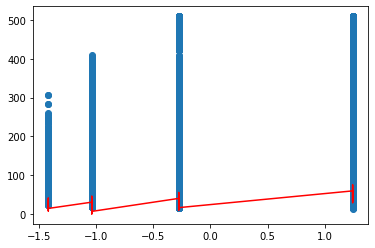

Iteration No.= 1
[array([58.42271846]), array([22.07908915]), array([-4.65316805]), array([-10.79844096]), array([-0.93900512]), array([-2.38069268]), array([7.16386472]), array([-2.56251638])]
Iteration No.= 2
[array([75.26220789]), array([28.97341179]), array([-5.75236448]), array([-14.57055337]), array([-1.5323003]), array([-3.0801024]), array([9.55311518]), array([-3.3099712])]
Iteration No.= 3
[array([87.0498505]), array([34.0818801]), array([-6.39416208]), array([-17.52248225]), array([-2.07384911]), array([-3.57622638]), array([11.38244581]), array([-3.83740632])]
Iteration No.= 4
[array([95.30120032]), array([37.88073355]), array([-6.74255111]), array([-19.82187733]), array([-2.5340087]), array([-3.92849301]), array([12.78102001]), array([-4.20974967])]
Iteration No.= 5
[array([101.0771452]), array([40.71410179]), array([-6.90711627]), array([-21.60757097]), array([-2.90797047]), array([-4.17887196]), array([13.84911246]), array([-4.47273276])]
Iteration No.= 6
[array([105.1203

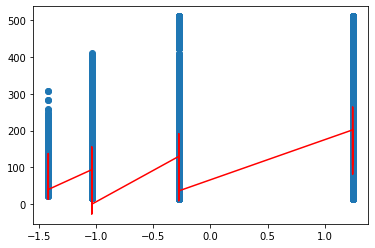

Iteration No.= 11
[array([112.96877026]), array([47.68655212]), array([-6.70925878]), array([-26.41566801]), array([-3.88728087]), array([-4.71835577]), array([16.6067344]), array([-5.02847196])]
Iteration No.= 12
[array([113.44444415]), array([48.06891427]), array([-6.64971236]), array([-26.71347544]), array([-3.9345466]), array([-4.7420762]), array([16.76690517]), array([-5.05193917])]
Iteration No.= 13
[array([113.77741588]), array([48.3573595]), array([-6.59690733]), array([-26.94426828]), array([-3.9673604]), array([-4.75910821]), array([16.88908339]), array([-5.0686082])]
Iteration No.= 14
[array([114.01049609]), array([48.57509884]), array([-6.55122985]), array([-27.12323421]), array([-3.98963015]), array([-4.77135634]), array([16.98231337]), array([-5.08045989])]
Iteration No.= 15
[array([114.17365224]), array([48.73956001]), array([-6.51242401]), array([-27.262098]), array([-4.00431152]), array([-4.78017815]), array([17.05348265]), array([-5.08889517])]
Iteration No.= 16
[arra

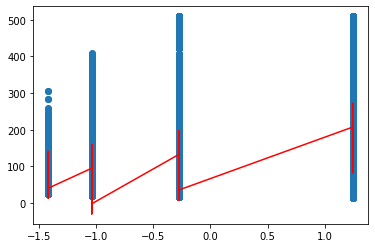

Iteration No.= 21
[array([114.50956121]), array([49.15421857]), array([-6.38596949]), array([-27.63954053]), array([-4.02304185]), array([-4.79991528]), array([17.23822087]), array([-5.10713907])]
Iteration No.= 22
[array([114.52299782]), array([49.17757457]), array([-6.37636509]), array([-27.66345201]), array([-4.02213629]), array([-4.80084602]), array([17.24912669]), array([-5.10794722])]
Iteration No.= 23
[array([114.53240345]), array([49.19527346]), array([-6.36864796]), array([-27.68209004]), array([-4.0210417]), array([-4.80152597]), array([17.25748811]), array([-5.10852868])]
Iteration No.= 24
[array([114.53898739]), array([49.20868985]), array([-6.36246344]), array([-27.69662438]), array([-4.01988737]), array([-4.80202365]), array([17.26390267]), array([-5.10894776])]
Iteration No.= 25
[array([114.54359615]), array([49.21886323]), array([-6.35751811]), array([-27.70796359]), array([-4.01875468]), array([-4.80238863]), array([17.26882667]), array([-5.10925033])]
Iteration No.= 2

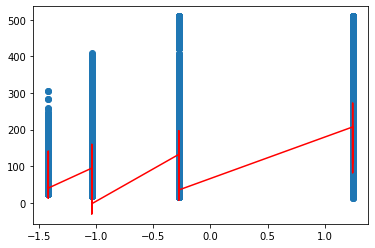

Iteration No.= 31
[array([114.55308474]), array([49.24476233]), array([-6.34310188]), array([-27.73921376]), array([-4.01390194]), array([-4.80324633]), array([17.28181647]), array([-5.10993248])]
Iteration No.= 32
[array([114.55346429]), array([49.24624176]), array([-6.34210877]), array([-27.74122994]), array([-4.01343048]), array([-4.80329028]), array([17.28260317]), array([-5.10996516])]
Iteration No.= 33
[array([114.55372998]), array([49.24736642]), array([-6.34132207]), array([-27.74280738]), array([-4.01303398]), array([-4.803323]), array([17.28320999]), array([-5.10998915])]
Iteration No.= 34
[array([114.55391596]), array([49.24822166]), array([-6.34069927]), array([-27.74404189]), array([-4.01270259]), array([-4.80334742]), array([17.28367835]), array([-5.11000679])]
Iteration No.= 35
[array([114.55404615]), array([49.24887224]), array([-6.34020645]), array([-27.7450083]), array([-4.01242712]), array([-4.80336567]), array([17.28404003]), array([-5.11001979])]
Iteration No.= 36


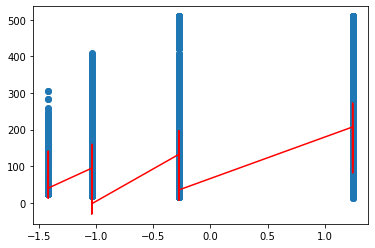

Iteration No.= 41
[array([114.55431418]), array([49.25054322]), array([-6.33880047]), array([-27.74769455]), array([-4.01154391]), array([-4.80341072]), array([17.28500979]), array([-5.11005083])]
Iteration No.= 42
[array([114.5543249]), array([49.25064005]), array([-6.33870569]), array([-27.74786982]), array([-4.01147577]), array([-4.80341321]), array([17.28506995]), array([-5.11005247])]
Iteration No.= 43
[array([114.5543324]), array([49.25071391]), array([-6.33863087]), array([-27.74800728]), array([-4.01142054]), array([-4.8034151]), array([17.2851166]), array([-5.1100537])]
Iteration No.= 44
[array([114.55433766]), array([49.25077028]), array([-6.33857182]), array([-27.7481151]), array([-4.01137585]), array([-4.80341653]), array([17.2851528]), array([-5.11005462])]
Iteration No.= 45
[array([114.55434133]), array([49.25081331]), array([-6.33852522]), array([-27.74819969]), array([-4.01133977]), array([-4.80341761]), array([17.2851809]), array([-5.11005532])]
Iteration No.= 46
[arra

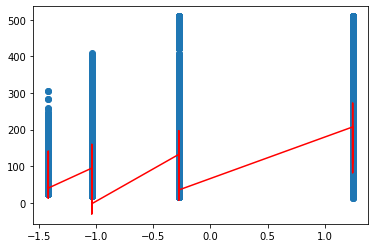

Iteration No.= 51
[array([114.5543489]), array([49.250925]), array([-6.33839304]), array([-27.74843612]), array([-4.0112314]), array([-4.8034204]), array([17.28525729]), array([-5.11005708])]
Iteration No.= 52
[array([114.55434921]), array([49.25093158]), array([-6.33838418]), array([-27.74845166]), array([-4.01122361]), array([-4.80342056]), array([17.28526213]), array([-5.11005718])]
Iteration No.= 53
[array([114.55434942]), array([49.25093662]), array([-6.3383772]), array([-27.74846386]), array([-4.01121738]), array([-4.80342069]), array([17.28526589]), array([-5.11005725])]
Iteration No.= 54
[array([114.55434957]), array([49.25094048]), array([-6.33837169]), array([-27.74847345]), array([-4.0112124]), array([-4.80342078]), array([17.28526883]), array([-5.11005731])]
Iteration No.= 55
[array([114.55434967]), array([49.25094344]), array([-6.33836735]), array([-27.74848099]), array([-4.01120843]), array([-4.80342086]), array([17.28527111]), array([-5.11005736])]
Iteration No.= 56
[arr

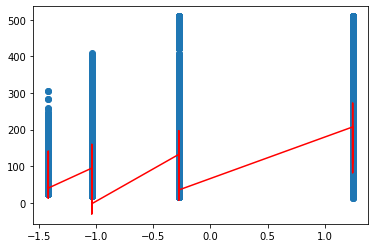

Iteration No.= 61
[array([114.55434989]), array([49.25095122]), array([-6.33835505]), array([-27.74850213]), array([-4.01119681]), array([-4.80342105]), array([17.2852774]), array([-5.11005748])]
Iteration No.= 62
[array([114.55434989]), array([49.25095169]), array([-6.33835423]), array([-27.74850352]), array([-4.011196]), array([-4.80342106]), array([17.28527781]), array([-5.11005748])]
Iteration No.= 63
[array([114.5543499]), array([49.25095205]), array([-6.33835358]), array([-27.74850462]), array([-4.01119535]), array([-4.80342107]), array([17.28527812]), array([-5.11005749])]
Iteration No.= 64
[array([114.5543499]), array([49.25095232]), array([-6.33835307]), array([-27.74850548]), array([-4.01119484]), array([-4.80342108]), array([17.28527837]), array([-5.11005749])]
Iteration No.= 65
[array([114.55434991]), array([49.25095254]), array([-6.33835267]), array([-27.74850616]), array([-4.01119444]), array([-4.80342108]), array([17.28527856]), array([-5.1100575])]
Iteration No.= 66
[ar

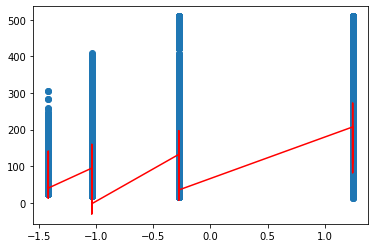

Iteration No.= 71
[array([114.55434991]), array([49.2509531]), array([-6.33835153]), array([-27.74850807]), array([-4.01119327]), array([-4.8034211]), array([17.2852791]), array([-5.11005751])]
Iteration No.= 72
[array([114.55434991]), array([49.25095314]), array([-6.33835146]), array([-27.7485082]), array([-4.01119319]), array([-4.8034211]), array([17.28527913]), array([-5.11005751])]
Iteration No.= 73
[array([114.55434991]), array([49.25095317]), array([-6.3383514]), array([-27.7485083]), array([-4.01119313]), array([-4.8034211]), array([17.28527916]), array([-5.11005751])]
Iteration No.= 74
[array([114.55434991]), array([49.25095319]), array([-6.33835135]), array([-27.74850838]), array([-4.01119308]), array([-4.8034211]), array([17.28527918]), array([-5.11005751])]
Iteration No.= 75
[array([114.55434991]), array([49.2509532]), array([-6.33835131]), array([-27.74850844]), array([-4.01119304]), array([-4.8034211]), array([17.2852792]), array([-5.11005751])]
Iteration No.= 76
[array([1

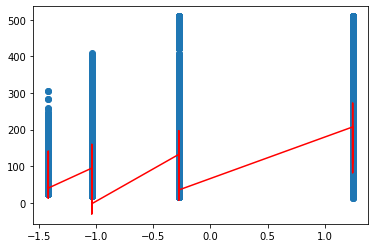

Iteration No.= 81
[array([114.55434991]), array([49.25095325]), array([-6.33835121]), array([-27.74850861]), array([-4.01119292]), array([-4.8034211]), array([17.28527924]), array([-5.11005751])]
Iteration No.= 82
[array([114.55434991]), array([49.25095325]), array([-6.3383512]), array([-27.74850862]), array([-4.01119292]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 83
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850863]), array([-4.01119291]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 84
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850864]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 85
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850864]), array([-4.0111929]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 86
[arra

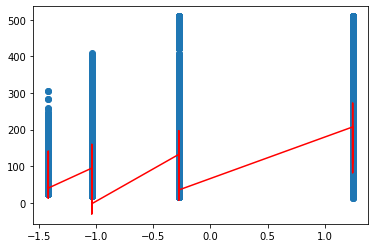

Iteration No.= 91
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 92
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 93
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 94
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 95
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 96
[a

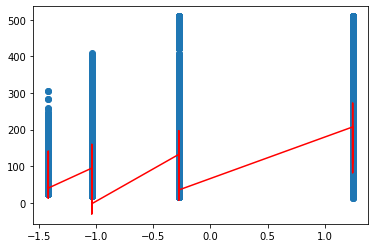

Iteration No.= 101
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 102
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 103
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 104
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 105
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

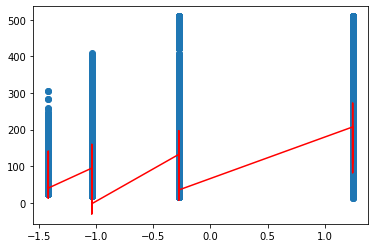

Iteration No.= 111
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 112
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 113
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 114
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 115
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

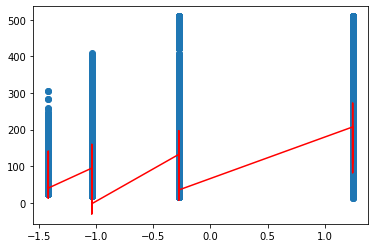

Iteration No.= 121
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 122
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 123
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 124
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 125
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

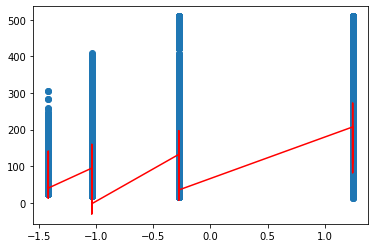

Iteration No.= 131
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 132
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 133
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 134
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 135
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

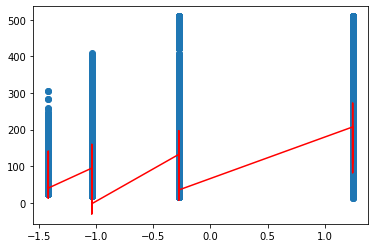

Iteration No.= 141
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 142
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 143
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 144
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 145
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

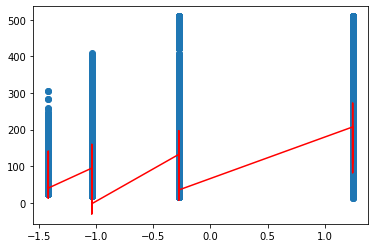

Iteration No.= 151
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 152
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 153
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 154
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 155
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

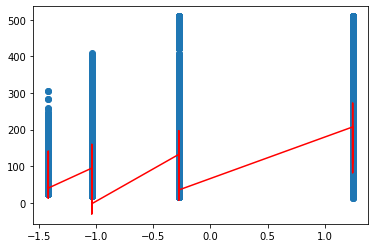

Iteration No.= 161
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 162
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 163
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 164
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 165
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

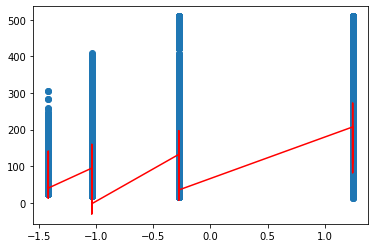

Iteration No.= 171
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 172
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 173
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 174
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 175
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

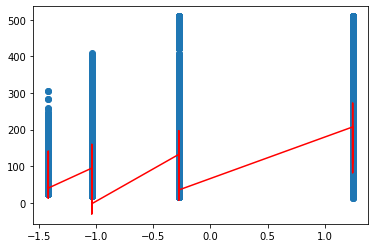

Iteration No.= 181
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 182
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 183
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 184
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 185
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

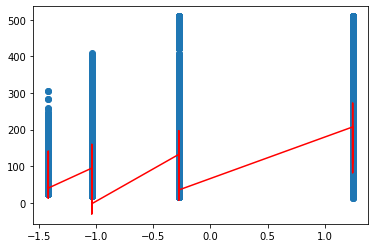

Iteration No.= 191
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 192
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 193
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 194
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 195
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

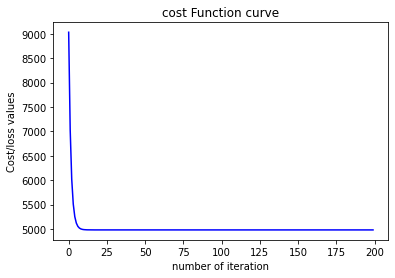

In [ ]:
alpha = 0.3
iters = 200
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

Iteration No.= 0
[array([57.27717496]), array([21.22326808]), array([-4.75666326]), array([-10.01945207]), array([-0.62016875]), array([-2.32298342]), array([6.7489973]), array([-2.50473637])]


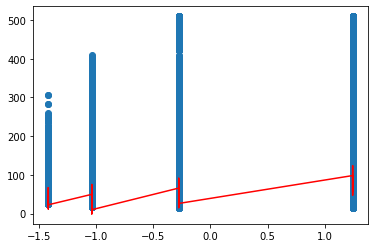

Iteration No.= 1
[array([85.91576244]), array([33.03311243]), array([-6.58324911]), array([-16.63639992]), array([-1.78145587]), array([-3.515724]), array([10.90096117]), array([-3.77845257])]
Iteration No.= 2
[array([100.23505617]), array([39.77225005]), array([-7.12260115]), array([-20.82419635]), array([-2.70417945]), array([-4.13097412]), array([13.42679968]), array([-4.42738712])]
Iteration No.= 3
[array([107.39470304]), array([43.67633369]), array([-7.15120953]), array([-23.43450877]), array([-3.3052131]), array([-4.44997882]), array([14.95467338]), array([-4.75880111])]
Iteration No.= 4
[array([110.97452648]), array([45.9588754]), array([-7.01252965]), array([-25.05516898]), array([-3.66070792]), array([-4.61633116]), array([15.87657222]), array([-4.92855203])]
Iteration No.= 5
[array([112.7644382]), array([47.30114208]), array([-6.84634284]), array([-26.06221472]), array([-3.8571489]), array([-4.70362858]), array([16.43252637]), array([-5.01580278])]
Iteration No.= 6
[array([11

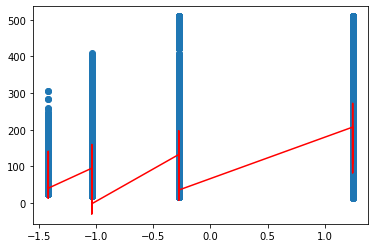

Iteration No.= 11
[array([114.52638254]), array([49.16357967]), array([-6.38862892]), array([-27.64138822]), array([-4.02881374]), array([-4.80066182]), array([17.24115629]), array([-5.10791913])]
Iteration No.= 12
[array([114.54036623]), array([49.19862133]), array([-6.37135639]), array([-27.68039309]), array([-4.02508023]), array([-4.80185444]), array([17.25809236]), array([-5.10888393])]
Iteration No.= 13
[array([114.54735807]), array([49.21956665]), array([-6.35994185]), array([-27.70513538]), array([-4.02166485]), array([-4.80252368]), array([17.26848358]), array([-5.10940675])]
Iteration No.= 14
[array([114.55085399]), array([49.23210264]), array([-6.35243843]), array([-27.72085566]), array([-4.01885468]), array([-4.80290264]), array([17.27487651]), array([-5.10969282])]
Iteration No.= 15
[array([114.55260195]), array([49.23961548]), array([-6.34752496]), array([-27.73085816]), array([-4.01667733]), array([-4.80311914]), array([17.27882008]), array([-5.10985095])]
Iteration No.= 

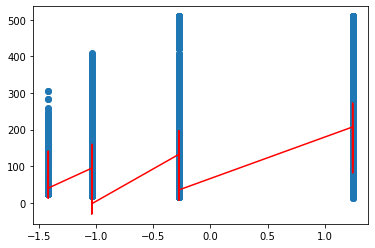

Iteration No.= 21
[array([114.5543226]), array([49.25039854]), array([-6.33903628]), array([-27.74729212]), array([-4.01176767]), array([-4.80340752]), array([17.28489131]), array([-5.11004913])]
Iteration No.= 22
[array([114.55433626]), array([49.25061575]), array([-6.33879497]), array([-27.74772771]), array([-4.01157815]), array([-4.80341284]), array([17.28503479]), array([-5.11005245])]
Iteration No.= 23
[array([114.55434309]), array([49.25074752]), array([-6.33863857]), array([-27.74800704]), array([-4.01145004]), array([-4.80341606]), array([17.28512493]), array([-5.11005444])]
Iteration No.= 24
[array([114.5543465]), array([49.25082761]), array([-6.33853725]), array([-27.74818629]), array([-4.01136391]), array([-4.80341801]), array([17.28518168]), array([-5.11005563])]
Iteration No.= 25
[array([114.55434821]), array([49.25087637]), array([-6.33847163]), array([-27.74830139]), array([-4.01130628]), array([-4.8034192]), array([17.28521746]), array([-5.11005636])]
Iteration No.= 26


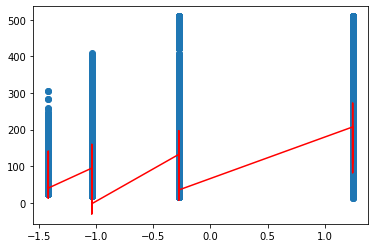

Iteration No.= 31
[array([114.55434989]), array([49.25094905]), array([-6.33836002]), array([-27.7484939]), array([-4.01120208]), array([-4.80342099]), array([17.28527516]), array([-5.11005744])]
Iteration No.= 32
[array([114.5543499]), array([49.25095064]), array([-6.33835689]), array([-27.74849915]), array([-4.0111989]), array([-4.80342103]), array([17.28527664]), array([-5.11005747])]
Iteration No.= 33
[array([114.55434991]), array([49.25095163]), array([-6.33835487]), array([-27.74850253]), array([-4.01119682]), array([-4.80342106]), array([17.28527759]), array([-5.11005748])]
Iteration No.= 34
[array([114.55434991]), array([49.25095224]), array([-6.33835357]), array([-27.74850471]), array([-4.01119545]), array([-4.80342108]), array([17.28527819]), array([-5.11005749])]
Iteration No.= 35
[array([114.55434991]), array([49.25095263]), array([-6.33835272]), array([-27.74850611]), array([-4.01119456]), array([-4.80342109]), array([17.28527857]), array([-5.1100575])]
Iteration No.= 36
[

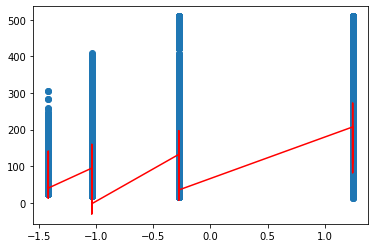

Iteration No.= 41
[array([114.55434991]), array([49.25095322]), array([-6.33835129]), array([-27.74850848]), array([-4.01119301]), array([-4.8034211]), array([17.28527921]), array([-5.11005751])]
Iteration No.= 42
[array([114.55434991]), array([49.25095323]), array([-6.33835125]), array([-27.74850855]), array([-4.01119297]), array([-4.8034211]), array([17.28527923]), array([-5.11005751])]
Iteration No.= 43
[array([114.55434991]), array([49.25095324]), array([-6.33835122]), array([-27.74850859]), array([-4.01119294]), array([-4.8034211]), array([17.28527924]), array([-5.11005751])]
Iteration No.= 44
[array([114.55434991]), array([49.25095325]), array([-6.3383512]), array([-27.74850862]), array([-4.01119292]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 45
[array([114.55434991]), array([49.25095325]), array([-6.33835119]), array([-27.74850863]), array([-4.01119291]), array([-4.8034211]), array([17.28527925]), array([-5.11005751])]
Iteration No.= 46
[ar

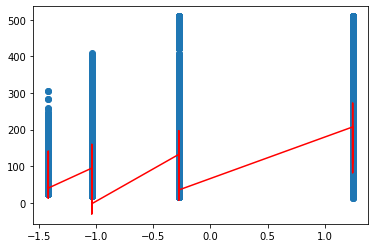

Iteration No.= 51
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 52
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 53
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 54
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 55
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 56
[a

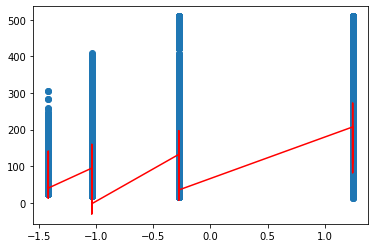

Iteration No.= 61
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 62
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 63
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 64
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 65
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 66
[a

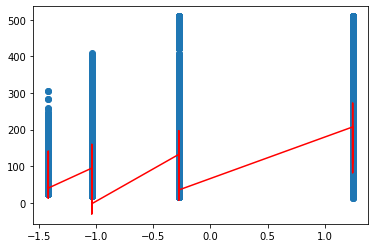

Iteration No.= 71
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 72
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 73
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 74
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 75
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 76
[a

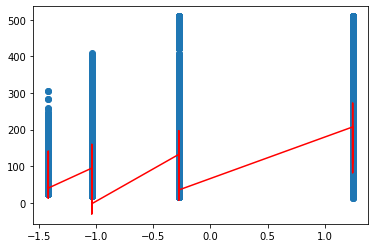

Iteration No.= 81
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 82
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 83
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 84
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 85
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 86
[a

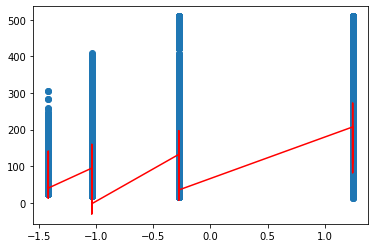

Iteration No.= 91
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 92
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 93
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 94
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 95
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 96
[a

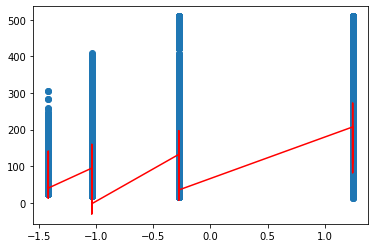

Iteration No.= 101
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 102
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 103
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 104
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 105
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

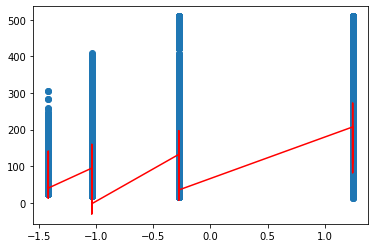

Iteration No.= 111
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 112
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 113
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 114
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 115
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

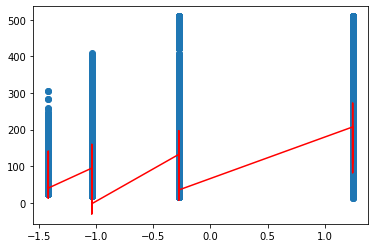

Iteration No.= 121
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 122
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 123
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 124
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 125
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

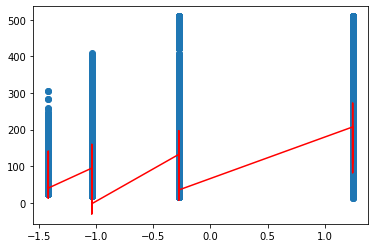

Iteration No.= 131
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 132
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 133
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 134
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 135
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

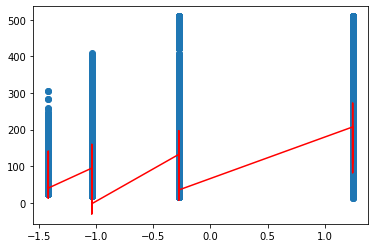

Iteration No.= 141
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 142
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 143
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 144
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 145
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

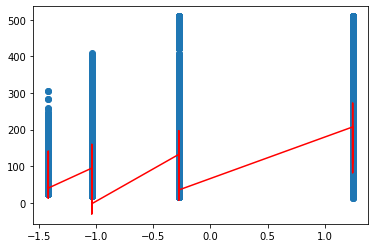

Iteration No.= 151
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 152
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 153
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 154
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 155
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

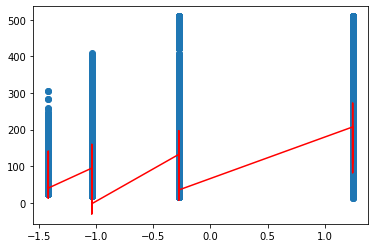

Iteration No.= 161
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 162
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 163
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 164
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 165
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

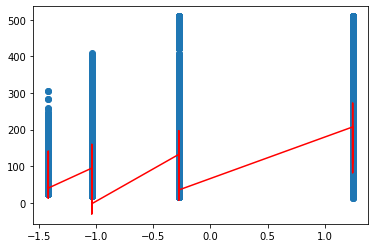

Iteration No.= 171
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 172
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 173
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 174
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 175
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

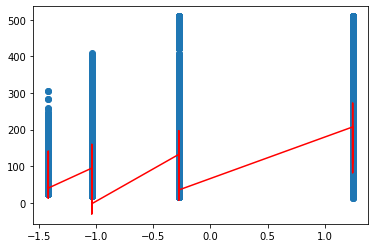

Iteration No.= 181
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 182
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 183
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 184
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 185
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

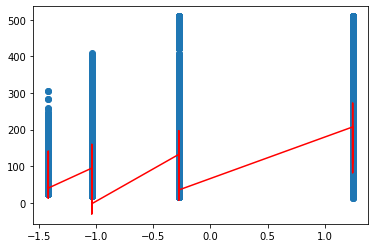

Iteration No.= 191
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 192
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 193
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 194
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 195
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 

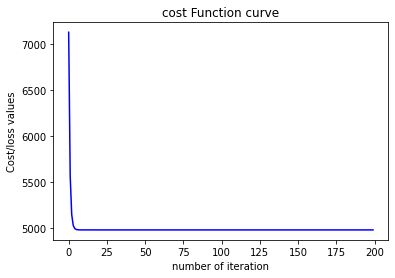

In [33]:
alpha = 0.5
iters = 200
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

Iteration No.= 0
[array([103.09891492]), array([38.20188254]), array([-8.56199387]), array([-18.03501373]), array([-1.11630376]), array([-4.18137016]), array([12.14819513]), array([-4.50852546])]


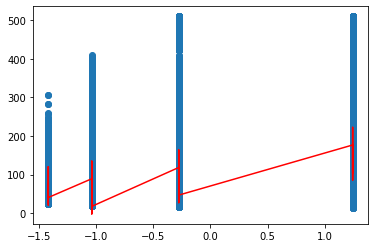

Iteration No.= 1
[array([113.40880641]), array([45.90427223]), array([-7.63053693]), array([-25.04591377]), array([-3.98583102]), array([-4.70075349]), array([15.88200198]), array([-5.02854558])]
Iteration No.= 2
[array([114.43979556]), array([48.43389448]), array([-6.786693]), array([-26.70929371]), array([-4.06147692]), array([-4.781802]), array([16.86375634]), array([-5.09564338])]
Iteration No.= 3
[array([114.54289448]), array([48.99835741]), array([-6.51689426]), array([-27.42434236]), array([-4.1082977]), array([-4.79799174]), array([17.15776773]), array([-5.1068565])]
Iteration No.= 4
[array([114.55320437]), array([49.18651921]), array([-6.4007914]), array([-27.6268196]), array([-4.05127739]), array([-4.80191271]), array([17.2441629]), array([-5.10918488])]
Iteration No.= 5
[array([114.55423536]), array([49.23063152]), array([-6.36204241]), array([-27.70792267]), array([-4.03121089]), array([-4.80297688]), array([17.27200721]), array([-5.10980372])]
Iteration No.= 6
[array([114.

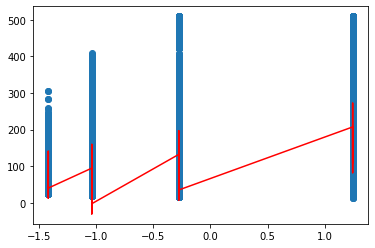

Iteration No.= 11
[array([114.55434991]), array([49.25093451]), array([-6.33840613]), array([-27.74841971]), array([-4.01125487]), array([-4.80342057]), array([17.28525617]), array([-5.11005717])]
Iteration No.= 12
[array([114.55434991]), array([49.25094705]), array([-6.33837111]), array([-27.74847623]), array([-4.01121555]), array([-4.80342092]), array([17.28527098]), array([-5.11005739])]
Iteration No.= 13
[array([114.55434991]), array([49.25095107]), array([-6.33835845]), array([-27.74849695]), array([-4.01120125]), array([-4.80342104]), array([17.28527628]), array([-5.11005747])]
Iteration No.= 14
[array([114.55434991]), array([49.25095251]), array([-6.33835382]), array([-27.7485044]), array([-4.01119594]), array([-4.80342108]), array([17.28527818]), array([-5.11005749])]
Iteration No.= 15
[array([114.55434991]), array([49.25095299]), array([-6.33835214]), array([-27.74850712]), array([-4.011194]), array([-4.80342109]), array([17.28527887]), array([-5.1100575])]
Iteration No.= 16
[

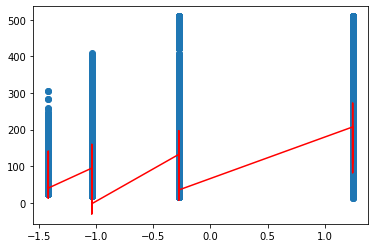

Iteration No.= 21
[array([114.55434991]), array([49.25095326]), array([-6.33835118]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 22
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850866]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 23
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 24
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 25
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 26
[a

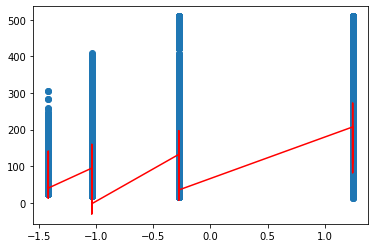

Iteration No.= 31
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 32
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 33
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 34
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 35
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 36
[a

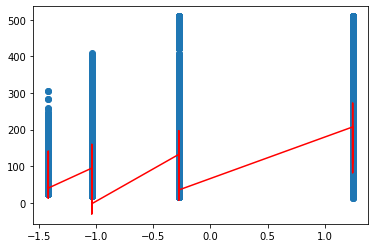

Iteration No.= 41
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 42
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 43
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 44
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 45
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 46
[a

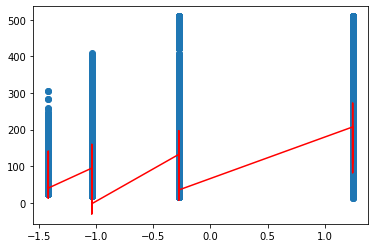

Iteration No.= 51
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 52
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 53
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 54
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 55
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 56
[a

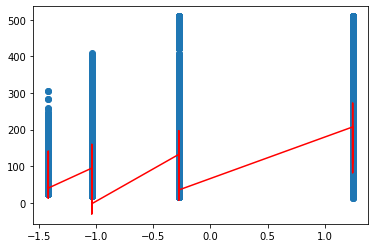

Iteration No.= 61
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 62
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 63
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 64
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 65
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 66
[a

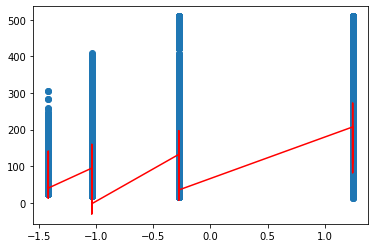

Iteration No.= 71
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 72
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 73
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 74
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 75
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 76
[a

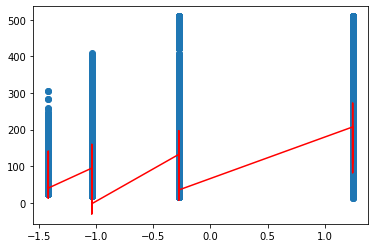

Iteration No.= 81
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 82
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 83
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 84
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 85
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 86
[a

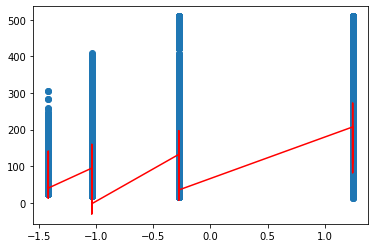

Iteration No.= 91
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 92
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 93
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 94
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 95
[array([114.55434991]), array([49.25095326]), array([-6.33835117]), array([-27.74850867]), array([-4.01119289]), array([-4.8034211]), array([17.28527926]), array([-5.11005751])]
Iteration No.= 96
[a

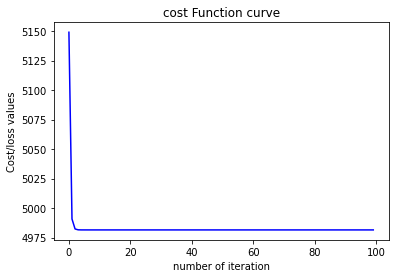

In [34]:
alpha = 0.9
iters = 100
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)